# Import libraries

Set datatypes for incoming columns

In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

dtype_dict = {
    **{col: str for col in [
        "Year of Data", "Primary activity", "Primary sector", "Primary industry",
        "Account Numbers", "Countries", "Scope 3 Sources", 
         "Scope_3_emissions_type"
        "Third_Party_Verification", "incorporated_country"
    ]},
    **{col: float for col in [
        "Revenue_USD", 
        "Market_Cap_USD", "ebitda_USD",
        "grossProfit_USD", "netIncome_USD",
        "cashAndCashEquivalents_USD", "longTermInvestments_USD",
        "totalAssets_USD", "totalLiabilities_USD",
        "totalInvestments_USD", "totalDebt_USD",
        "totalEquity_USD", "Scope_3_emissions_amount",
        "shortTermInvestments_USD",
        "Quantile_Scope_3_emissions", "BoxCox_Scope_3_emissions", "Robust_Scope_3_emissions","country_ghg_avg","country_population_avg","country_gdp_avg"
    ]}
}


prepped_df = pd.read_csv(r"C:\Users\cliff\Downloads\Final_GHG_Data\Final_GHG_Data.csv", dtype=dtype_dict)

#prepped_df['Calculation_Method_modeled'] = prepped_df['Calculation_Method_modeled'].fillna('Calculation Undetermined')

In [8]:
prepped_df.head()

account_name  account_id  Year incorporated_country Primary activity  \
0     3i Group          44  2018       United Kingdom   Asset managers   
1     3i Group          44  2018       United Kingdom   Asset managers   
2     3i Group          44  2018       United Kingdom   Asset managers   
3     3i Group          44  2018       United Kingdom   Asset managers   
4     3i Group          44  2018       United Kingdom   Asset managers   

       Primary sector  Market_Cap_USD  \
0  Financial services    9.548124e+09   
1  Financial services    9.548124e+09   
2  Financial services    9.548124e+09   
3  Financial services    9.548124e+09   
4  Financial services    9.548124e+09   

                                 Third_party_verification   Revenue_USD  \
0  Third-party verification or assurance process in place  1.728470e+09   
1  Third-party verification or assurance process in place  1.728470e+09   
2  Third-party verification or assurance process in place  1.728470e+09   
3  Third-party verification or assurance process in place  1.728470e+09   
4  Third-party verification or assurance process in place  1.728470e+09   

     ebitda_USD  grossProfit_USD  netIncome_USD  cashAndCashEquivalents_USD  \
0  1.565910e+09     1.728470e+09   1.577340e+09                1.248410e+09   
1  1.565910e+09     1.728470e+09   1.577340e+09                1.248410e+09   
2  1.565910e+09     1.728470e+09   1.577340e+09                1.248410e+09   
3  1.565910e+09     1.728470e+09   1.577340e+09                1.248410e+09   
4  1.565910e+09     1.728470e+09   1.577340e+09                1.248410e+09   

   shortTermInvestments_USD  longTermInvestments_USD  totalAssets_USD  \
0                       0.0             8.544560e+09     1.107567e+10   
1                       0.0             8.544560e+09     1.107567e+10   
2                       0.0             8.544560e+09     1.107567e+10   
3                       0.0             8.544560e+09     1.107567e+10   
4                       0.0             8.544560e+09     1.107567e+10   

   totalLiabilities_USD  totalInvestments_USD  totalDebt_USD  totalEquity_USD  \
0          1.031240e+09          8.544560e+09    730250000.0     1.004443e+10   
1          1.031240e+09          8.544560e+09    730250000.0     1.004443e+10   
2          1.031240e+09          8.544560e+09    730250000.0     1.004443e+10   
3          1.031240e+09          8.544560e+09    730250000.0     1.004443e+10   
4          1.031240e+09          8.544560e+09    730250000.0     1.004443e+10   

                                              Scope_3_emissions_type  \
0                                       Purchased goods and services   
1  Fuel-and-energy-related activities (not included in Scope 1 or 2)   
2                                      Waste generated in operations   
3                                                    Business travel   
4                                                 Employee commuting   

   Scope_3_emissions_amount  Quantile_Scope_3_emissions  \
0                     17.62                   -2.078562   
1                     61.42                   -1.767043   
2                     57.21                   -1.781020   
3                   2549.33                   -0.655642   
4                      3.90                   -2.457261   

   BoxCox_Scope_3_emissions  Robust_Scope_3_emissions  country_ghg_avg  \
0                  2.947383                 -0.119871       428.766726   
1                  4.280399                 -0.119592       428.766726   
2                  4.203760                 -0.119619       428.766726   
3                  8.447919                 -0.103714       428.766726   
4                  1.378441                 -0.119959       428.766726   

   country_population_avg  country_gdp_avg  
0            6.734692e+07     3.038320e+12  
1            6.734692e+07     3.038320e+12  
2            6.734692e+07     3.038320e+12  
3            6.734692e+07     3.038320e+12  


# Check for zeros in Scope 3 data

Here we are also filtering zeros out of the final input.

In [10]:
# Count 0 values
zero_count = (prepped_df["Scope_3_emissions_amount"] == 0).sum()

# Count values less than 0
negative_count = (prepped_df["Scope_3_emissions_amount"] < 0).sum()

print(f"Number of 0 values in 'log_Scope 3 Amount': {zero_count}")
print(f"Number of values less than 0 in 'log_Scope 3 Amount': {negative_count}")


Number of 0 values in 'log_Scope 3 Amount': 0
Number of values less than 0 in 'log_Scope 3 Amount': 0


# Group-wise AdaBoost Modeling for Predicting Scope 3 Emissions with Feature Preprocessing and Depth Tuning

Below we implement a predictive modeling pipeline to estimate Scope 3 greenhouse gas (GHG) emissions using a grouped, feature-engineered approach. The dataset is first cleaned and log-transformed to normalize skewed emission values. It is then split by different categories of Scope 3 emissions (e.g., Purchased Goods, Use of Sold Products) to tailor models for each emissions type. For every group, the code encodes categorical features, preserves numerical variables, and applies an `AdaBoostRegressor` with a `DecisionTreeRegressor` as the base estimator. A grid search over multiple `max_depth` values is conducted to find the best model configuration based on R² score. The resulting models are evaluated using RMSLE (Root Mean Squared Log Error), and visualized with dual histograms comparing actual vs. predicted emissions both in log space and original metric tons. Performance metrics for each group are stored and summarized at the end for comparative analysis. This allows targeted model tuning and evaluation across distinct Scope 3 emission categories.



Processing group: Business travel
Best max_depth for Business travel: 12 (R² = 0.6187)


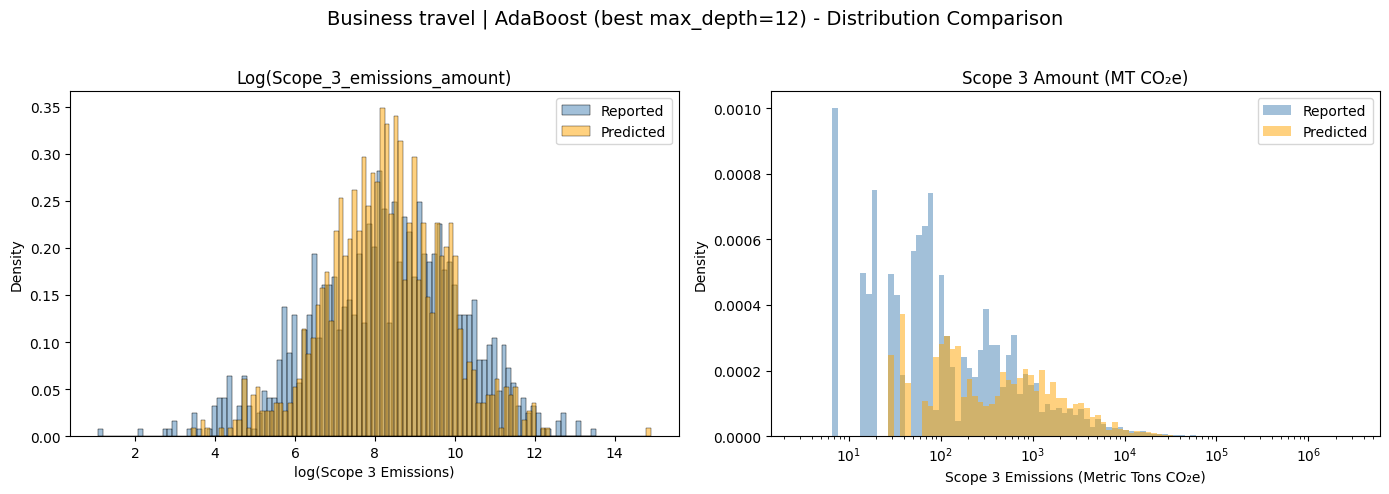

Business travel - RMSLE: 1.1642, R²: 0.6187
Processing group: Capital goods
Best max_depth for Capital goods: 16 (R² = 0.6478)


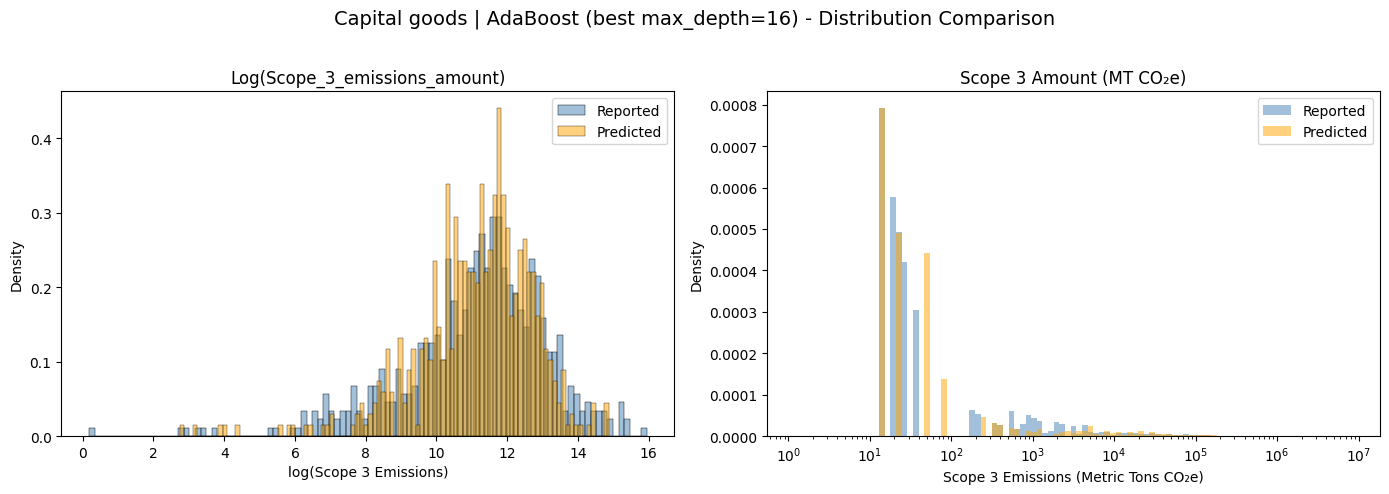

Capital goods - RMSLE: 1.2235, R²: 0.6478
Processing group: Downstream leased assets
Best max_depth for Downstream leased assets: 14 (R² = 0.7322)


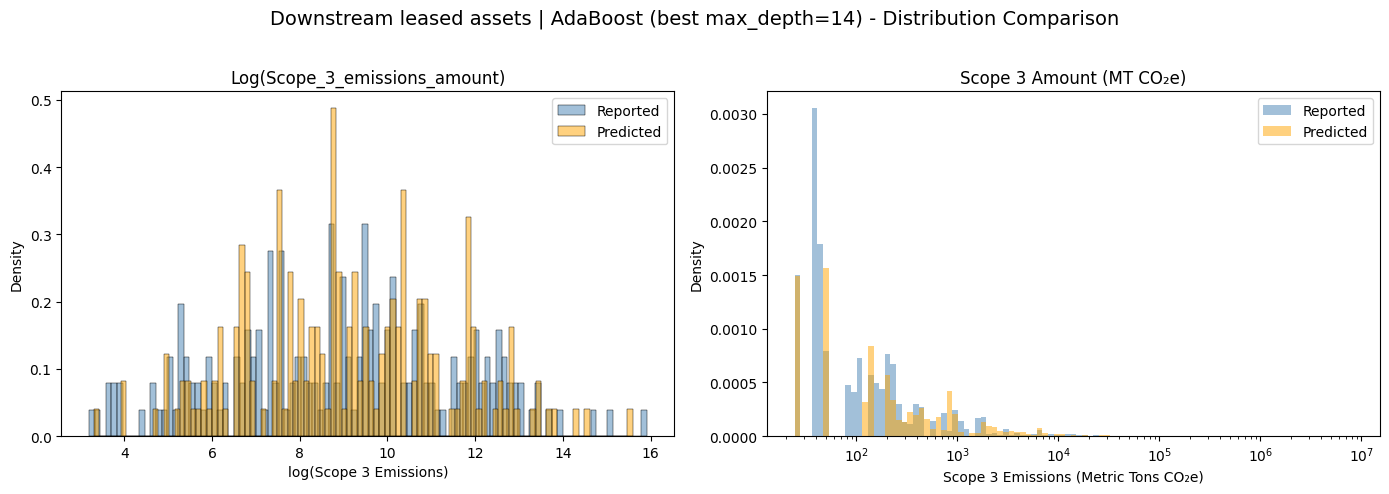

Downstream leased assets - RMSLE: 1.3779, R²: 0.7322
Processing group: Downstream transportation and distribution
Best max_depth for Downstream transportation and distribution: 14 (R² = 0.7373)


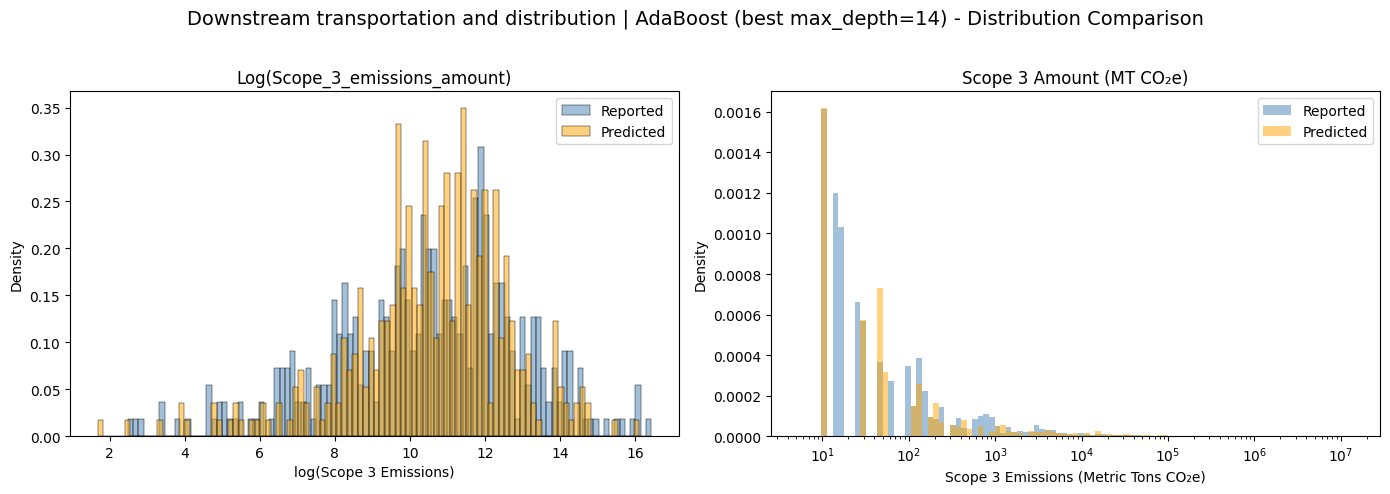

Downstream transportation and distribution - RMSLE: 1.3045, R²: 0.7373
Processing group: Employee commuting
Best max_depth for Employee commuting: 16 (R² = 0.7621)


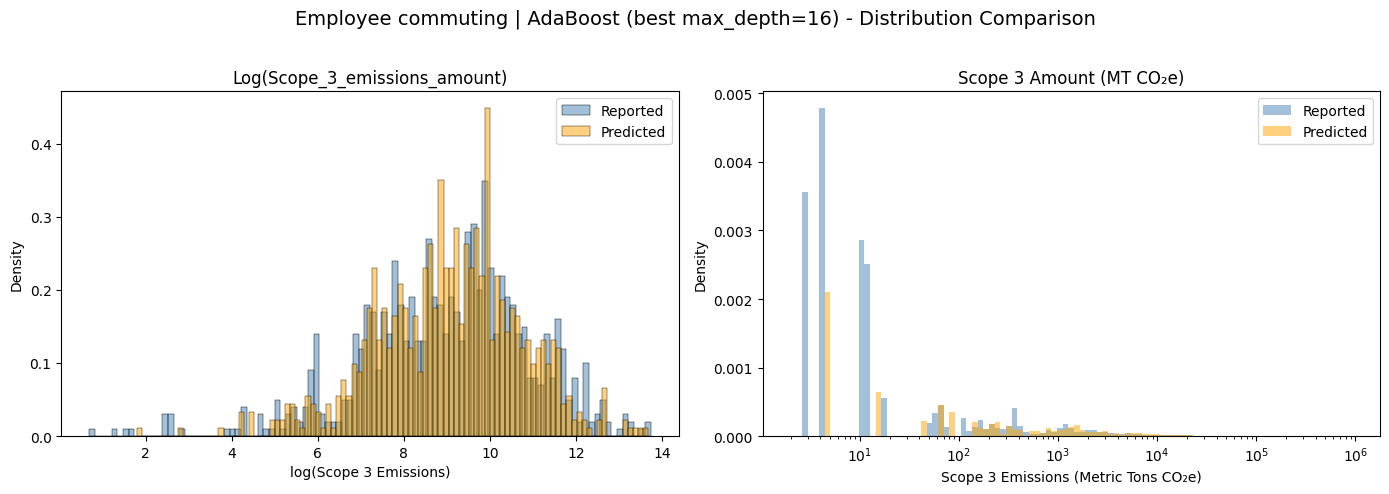

Employee commuting - RMSLE: 0.9714, R²: 0.7621
Processing group: End of life treatment of sold products
Best max_depth for End of life treatment of sold products: 16 (R² = 0.7892)


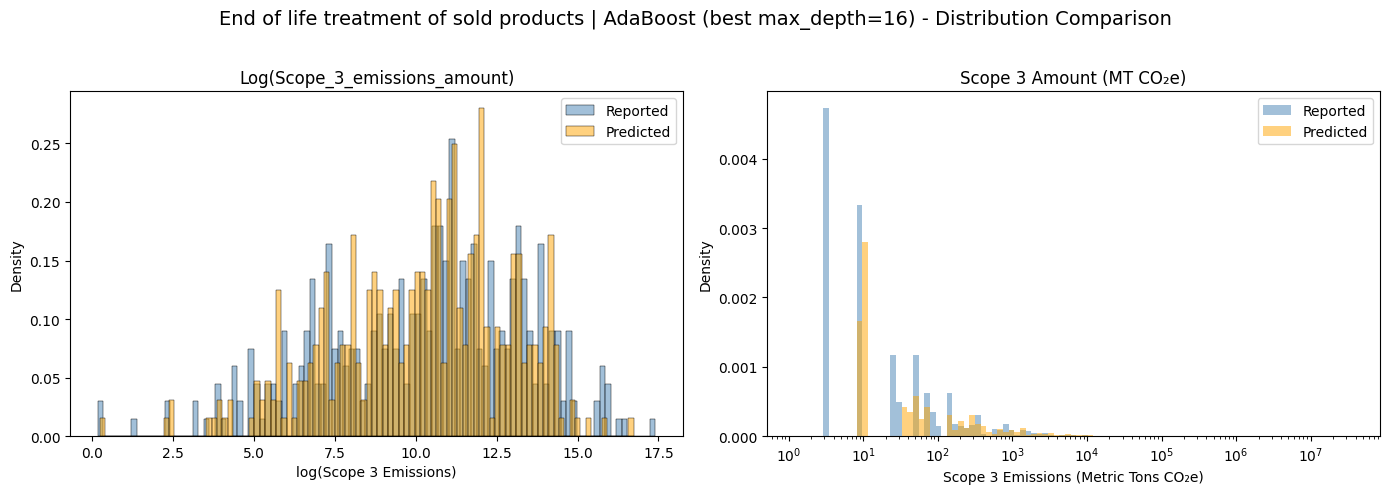

End of life treatment of sold products - RMSLE: 1.4150, R²: 0.7892
Processing group: Franchises
Best max_depth for Franchises: 14 (R² = 0.8839)


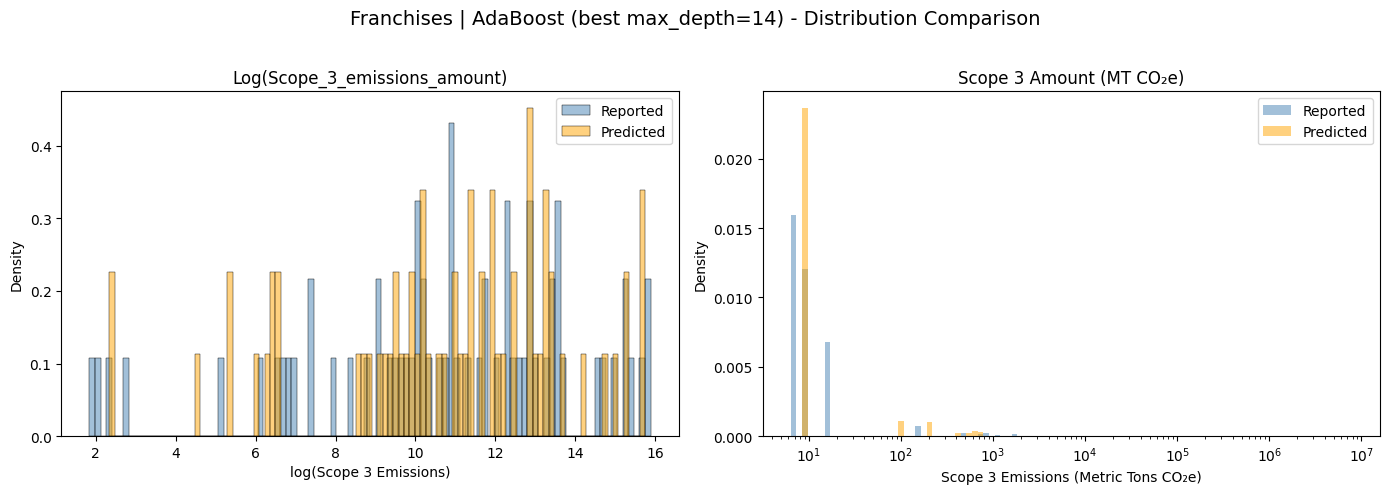

Franchises - RMSLE: 1.1393, R²: 0.8839
Processing group: Fuel-and-energy-related activities (not included in Scope 1 or 2)
Best max_depth for Fuel-and-energy-related activities (not included in Scope 1 or 2): 16 (R² = 0.8150)


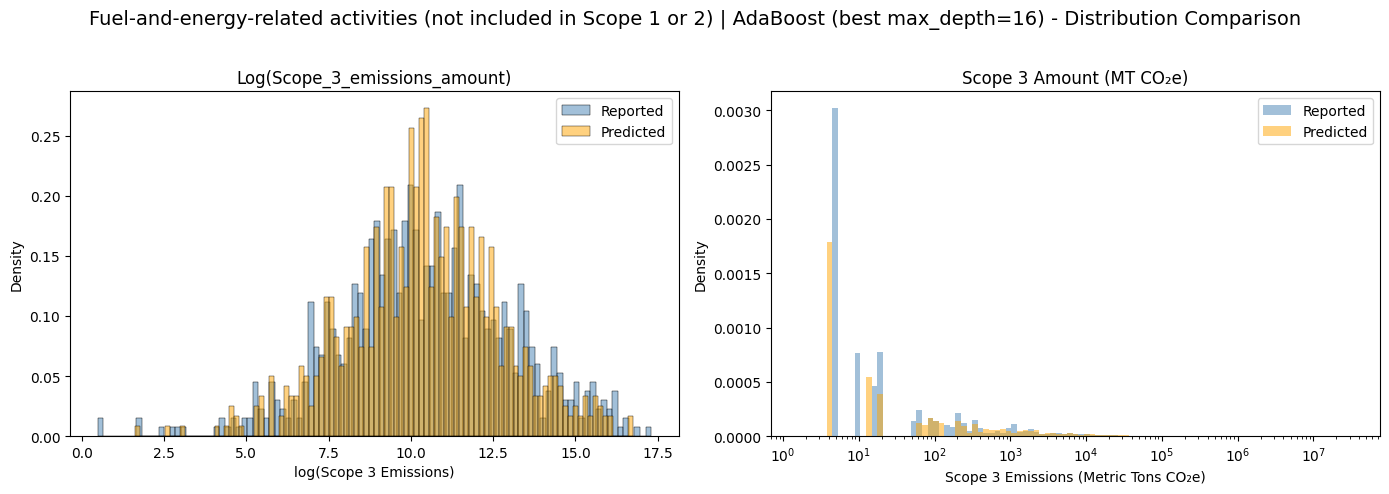

Fuel-and-energy-related activities (not included in Scope 1 or 2) - RMSLE: 1.1347, R²: 0.8150
Processing group: Investments
Best max_depth for Investments: 14 (R² = 0.5413)


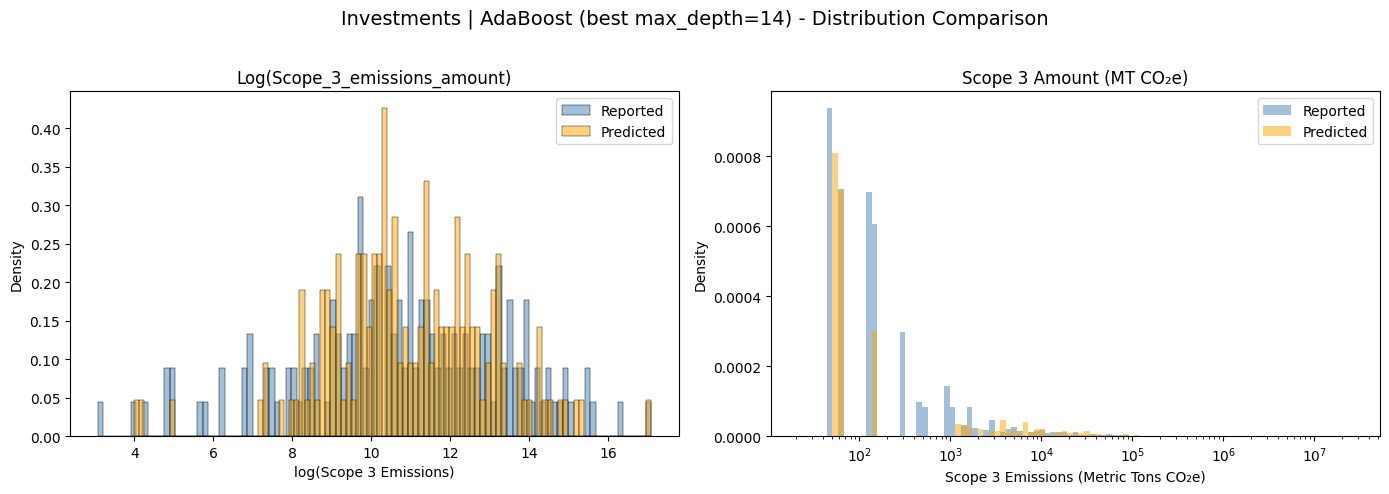

Investments - RMSLE: 1.8172, R²: 0.5413
Processing group: Other (downstream)
Best max_depth for Other (downstream): 8 (R² = 0.5270)


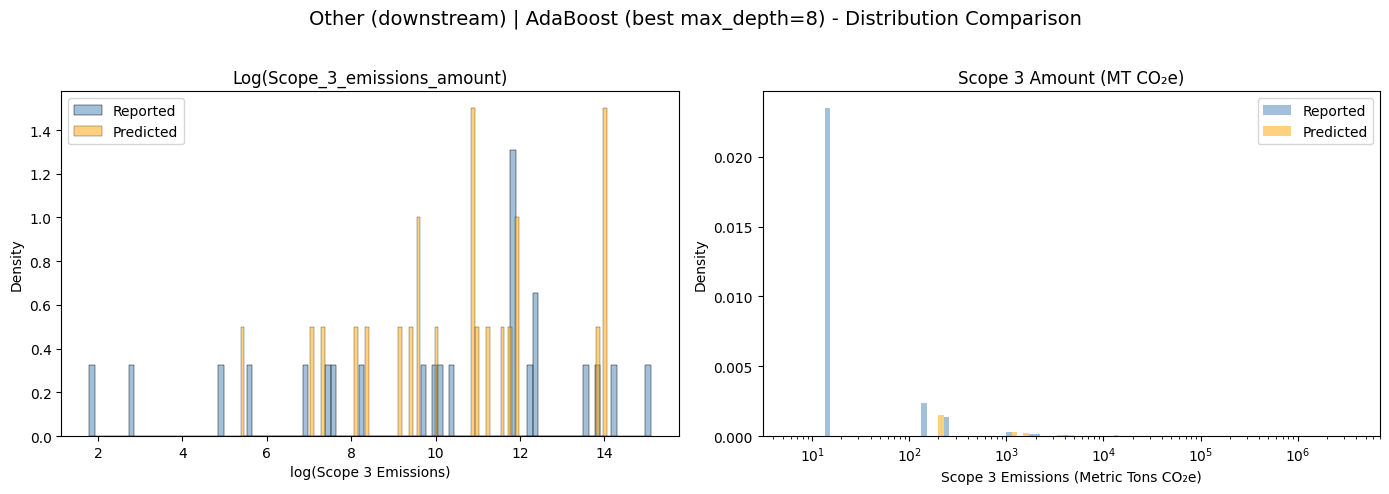

Other (downstream) - RMSLE: 2.4497, R²: 0.5270
Processing group: Other (upstream)
Best max_depth for Other (upstream): 12 (R² = 0.6398)


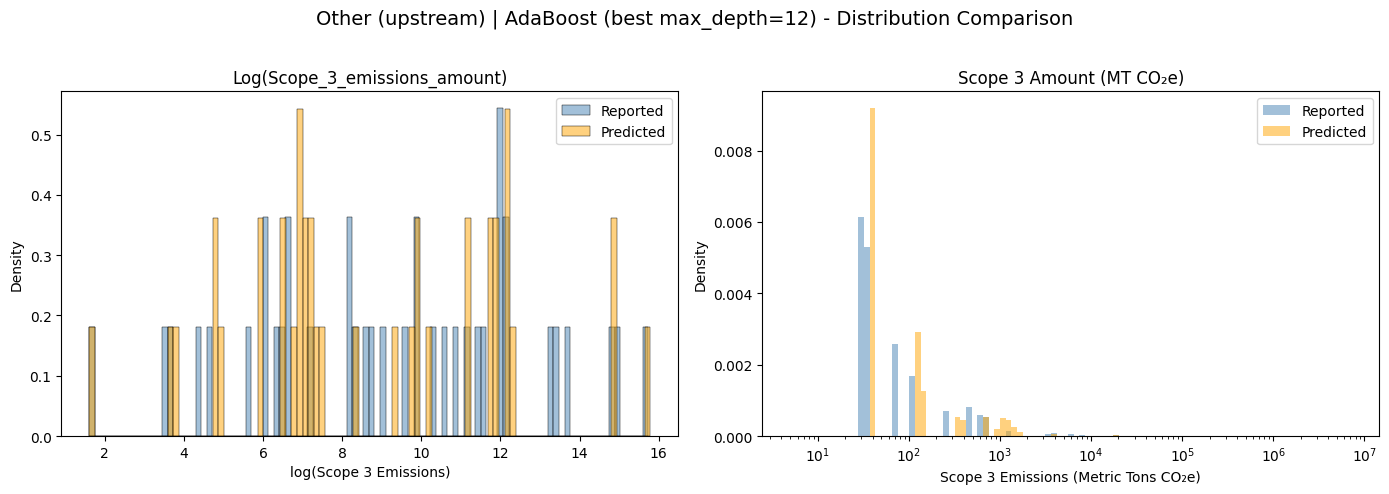

Other (upstream) - RMSLE: 2.0612, R²: 0.6398
Processing group: Processing of sold products
Best max_depth for Processing of sold products: 14 (R² = 0.7225)


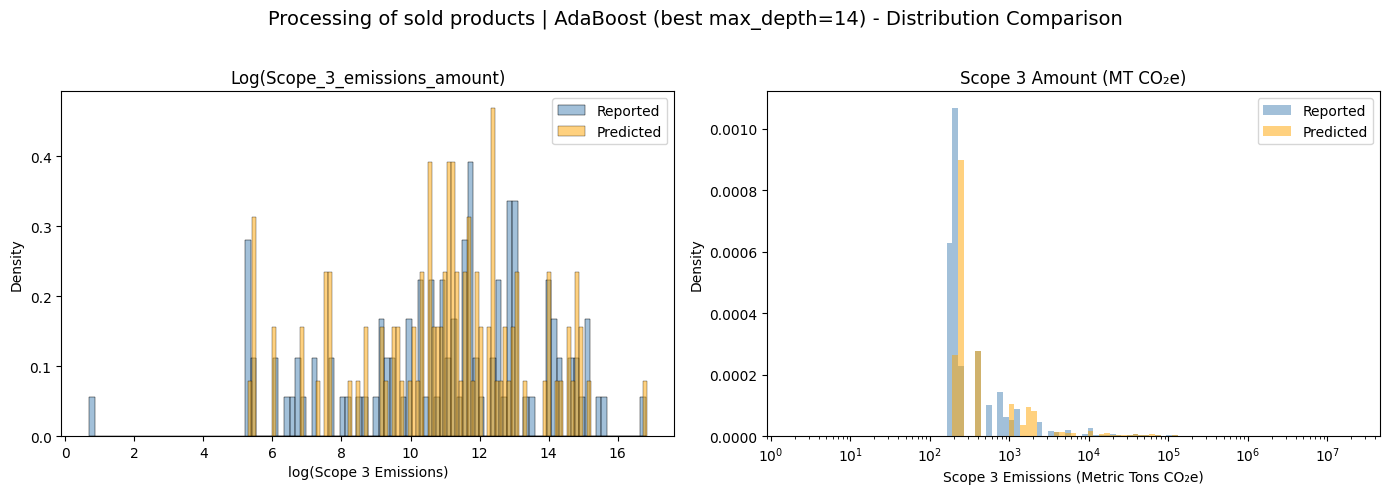

Processing of sold products - RMSLE: 1.5410, R²: 0.7225
Processing group: Purchased goods and services
Best max_depth for Purchased goods and services: 16 (R² = 0.8206)


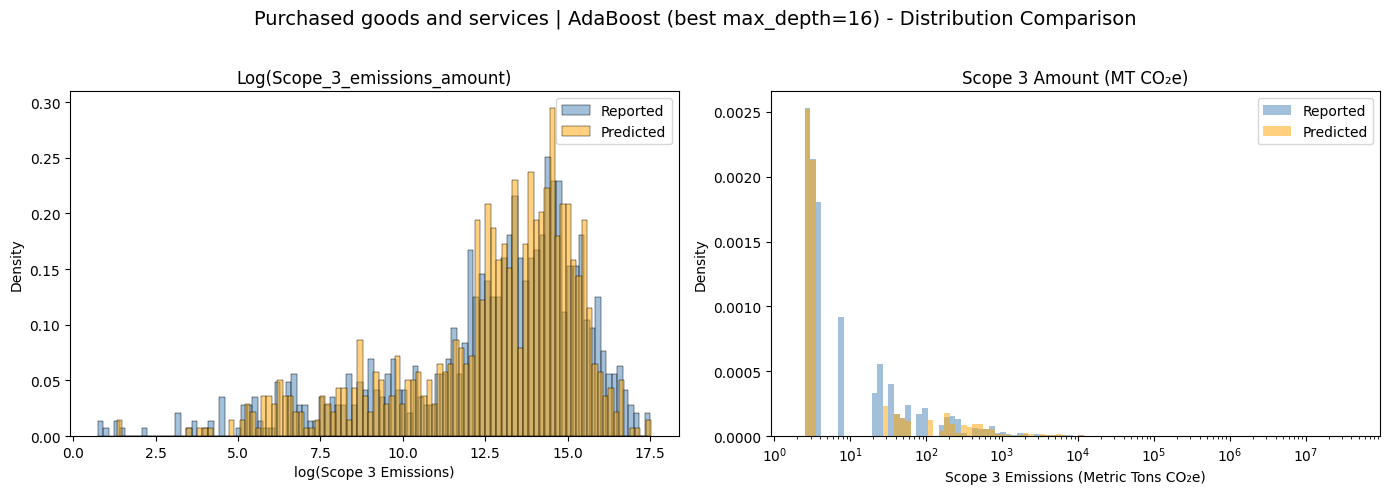

Purchased goods and services - RMSLE: 1.3049, R²: 0.8206
Processing group: Upstream leased assets
Best max_depth for Upstream leased assets: 16 (R² = 0.7064)


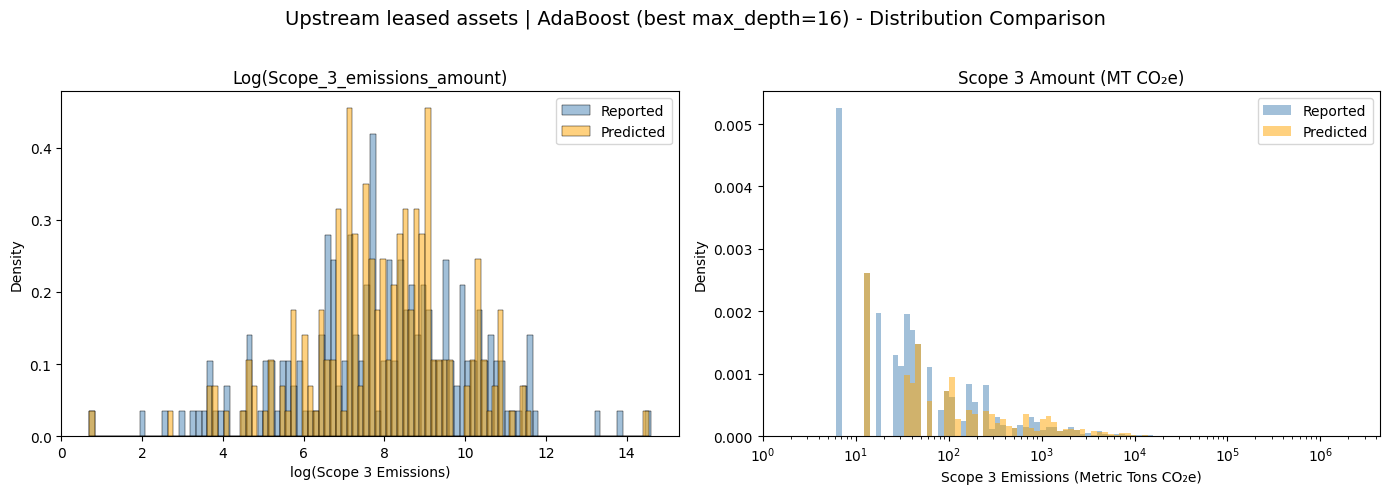

Upstream leased assets - RMSLE: 1.2111, R²: 0.7064
Processing group: Upstream transportation and distribution
Best max_depth for Upstream transportation and distribution: 16 (R² = 0.7691)


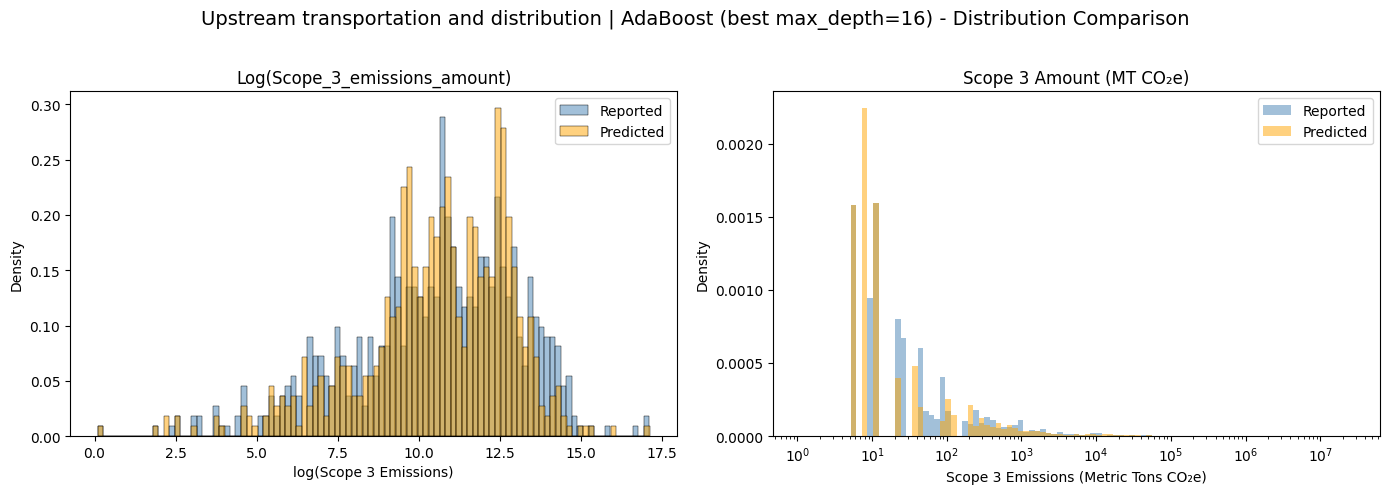

Upstream transportation and distribution - RMSLE: 1.2592, R²: 0.7691
Processing group: Use of sold products
Best max_depth for Use of sold products: 14 (R² = 0.8048)


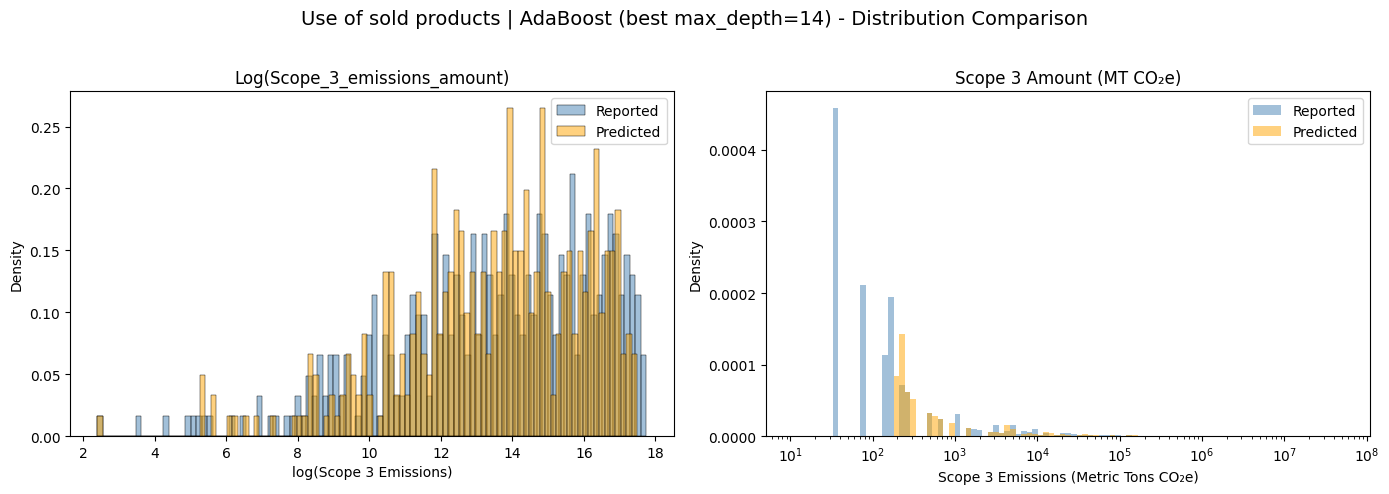

Use of sold products - RMSLE: 1.2941, R²: 0.8048
Processing group: Waste generated in operations
Best max_depth for Waste generated in operations: 16 (R² = 0.7530)


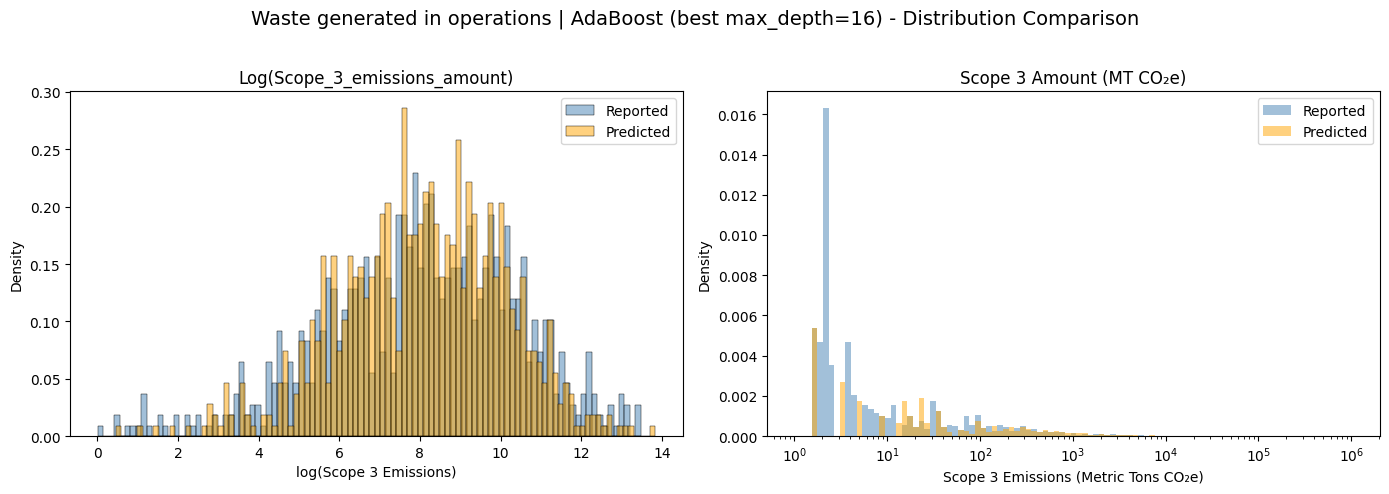

Waste generated in operations - RMSLE: 1.2108, R²: 0.7530

Summary of model performance across groups:
                                                                      rmsle  \
Employee commuting                                                 0.971448   
Fuel-and-energy-related activities (not included in Scope 1 or 2)  1.134738   
Franchises                                                         1.139341   
Business travel                                                    1.164246   
Waste generated in operations                                      1.210824   
Upstream leased assets                                             1.211140   
Capital goods                                                      1.223450   
Upstream transportation and distribution                           1.259166   
Use of sold products                                               1.294107   
Downstream transportation and distribution                         1.304469   
Purchased goods and services

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, r2_score

# ----------------------
# Target Preprocessing
# ----------------------

# Remove rows where Scope 3 Amount is 0 or missing
prepped_df = prepped_df[prepped_df["Scope_3_emissions_amount"] > 0].copy()

# Create log-transformed target
prepped_df["logged_Scope_3_emissions_amount"] = np.log1p(prepped_df["Scope_3_emissions_amount"])

# Group by Scope 3 Source type
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby("Scope_3_emissions_type")
}

# ----------------------
# Define Features and Target
# ----------------------

categorical_cols = [
    "Primary activity", "Primary sector",
    "incorporated_country", 
    "Third_party_verification"
]

numeric_cols = [
 "Revenue_USD", 
        "Market_Cap_USD", "ebitda_USD",
        "grossProfit_USD", "netIncome_USD",
        "cashAndCashEquivalents_USD", "longTermInvestments_USD",
        "totalAssets_USD", "totalLiabilities_USD",
        "totalInvestments_USD", "totalDebt_USD",
        "totalEquity_USD","shortTermInvestments_USD",
    "country_ghg_avg","country_population_avg","country_gdp_avg"
]




target_col = "logged_Scope_3_emissions_amount"

# ----------------------
# Results storage
# ----------------------
group_results = {}

# ----------------------
# Loop through Groups
# ----------------------
for group_name, group_df in grouped_dfs.items():
    print(f"Processing group: {group_name}")

    required_cols = categorical_cols + numeric_cols + [target_col]
    df_clean = group_df[required_cols].dropna()

    if df_clean.shape[0] < 20:
        print(f"Skipping '{group_name}' (not enough data: {df_clean.shape[0]} rows)")
        continue

    # Split features and target
    X = df_clean[categorical_cols + numeric_cols].copy()
    y = df_clean[target_col].copy()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Preprocessing Pipelines
    categorical_pipeline = Pipeline([
        ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("cat", categorical_pipeline, categorical_cols),
        ("num", "passthrough", numeric_cols)
    ])

    # ----------------------
    # Grid Search for Best max_depth
    # ----------------------
    depth_options = [2, 4, 6, 8, 10, 12, 14, 16]
    best_r2 = -np.inf
    best_model = None
    best_y_pred = None
    best_depth = None

    for depth in depth_options:
        base_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)

        model_pipeline = Pipeline(steps=[
            ("preprocessing", preprocessor),
            ("model", AdaBoostRegressor(estimator=base_tree, n_estimators=100, random_state=42))
        ])

        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        if r2 > best_r2:
            best_r2 = r2
            best_depth = depth
            best_model = model_pipeline
            best_y_pred = y_pred

    print(f"Best max_depth for {group_name}: {best_depth} (R² = {best_r2:.4f})")

    # Final best model
    y_pred = best_y_pred
    model_pipeline = best_model

    # ----------------------
    # Metrics
    # ----------------------
    rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred)))

    # ----------------------
    # Dual Histogram Plots
    # ----------------------
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    bins = 100

    # Plot A: Log space
    sns.histplot(y_test, bins=bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[0])
    sns.histplot(y_pred, bins=bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[0])

    
    
    axes[0].set_title("Log(Scope_3_emissions_amount)")
    axes[0].set_xlabel("log(Scope 3 Emissions)")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    # Plot B: Real-world space
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(y_pred)

    # Define logarithmic bins for a smoother histogram in log space
    min_val = min(y_test_exp.min(), y_pred_exp.min())
    max_val = max(y_test_exp.max(), y_pred_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

    sns.histplot(y_test_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])

    axes[1].set_xscale("log")
    axes[1].set_title("Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.suptitle(f"{group_name} | AdaBoost (best max_depth={best_depth}) - Distribution Comparison", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Store results
    group_results[group_name] = {
        "rmsle": rmsle,
        "r2_score": best_r2,
        "best_depth": best_depth,
        "n_train": X_train.shape[0],
        "n_test": X_test.shape[0]
    }

    print(f"{group_name} - RMSLE: {rmsle:.4f}, R²: {best_r2:.4f}")

# ----------------------
# Summary Table
# ----------------------
results_df = pd.DataFrame(group_results).T.sort_values("rmsle")
print("\nSummary of model performance across groups:")
print(results_df)


# Enhanced AdaBoost Modeling for Scope 3 Emissions: Expanded Metrics and Log-Transformed Feature Pipeline

This updated version of the AdaBoost modeling pipeline builds on the previous code by introducing several enhancements aimed at improving both model robustness and evaluation clarity. Like before, it models log-transformed Scope 3 GHG emissions by grouping data according to emission source types. However, key upgrades include:

1. **Log Transformation of Features (Optional):**
   A `signed_log` function is defined and embedded in a `FunctionTransformer`, which can be used to log-transform skewed numeric features. This is designed to linearize relationships and reduce the impact of outliers—although it's configured as optional (`"passthrough"` remains the default in this run).

2. **Expanded Error Metrics:**
   In addition to the R² and RMSLE used previously, the new code computes:

   * **MAPE in both log and original scales**
   * **RMSE and MAE** in the original emissions units
     This provides a more comprehensive understanding of the model’s real-world prediction performance.

3. **Improved Visualizations:**

   * The **log-space plot** now uses **Kernel Density Estimation (KDE)** instead of histograms for a smoother comparison.
   * Key performance metrics are **annotated directly** on the plot for immediate interpretability.
   * The second plot (real-scale histogram) retains a logarithmic x-axis but uses enhanced formatting for clarity.

4. **Improved Output Structure:**

   * Metrics are stored in a dictionary with formatted strings for readability.
   * The results are **saved to a CSV file**, enabling external analysis or dashboard integration.

Overall, these modifications provide deeper model diagnostics, improve visual communication, and enhance optional preprocessing flexibility—supporting more tailored analysis of Scope 3 emission behaviors across corporate activity types.




Processing group: Business travel
 Best max_depth = 12 → R²(log) = 0.6187


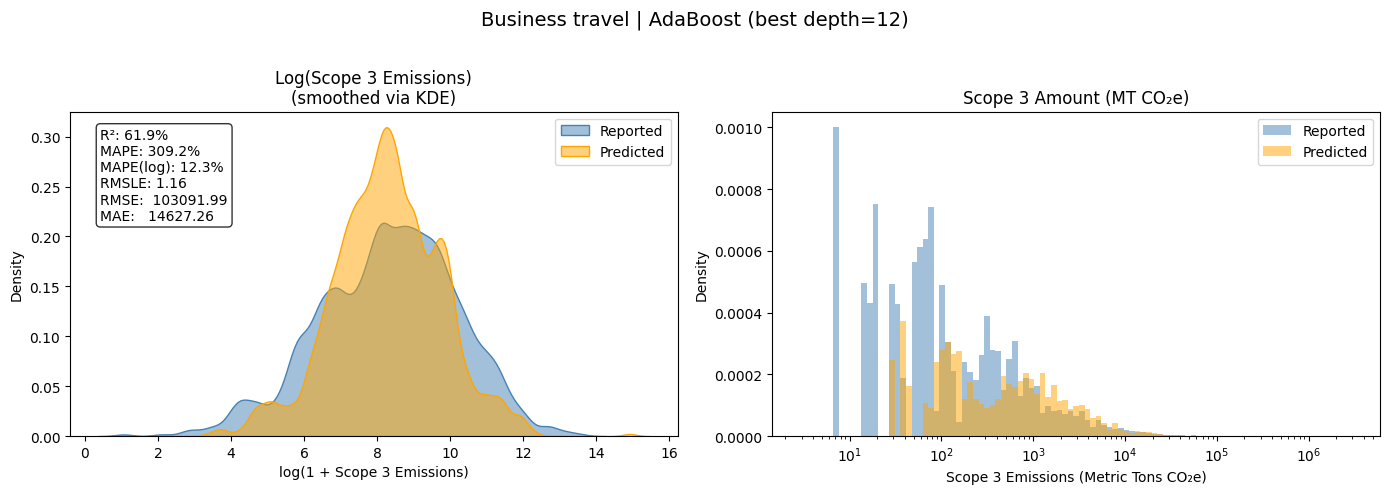


Processing group: Capital goods
 Best max_depth = 16 → R²(log) = 0.6478


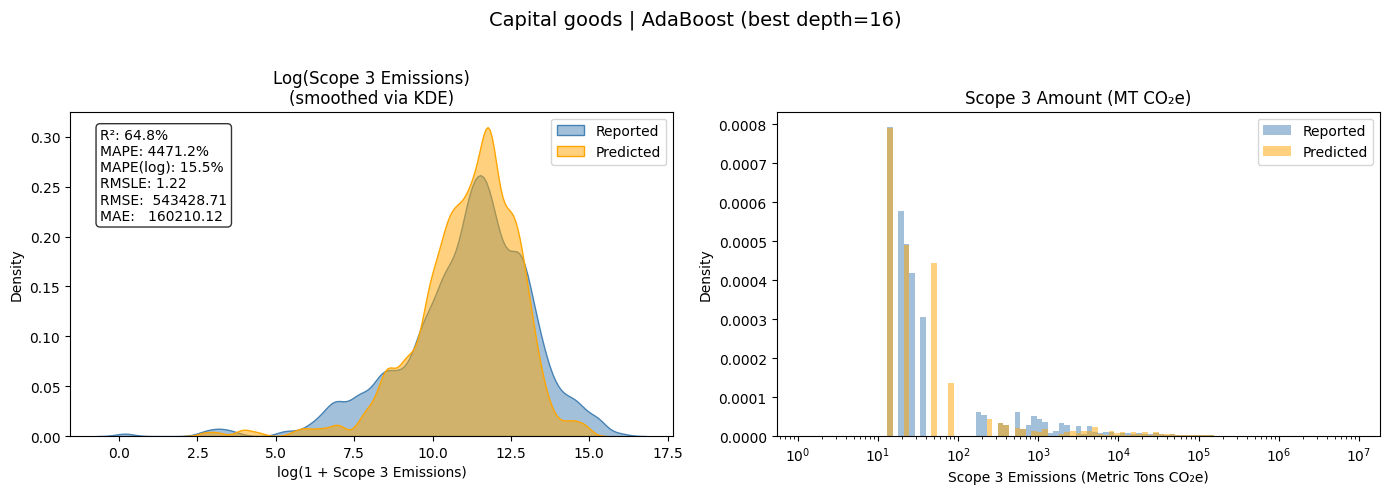


Processing group: Downstream leased assets
 Best max_depth = 14 → R²(log) = 0.7322


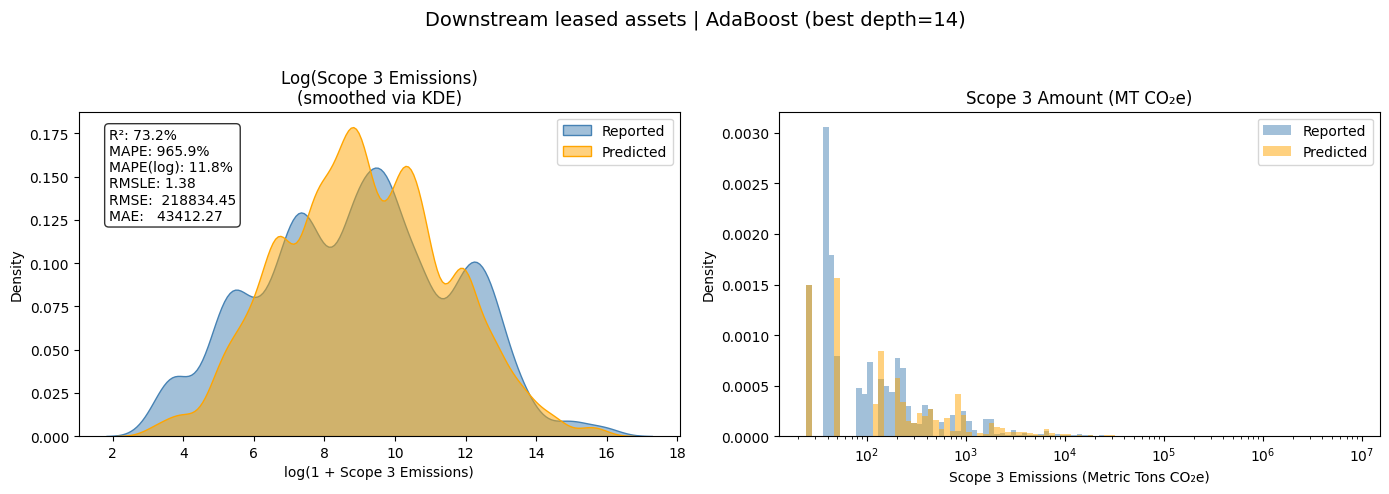


Processing group: Downstream transportation and distribution
 Best max_depth = 14 → R²(log) = 0.7373


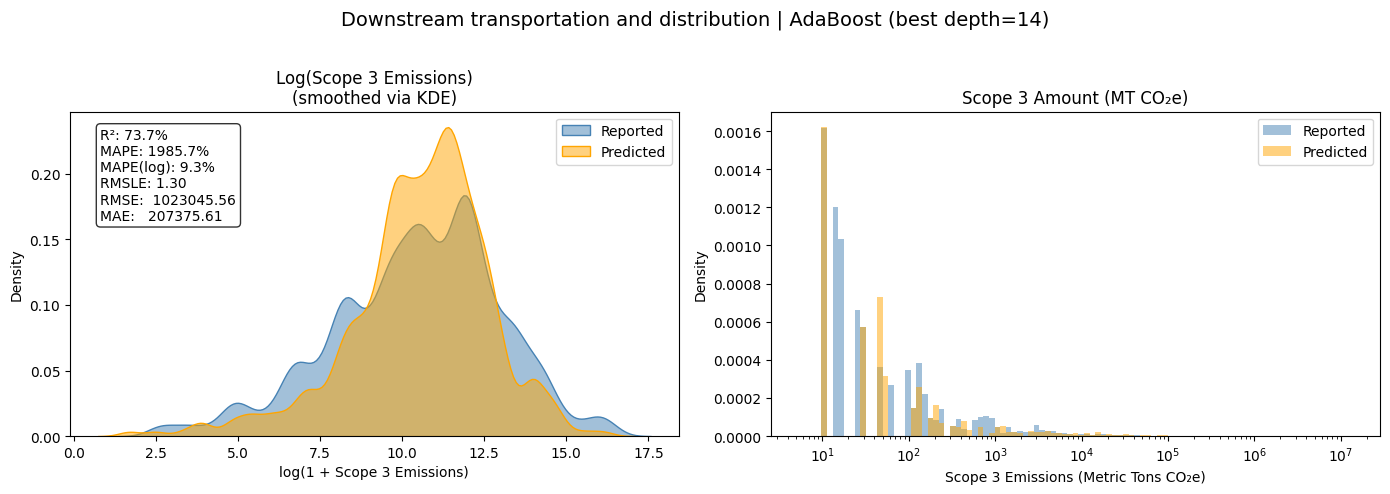


Processing group: Employee commuting
 Best max_depth = 16 → R²(log) = 0.7621


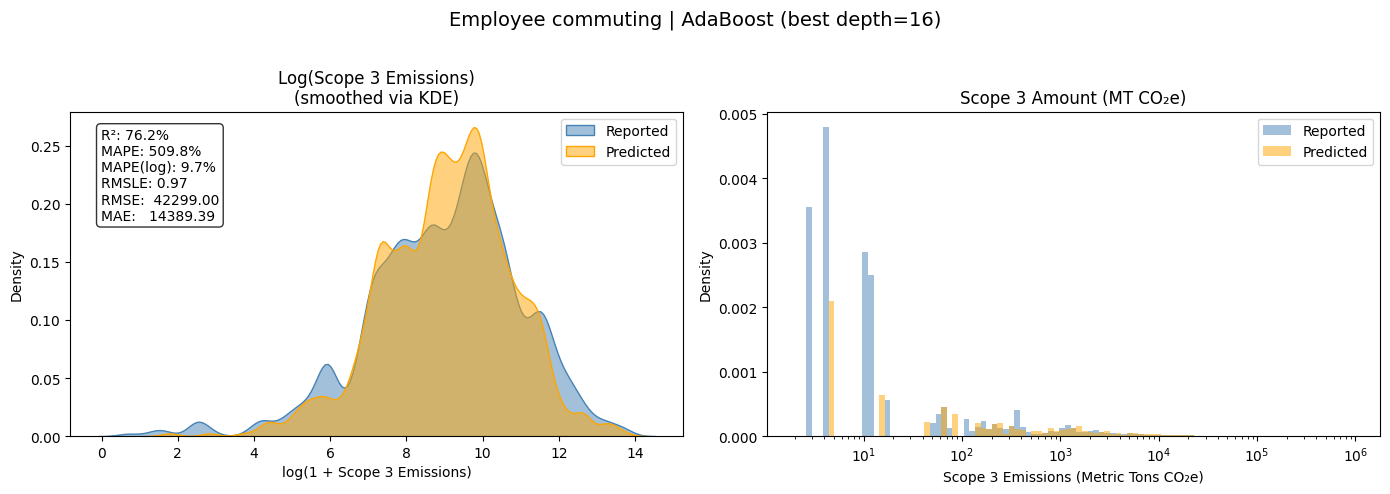


Processing group: End of life treatment of sold products
 Best max_depth = 16 → R²(log) = 0.7892


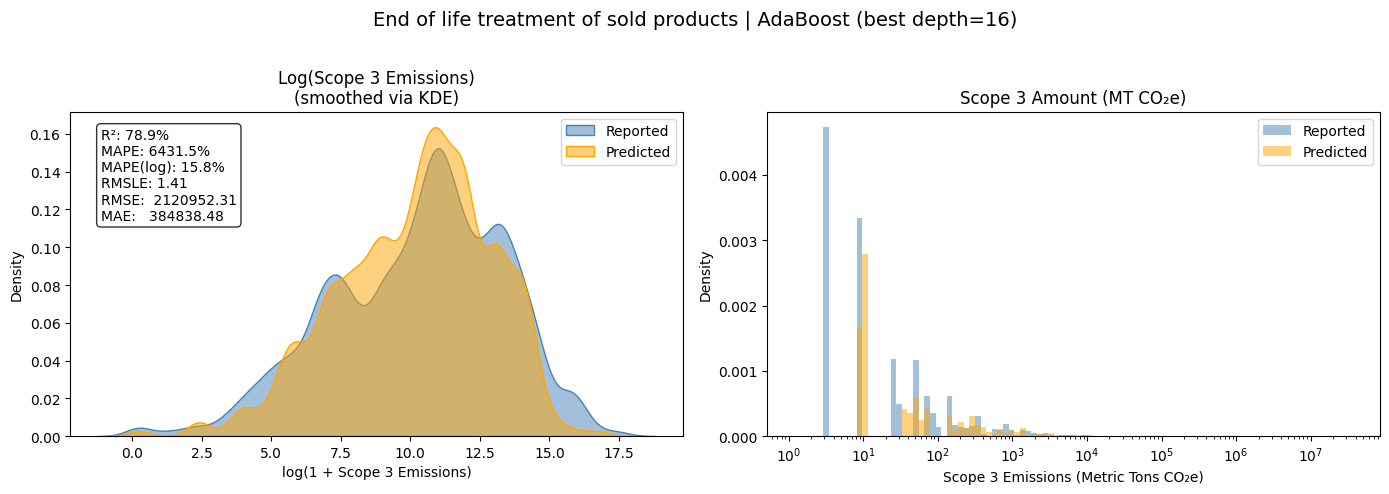


Processing group: Franchises
 Best max_depth = 14 → R²(log) = 0.8839


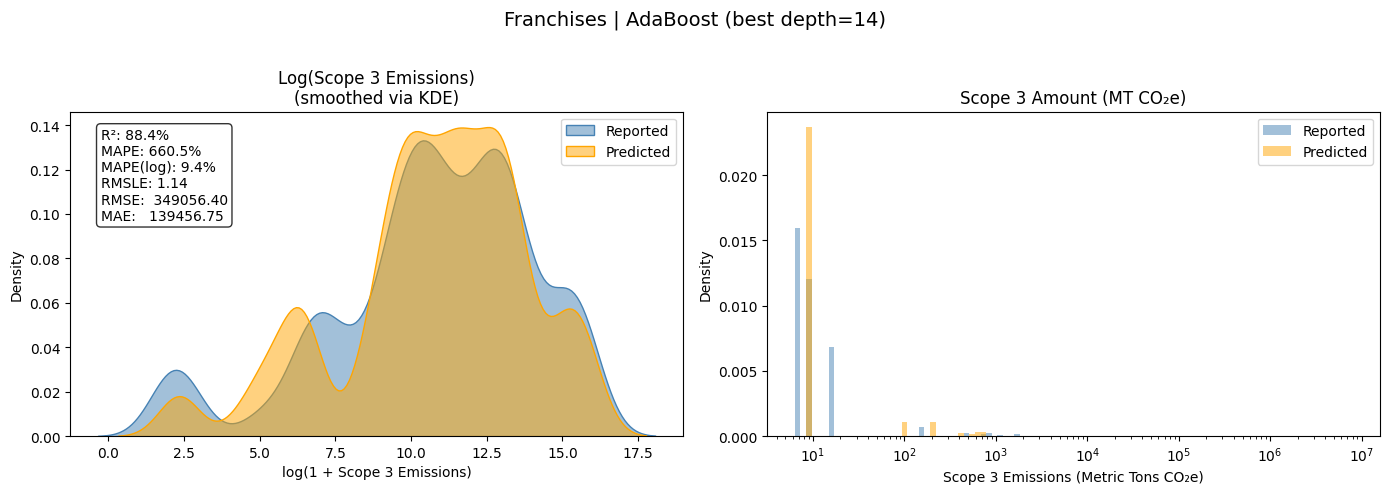


Processing group: Fuel-and-energy-related activities (not included in Scope 1 or 2)
 Best max_depth = 16 → R²(log) = 0.8150


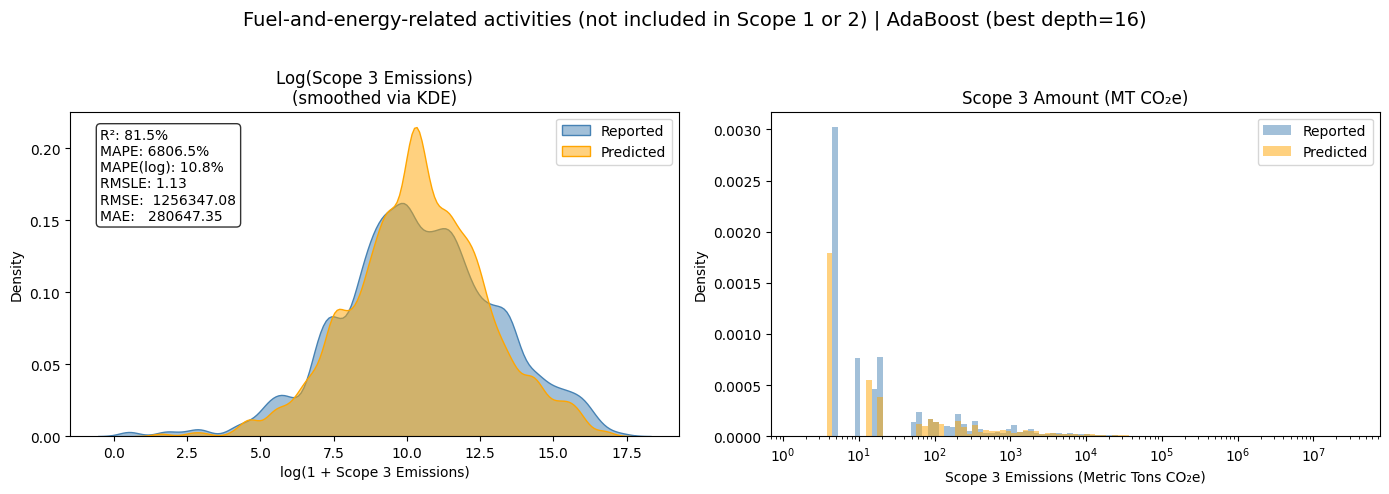


Processing group: Investments
 Best max_depth = 14 → R²(log) = 0.5413


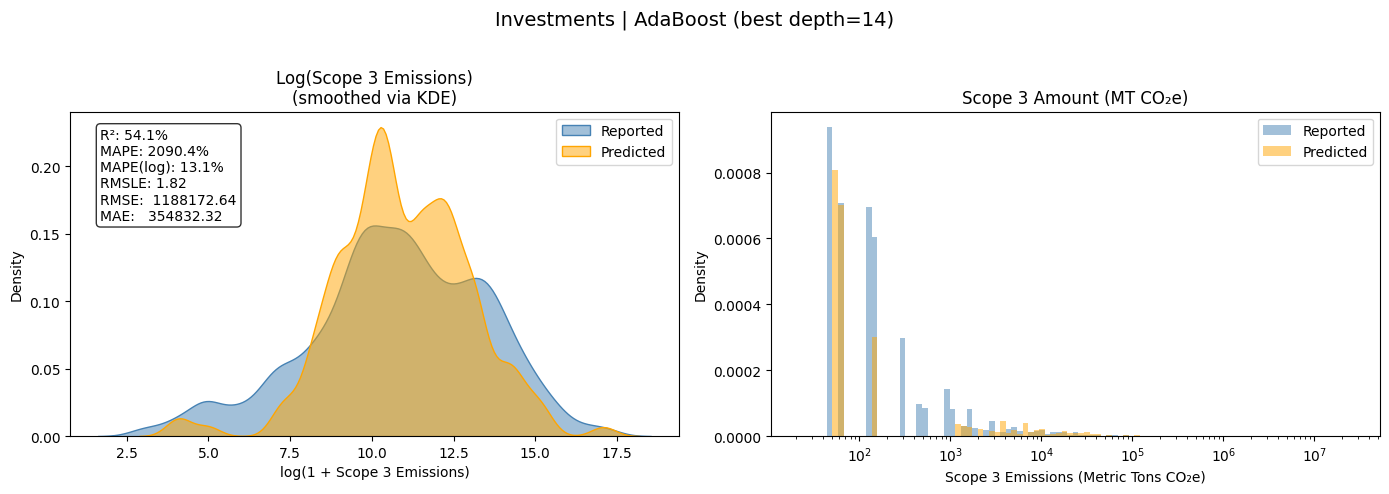


Processing group: Other (downstream)
 Best max_depth = 8 → R²(log) = 0.5270


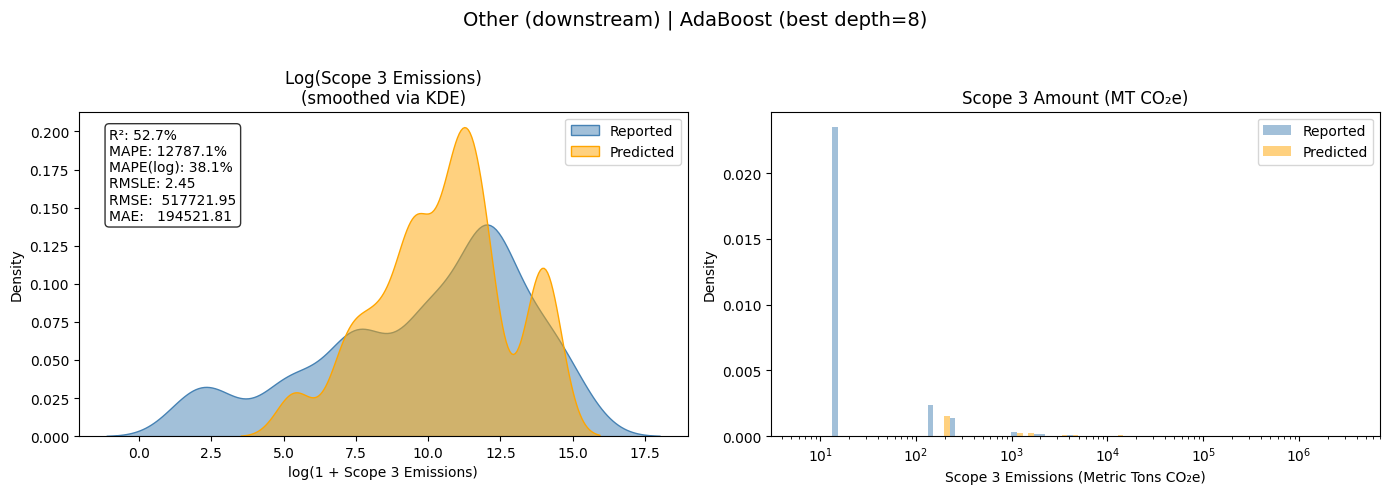


Processing group: Other (upstream)
 Best max_depth = 12 → R²(log) = 0.6398


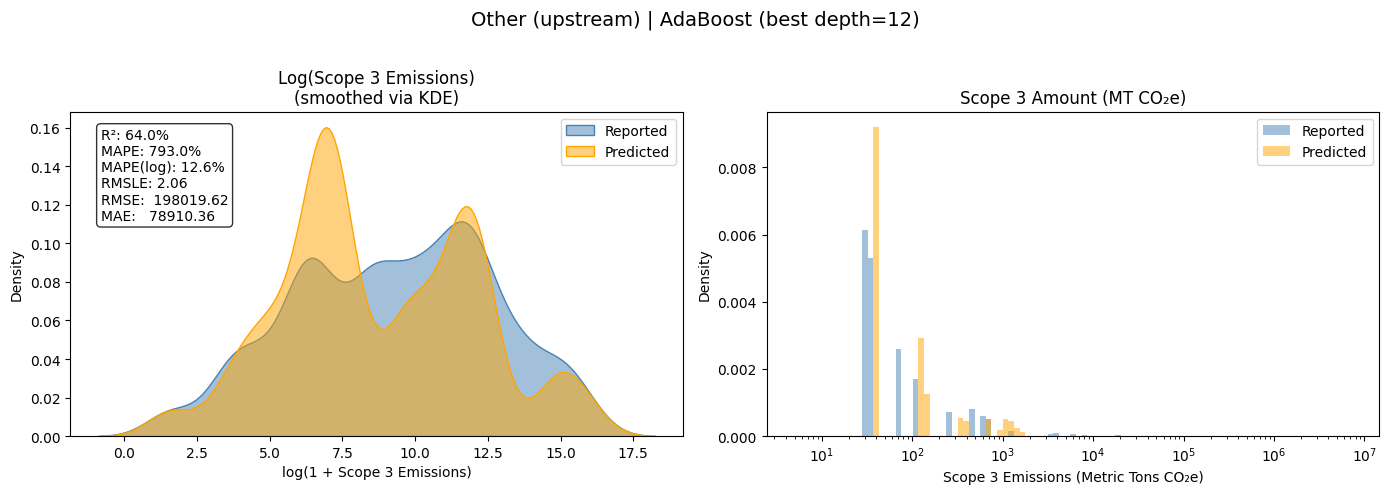


Processing group: Processing of sold products
 Best max_depth = 14 → R²(log) = 0.7225


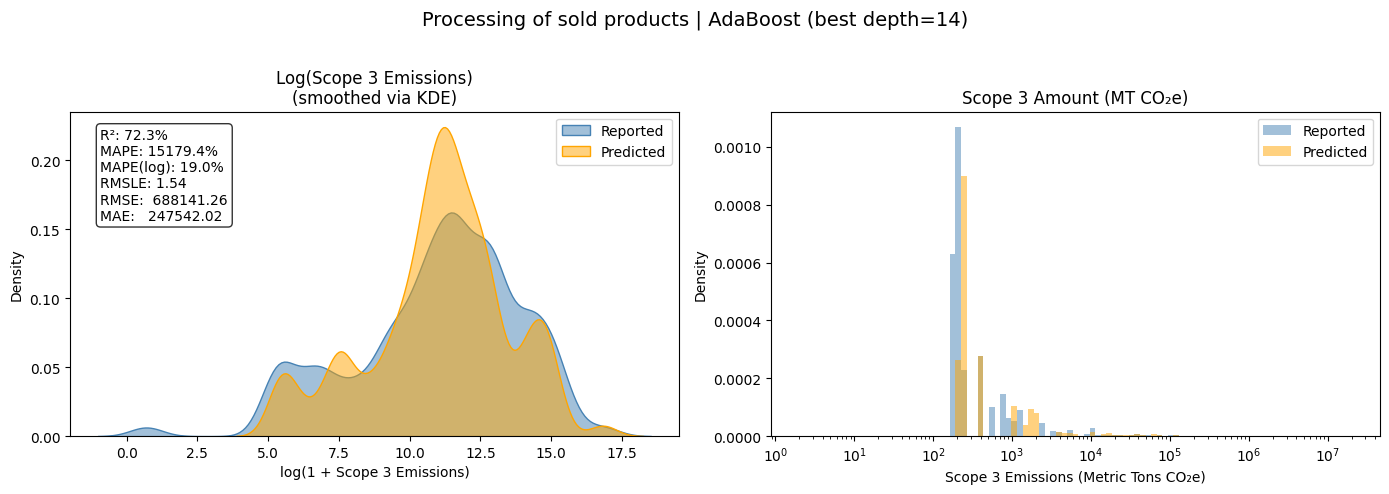


Processing group: Purchased goods and services
 Best max_depth = 16 → R²(log) = 0.8206


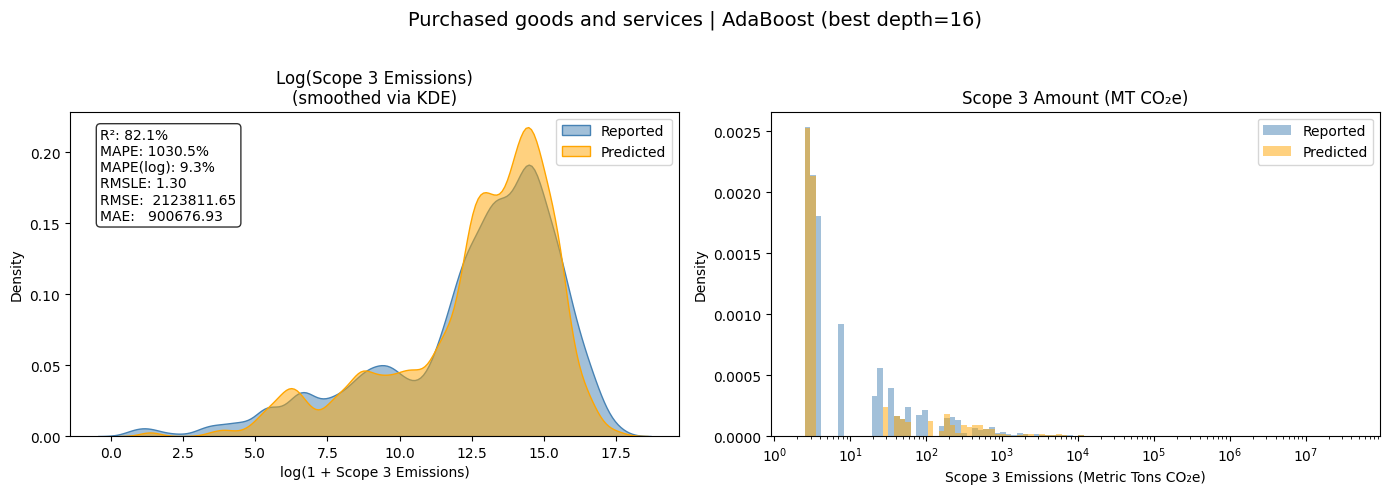


Processing group: Upstream leased assets
 Best max_depth = 16 → R²(log) = 0.7064


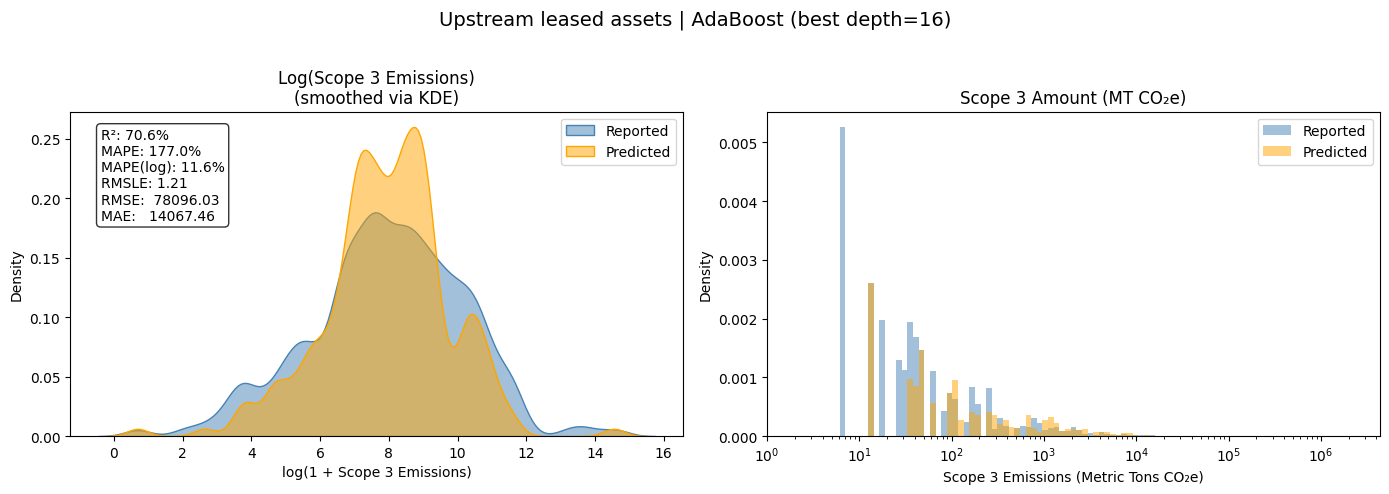


Processing group: Upstream transportation and distribution
 Best max_depth = 16 → R²(log) = 0.7691


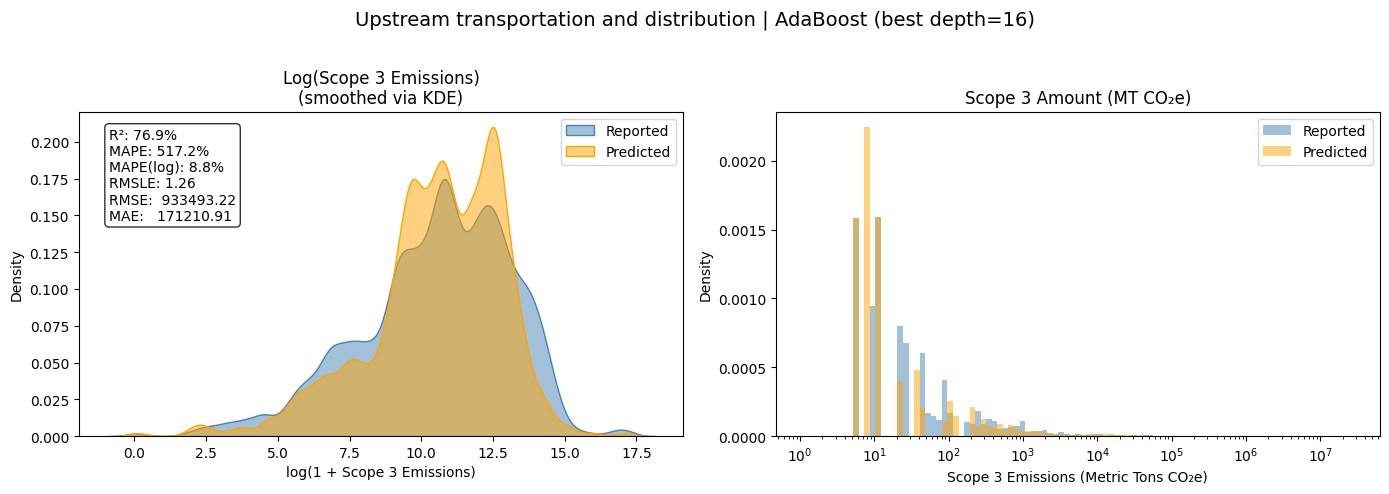


Processing group: Use of sold products
 Best max_depth = 14 → R²(log) = 0.8048


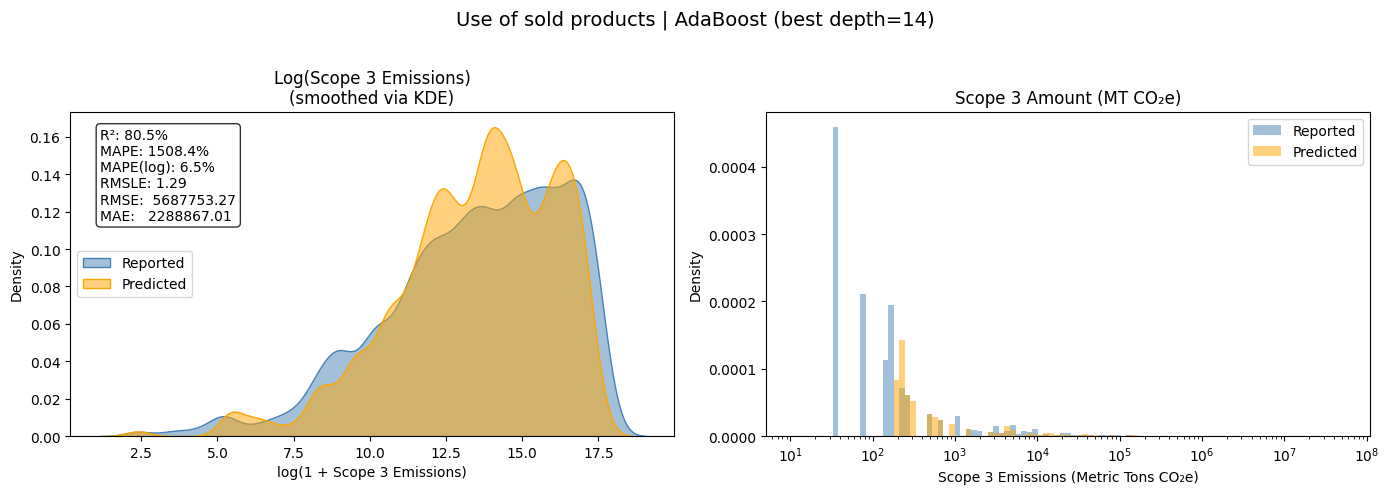


Processing group: Waste generated in operations
 Best max_depth = 16 → R²(log) = 0.7530


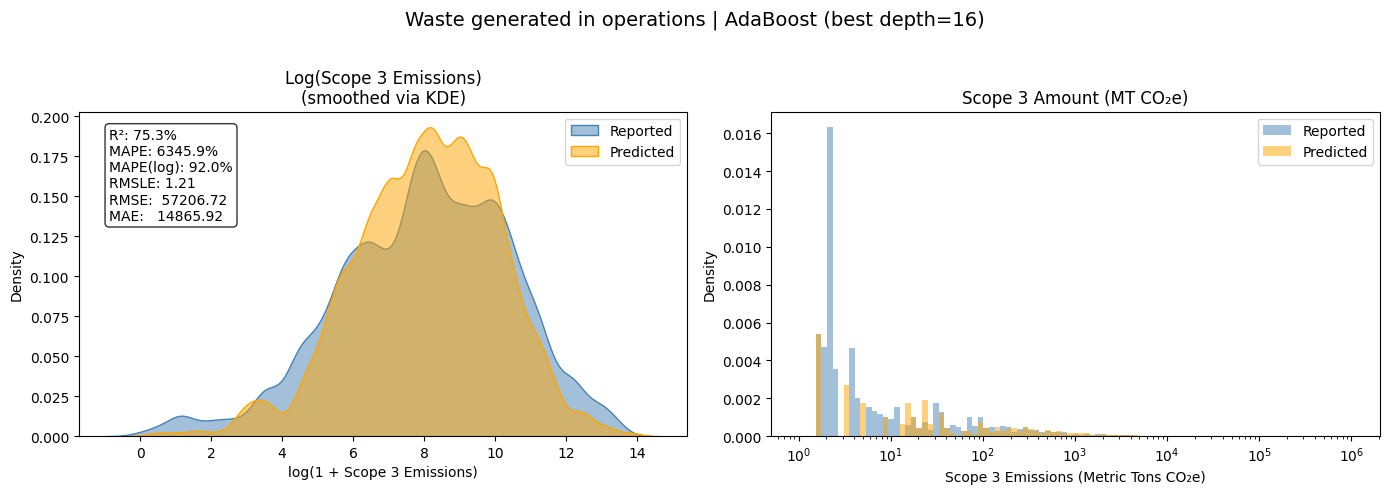

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_log_error,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# ----------------------
# Target Preprocessing
# ----------------------

# Remove rows where Scope 3 Amount is 0 or missing
prepped_df = prepped_df[prepped_df["Scope_3_emissions_amount"] > 0].copy()

# Create log‑transformed target
prepped_df["logged_Scope_3_emissions_amount"] = np.log1p(prepped_df["Scope_3_emissions_amount"])

# Group by Scope 3 Source type
grouped_dfs = {
    name: df.copy()
    for name, df in prepped_df.groupby("Scope_3_emissions_type")
}

# ----------------------
# Define Features and Pipelines
# ----------------------

# if you want to log-transform numeric features, you could use:
def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

numeric_pipeline = Pipeline([
    ("log", FunctionTransformer(signed_log, validate=False)),
    # optionally add a scaler here
])

categorical_cols = [
    "Primary activity",
    "Primary sector",
    "incorporated_country",
    "Third_party_verification"
]

numeric_cols = [
    "Revenue_USD", "Market_Cap_USD", "ebitda_USD",
    "grossProfit_USD", "netIncome_USD", "cashAndCashEquivalents_USD",
    "longTermInvestments_USD", "totalAssets_USD", "totalLiabilities_USD",
    "totalInvestments_USD", "totalDebt_USD", "totalEquity_USD",
    "shortTermInvestments_USD",
    "country_ghg_avg", "country_population_avg", "country_gdp_avg"
]

target_col = "logged_Scope_3_emissions_amount"

# ----------------------
# Iterate over each group
# ----------------------
group_results = {}

for group_name, group_df in grouped_dfs.items():
    print(f"\nProcessing group: {group_name}")

    # select only the needed columns & drop missing
    cols = categorical_cols + numeric_cols + [target_col]
    df_clean = group_df[cols].dropna()
    if df_clean.shape[0] < 20:
        print(f" Skipping (only {df_clean.shape[0]} rows)")
        continue

    # train/test split
    X = df_clean[categorical_cols + numeric_cols]
    y = df_clean[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # build preprocessing inside loop 
    preprocessor = ColumnTransformer([
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_cols),
        ("num", "passthrough", numeric_cols),  # or numeric_pipeline if you want feature‐logs
    ])

    # grid‐search over tree depth
    best_r2 = -np.inf
    best_model = None
    best_pred = None
    best_depth = None

    for depth in [2,4,6,8,10,12,14,16]:
        base = DecisionTreeRegressor(max_depth=depth, random_state=42)
        pipe = Pipeline([
            ("preproc", preprocessor),
            ("model", AdaBoostRegressor(estimator=base, n_estimators=100, random_state=42))
        ])
        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)
        r2 = r2_score(y_test, preds)
        if r2 > best_r2:
            best_r2, best_model, best_pred, best_depth = r2, pipe, preds, depth

    print(f" Best max_depth = {best_depth} → R²(log) = {best_r2:.4f}")

    # prepare metrics
    # back‐transform to original scale
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(best_pred)

    # R² on log‑scale → % with 1 decimal
    r2_pct = best_r2 * 100



    # RMSLE → 2 decimals
    rmsle = np.sqrt(mean_squared_log_error(y_test_exp, y_pred_exp))
    # NEW: MAPE on log scale
    mape_log = np.mean(np.abs((y_test - best_pred) / y_test)) * 100
    
    # MAPE on real scale → % with 1 decimal
    mape = np.mean(np.abs((y_test_exp - y_pred_exp) / y_test_exp)) * 100


    # RMSE and MAE on real scale
    rmse_orig = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
    mae_orig = mean_absolute_error(y_test_exp, y_pred_exp)
    

    metrics_txt = (
        f"R²: {r2_pct:.1f}%\n"
        f"MAPE: {mape:.1f}%\n"
        f"MAPE(log): {mape_log:.1f}%\n"
        f"RMSLE: {rmsle:.2f}\n"
        f"RMSE:  {rmse_orig:.2f}\n"
        f"MAE:   {mae_orig:.2f}"
    

    )


    # store for summary
    group_results[group_name] = {
        "R²(log)":     f"{r2_pct:.1f}%",
        "MAPE_orig":   f"{mape:.1f}%",
        "MAPE_log%":  f"{mape_log:.1f}",
        "RMSLE":       f"{rmsle:.2f}",
        "RMSE_orig":   f"{rmse_orig:.2f}",
        "MAE_orig":    f"{mae_orig:.2f}",

        # "max_depth": best_depth,
        # "n_train": X_train.shape[0],
        # "n_test":  X_test.shape[0]
    }

    # ----------------------
    # Plotting distributions
    # ----------------------
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # A) log‑space KDE with metrics
    sns.kdeplot(
        y_test, fill=True, bw_adjust=0.5,
        color="steelblue", alpha=0.5,
        label="Reported", ax=axes[0]
    )
    sns.kdeplot(
        best_pred, fill=True, bw_adjust=0.5,
        color="orange", alpha=0.5,
        label="Predicted", ax=axes[0]
    )
    axes[0].set_title("Log(Scope 3 Emissions)\n(smoothed via KDE)")
    axes[0].set_xlabel("log(1 + Scope 3 Emissions)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    # annotate metrics
    axes[0].text(
        0.05, 0.95, metrics_txt,
        transform=axes[0].transAxes,
        va="top",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

    # B) real‑world histogram on log‑x
    minv = min(y_test_exp.min(), y_pred_exp.min())
    maxv = max(y_test_exp.max(), y_pred_exp.max())
    bins = np.logspace(np.log10(minv+1), np.log10(maxv+1), 100)
    sns.histplot(
        y_test_exp, bins=bins, stat="density",
        color="steelblue", alpha=0.5, label="Reported",
        ax=axes[1]
    )
    sns.histplot(
        y_pred_exp, bins=bins, stat="density",
        color="orange", alpha=0.5, label="Predicted",
        ax=axes[1]
    )
    axes[1].set_xscale("log")
    axes[1].set_title("Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.suptitle(f"{group_name} | AdaBoost (best depth={best_depth})", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# ----------------------
# Summary of all groups
# ----------------------
metrics_df = pd.DataFrame(group_results).T
# print("\nModel performance by group:")
# print(metrics_df)

metrics_df.to_csv(
    r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Adaboost_GHG.csv"
)




Processing group: Business travel
 Best max_depth = 12 → R²(log) = 0.6187


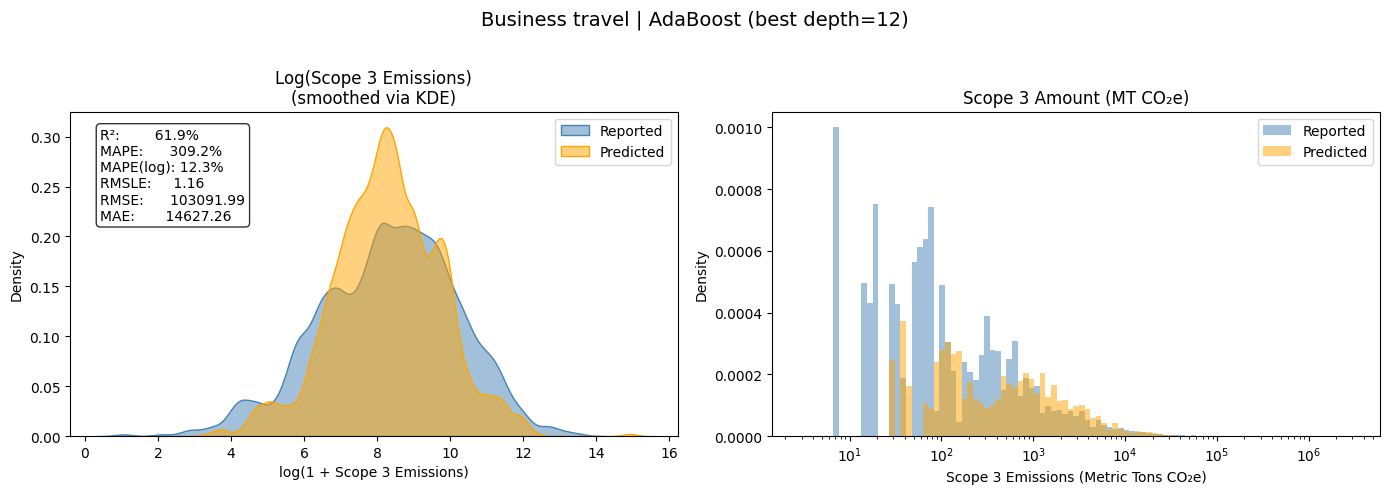


Processing group: Capital goods
 Best max_depth = 16 → R²(log) = 0.6478


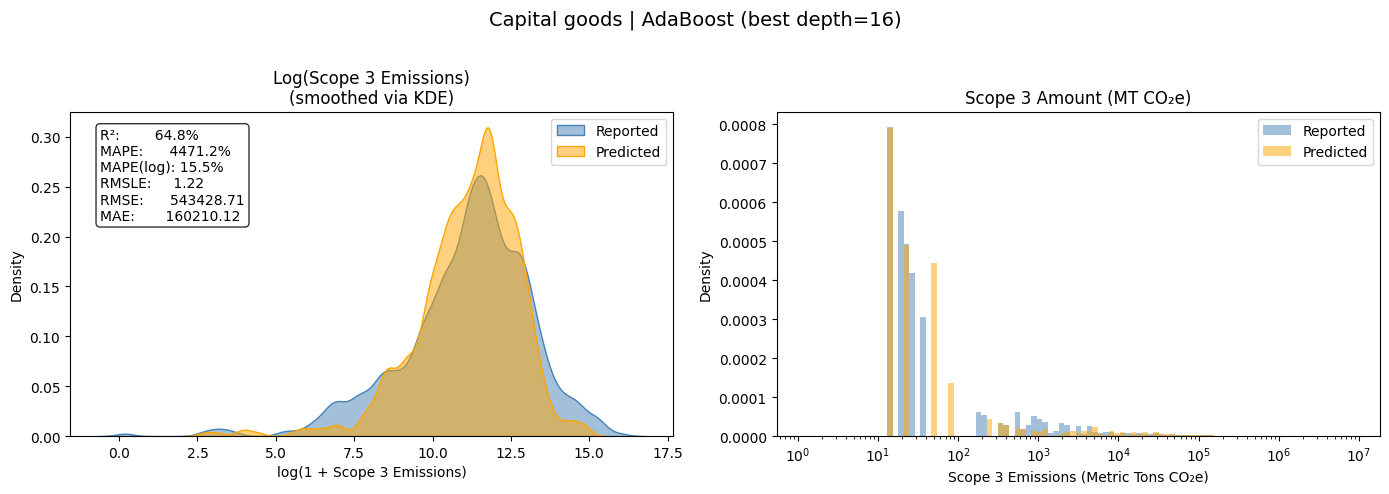


Processing group: Downstream leased assets
 Best max_depth = 14 → R²(log) = 0.7322


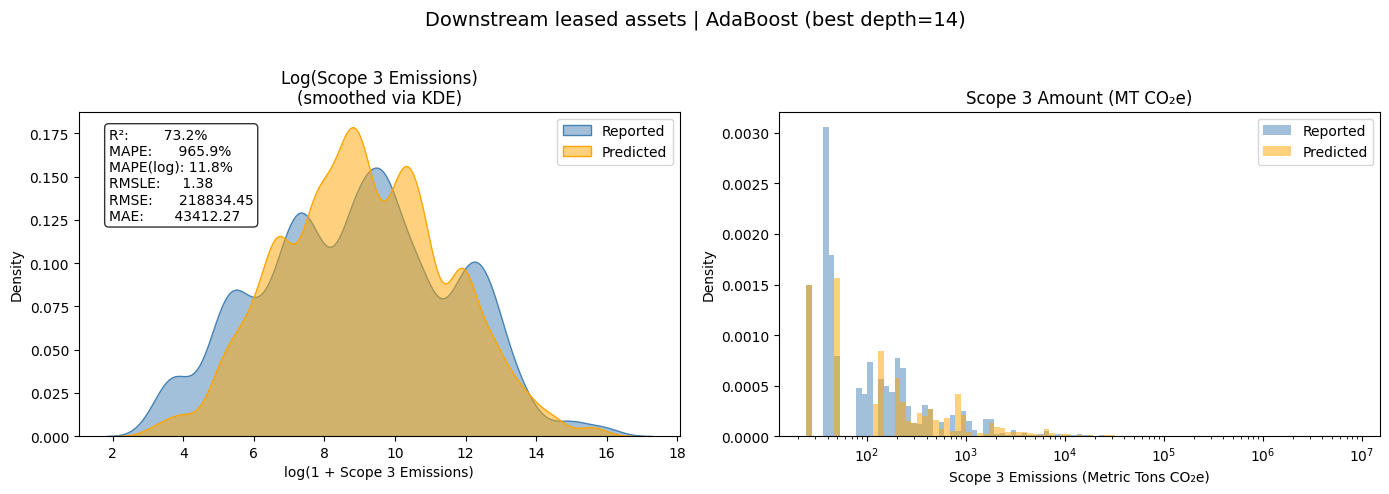


Processing group: Downstream transportation and distribution
 Best max_depth = 14 → R²(log) = 0.7373


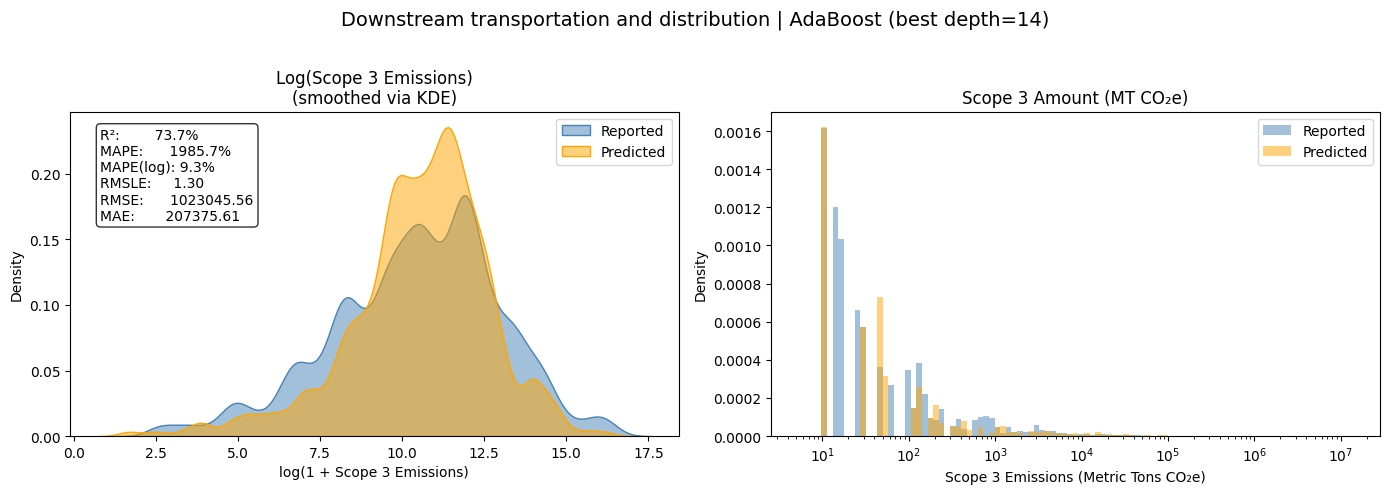


Processing group: Employee commuting
 Best max_depth = 16 → R²(log) = 0.7621


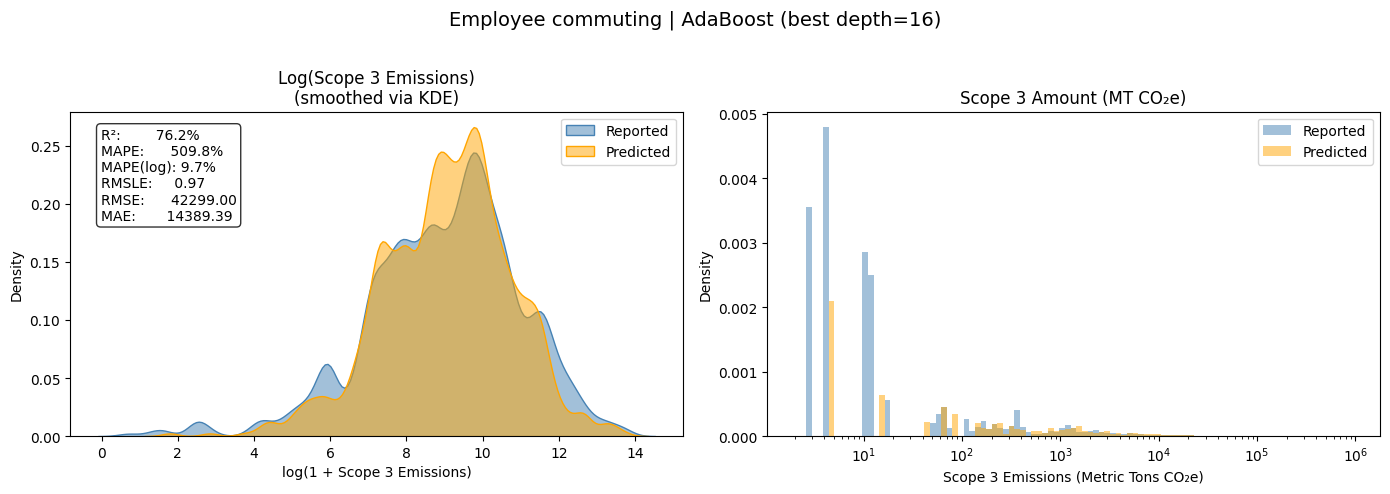


Processing group: End of life treatment of sold products
 Best max_depth = 16 → R²(log) = 0.7892


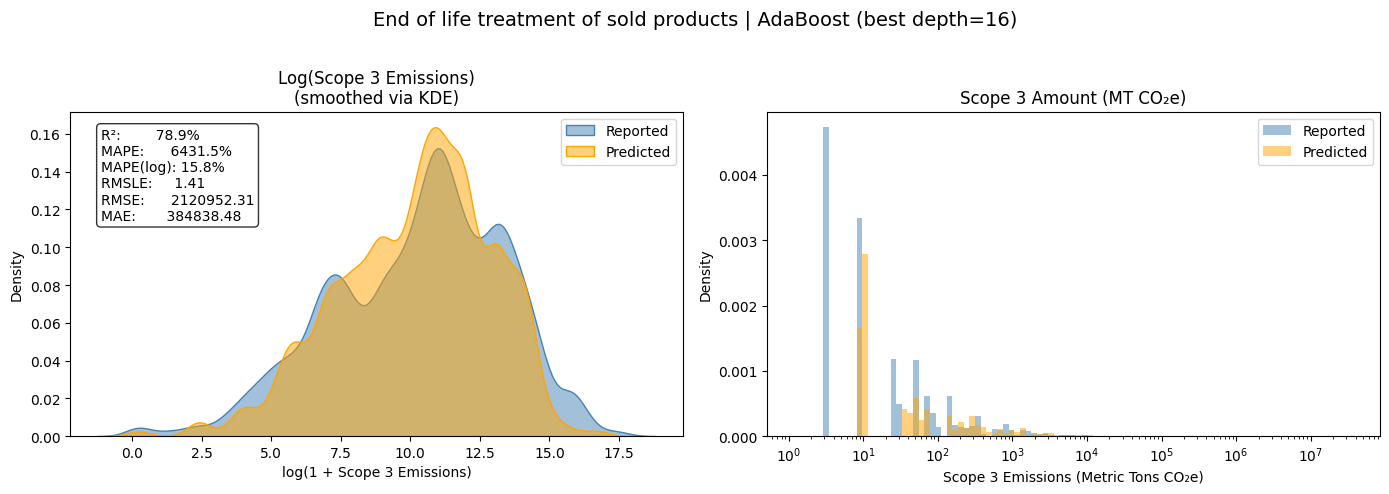


Processing group: Franchises
 Best max_depth = 14 → R²(log) = 0.8839


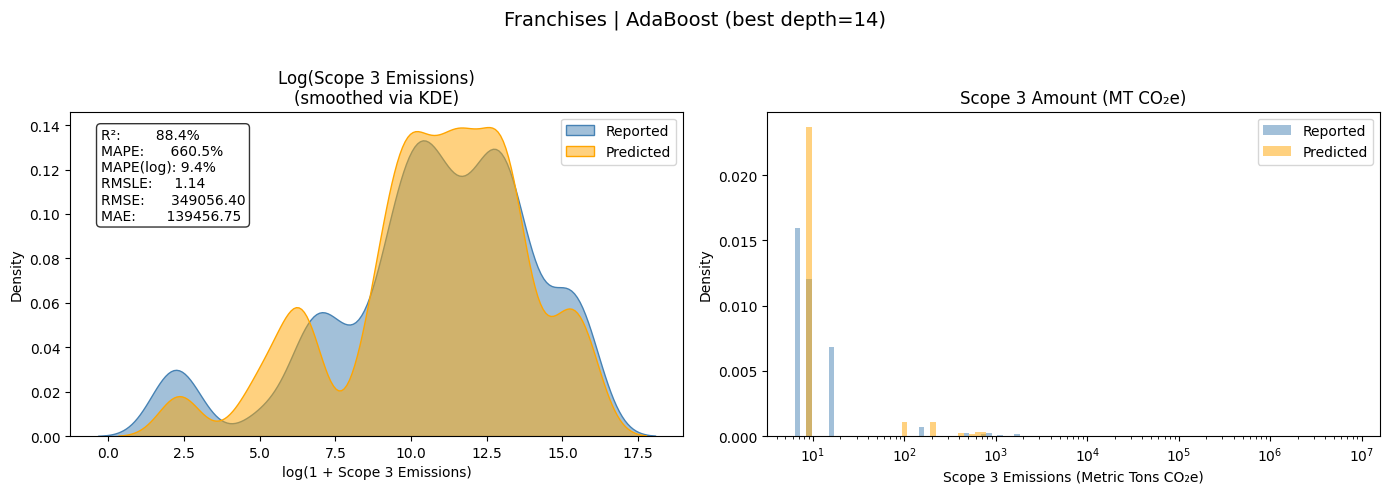


Processing group: Fuel-and-energy-related activities (not included in Scope 1 or 2)
 Best max_depth = 16 → R²(log) = 0.8150


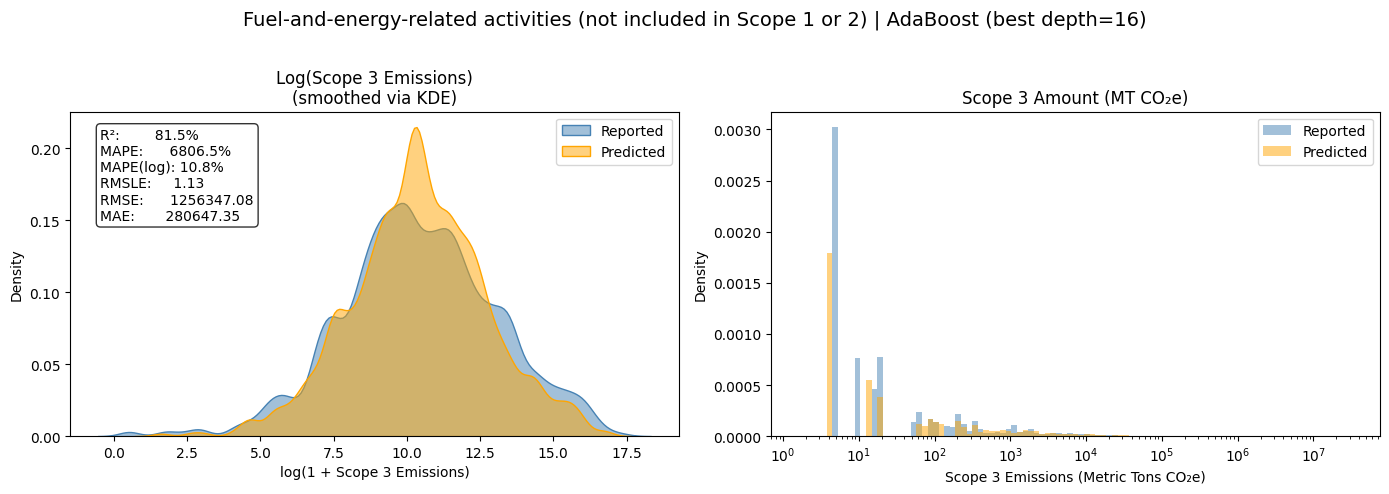


Processing group: Investments
 Best max_depth = 14 → R²(log) = 0.5413


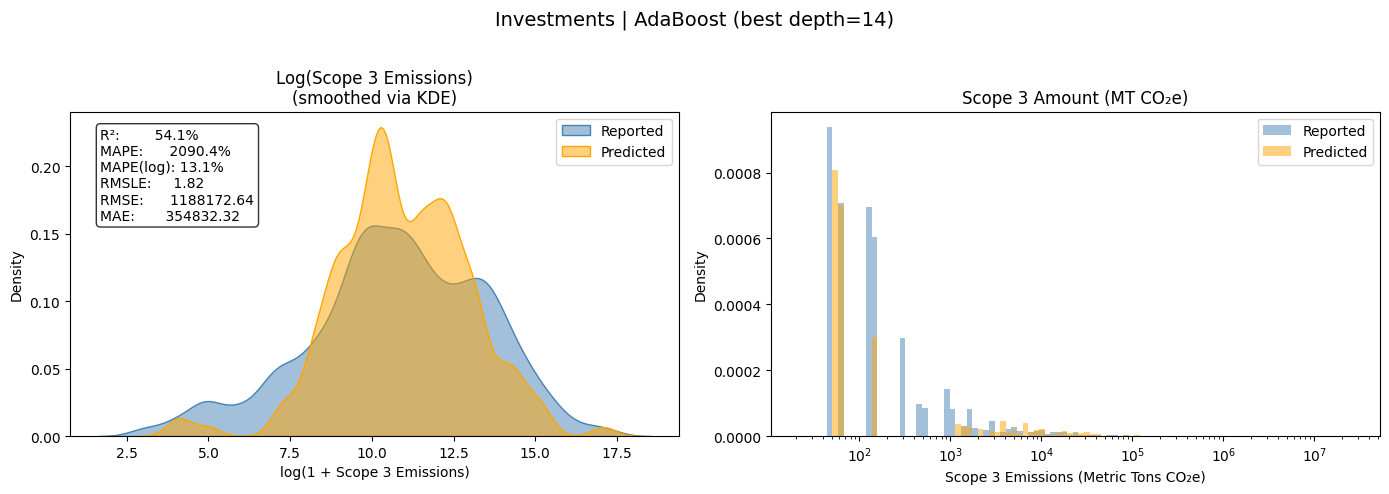


Processing group: Other (downstream)
 Best max_depth = 8 → R²(log) = 0.5270


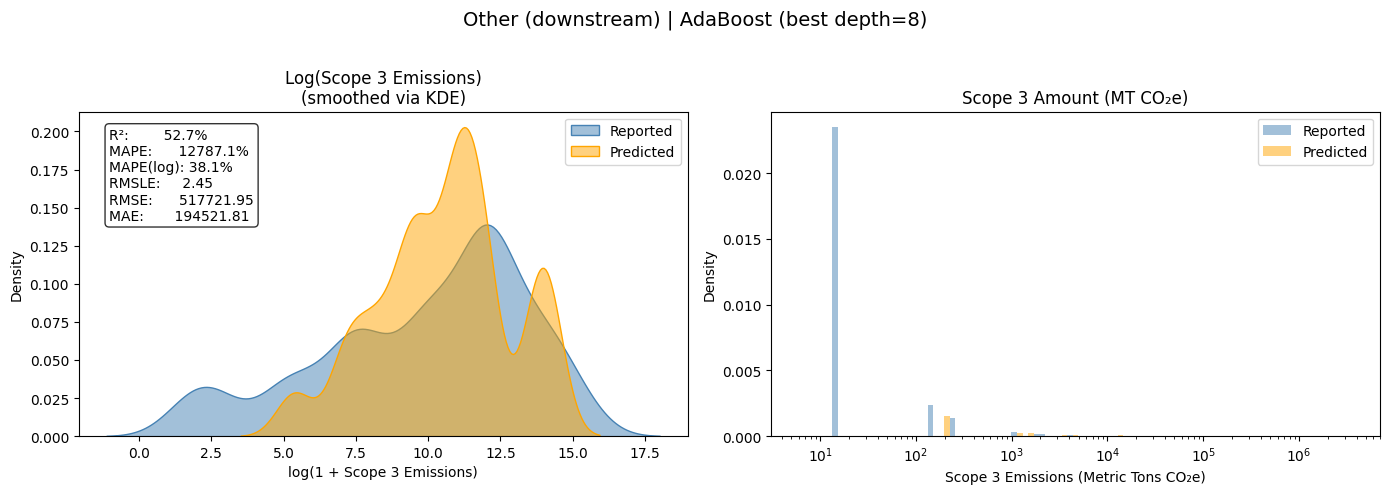


Processing group: Other (upstream)
 Best max_depth = 12 → R²(log) = 0.6398


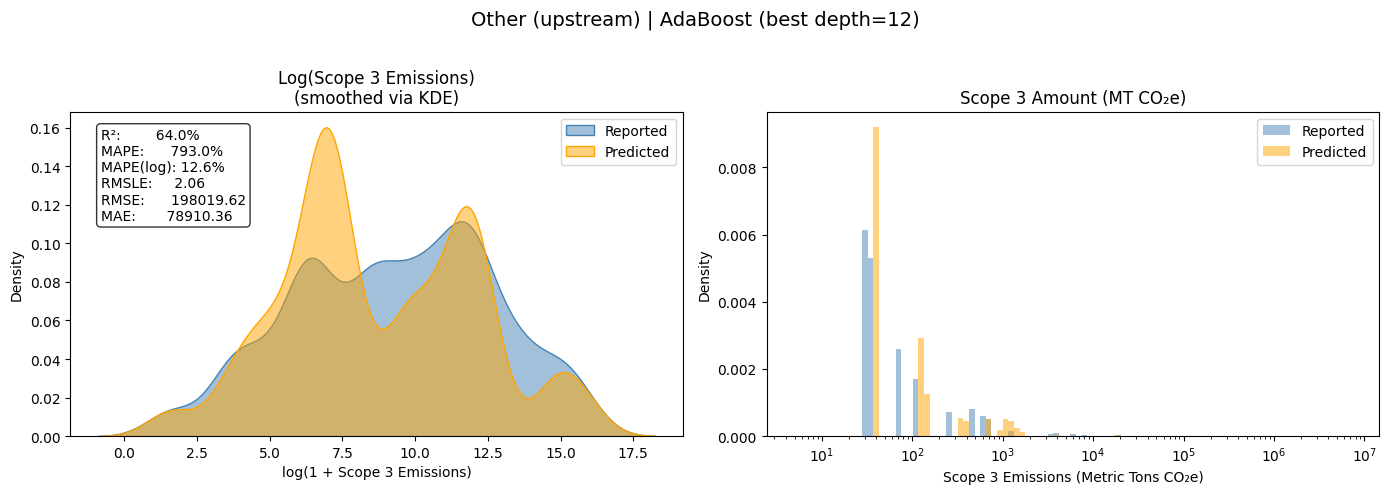


Processing group: Processing of sold products
 Best max_depth = 14 → R²(log) = 0.7225


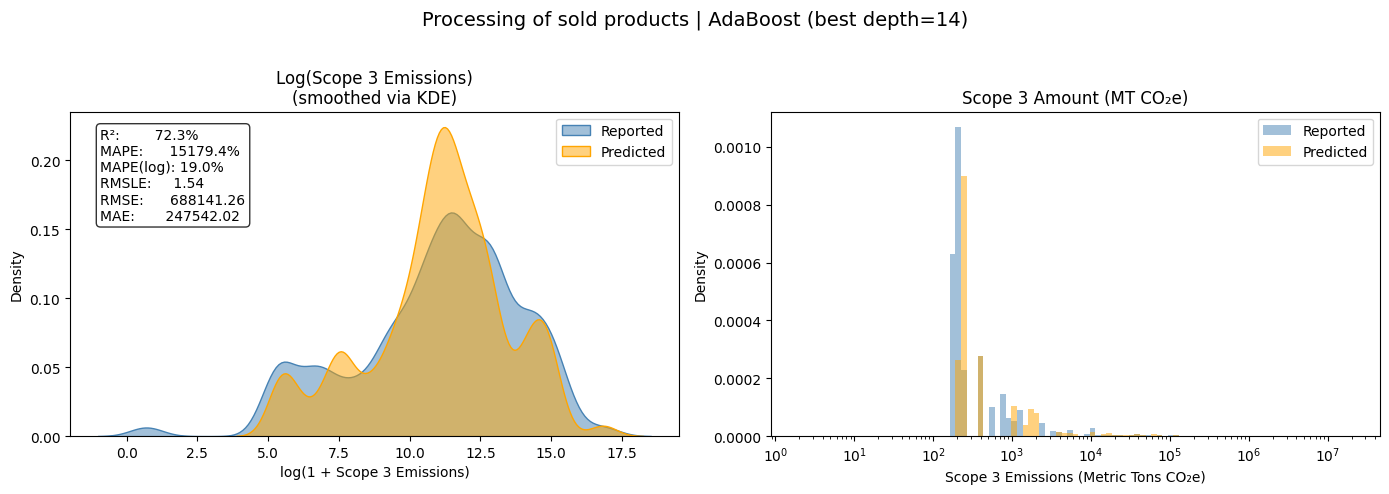


Processing group: Purchased goods and services
 Best max_depth = 16 → R²(log) = 0.8206


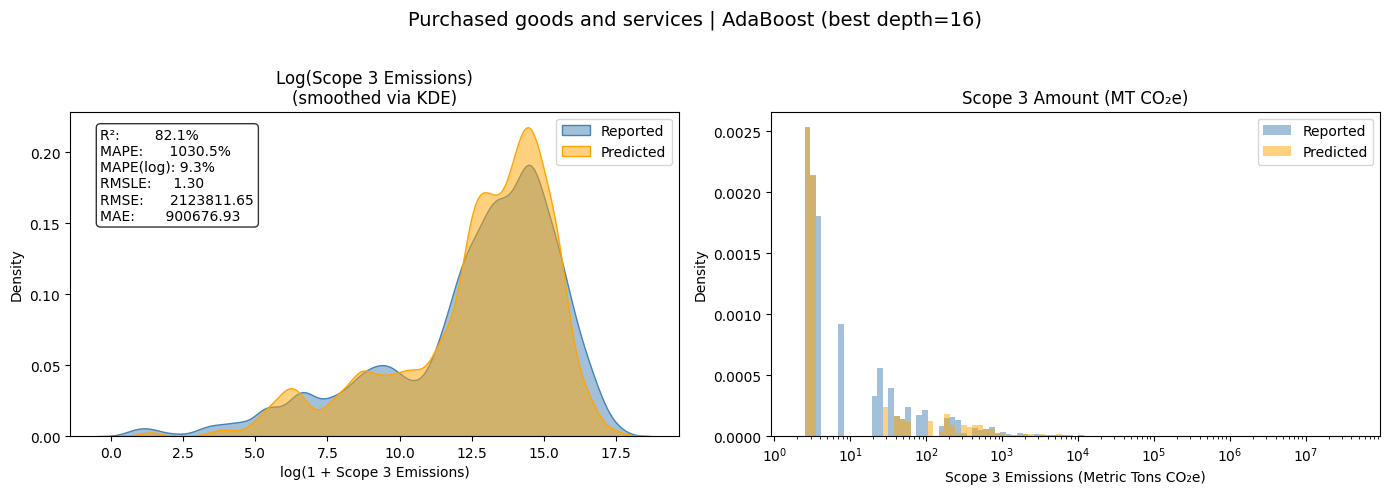


Processing group: Upstream leased assets
 Best max_depth = 16 → R²(log) = 0.7064


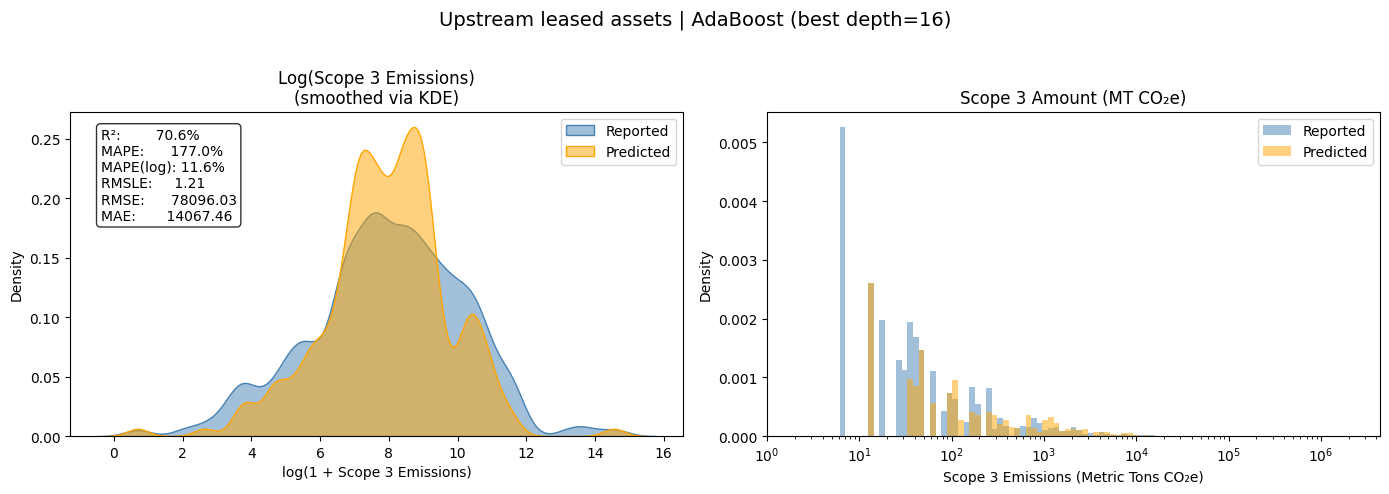


Processing group: Upstream transportation and distribution
 Best max_depth = 16 → R²(log) = 0.7691


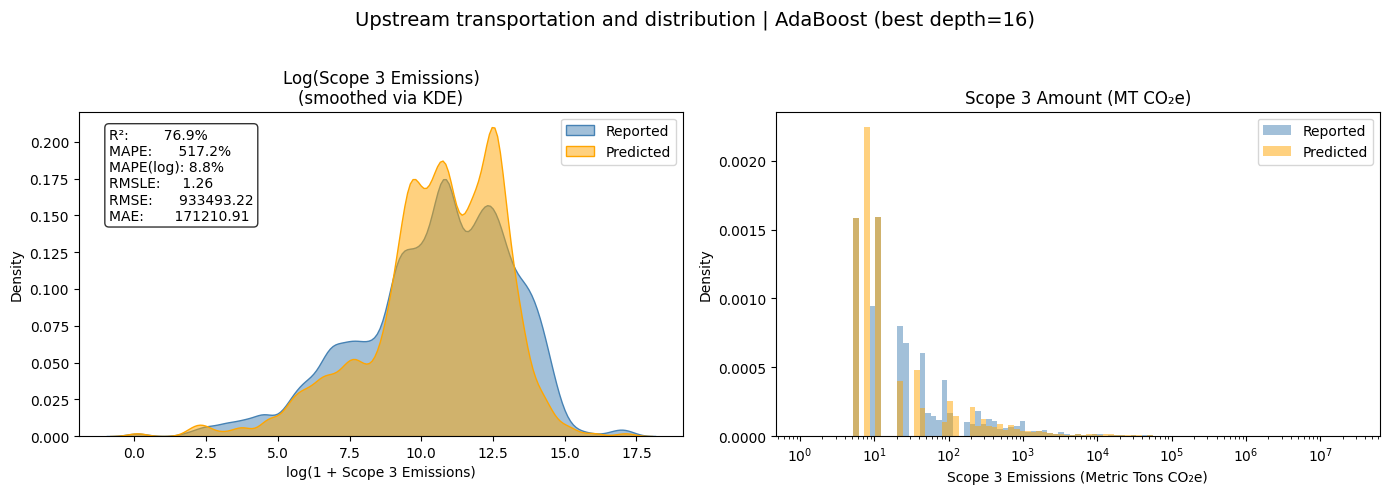


Processing group: Use of sold products
 Best max_depth = 14 → R²(log) = 0.8048


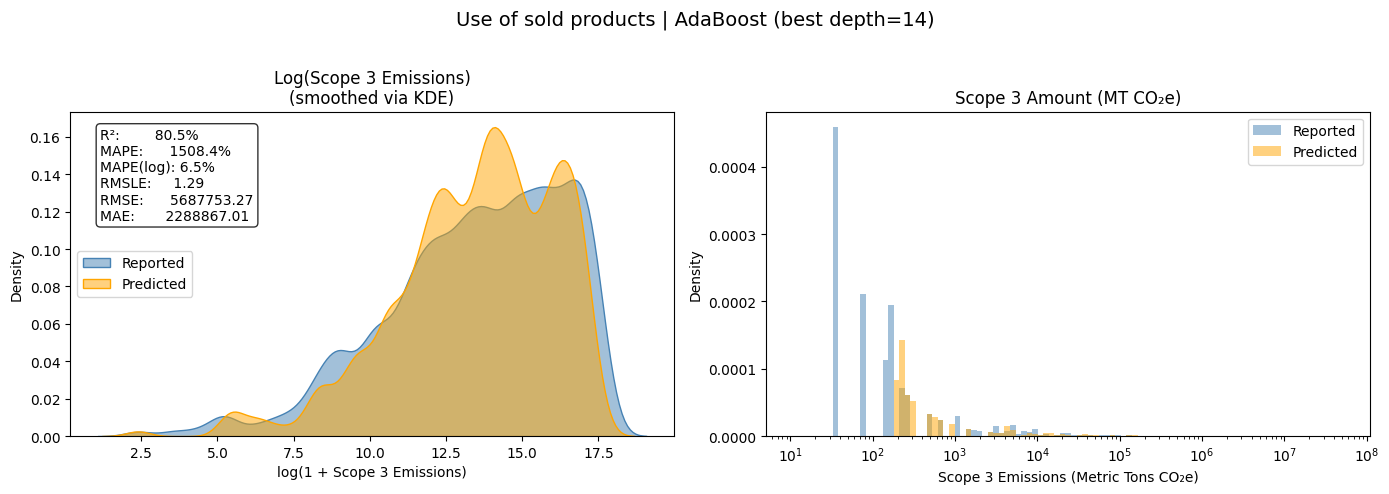


Processing group: Waste generated in operations
 Best max_depth = 16 → R²(log) = 0.7530


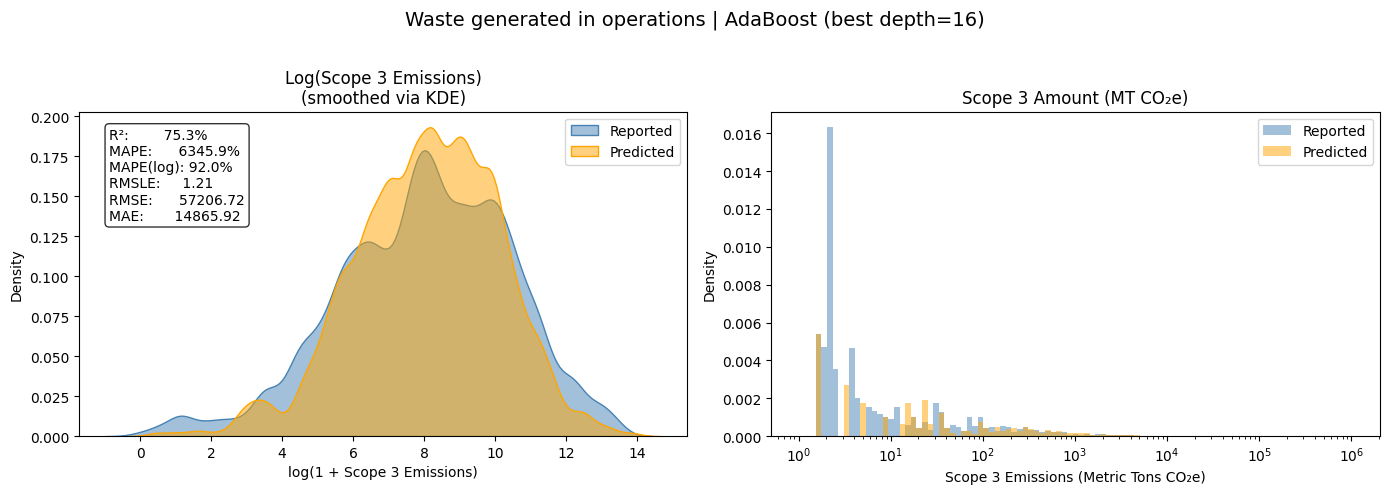

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_log_error,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)-

# ----------------------
# Target Preprocessing
# ----------------------

# Remove rows where Scope 3 Amount is 0 or missing
prepped_df = prepped_df[prepped_df["Scope_3_emissions_amount"] > 0].copy()

# Create log‑transformed target
prepped_df["logged_Scope_3_emissions_amount"] = np.log1p(prepped_df["Scope_3_emissions_amount"])

# Group by Scope 3 Source type
grouped_dfs = {
    name: df.copy()
    for name, df in prepped_df.groupby("Scope_3_emissions_type")
}

# ----------------------
# Define Features and Pipelines
# ----------------------

# if you want to log-transform numeric features, you could use:
def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

numeric_pipeline = Pipeline([
    ("log", FunctionTransformer(signed_log, validate=False)),
    # optionally add a scaler here
])

categorical_cols = [
    "Primary activity",
    "Primary sector",
    "incorporated_country",
    "Third_party_verification"
]

numeric_cols = [
    "Revenue_USD", "Market_Cap_USD", "ebitda_USD",
    "grossProfit_USD", "netIncome_USD", "cashAndCashEquivalents_USD",
    "longTermInvestments_USD", "totalAssets_USD", "totalLiabilities_USD",
    "totalInvestments_USD", "totalDebt_USD", "totalEquity_USD",
    "shortTermInvestments_USD",
    "country_ghg_avg", "country_population_avg", "country_gdp_avg"
]

target_col = "logged_Scope_3_emissions_amount"

# ----------------------
# Iterate over each group
# ----------------------
group_results = {}

for group_name, group_df in grouped_dfs.items():
    print(f"\nProcessing group: {group_name}")

    # select only the needed columns & drop missing
    cols = categorical_cols + numeric_cols + [target_col]
    df_clean = group_df[cols].dropna()
    if df_clean.shape[0] < 20:
        print(f" Skipping (only {df_clean.shape[0]} rows)")
        continue

    # train/test split
    X = df_clean[categorical_cols + numeric_cols]
    y = df_clean[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # build preprocessing inside loop (you could lift this out)
    preprocessor = ColumnTransformer([
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_cols),
        ("num", "passthrough", numeric_cols),  # or numeric_pipeline if you want feature‐logs
    ])

    # grid‐search over tree depth
    best_r2 = -np.inf
    best_model = None
    best_pred = None
    best_depth = None

    for depth in [2,4,6,8,10,12,14,16]:
        base = DecisionTreeRegressor(max_depth=depth, random_state=42)
        pipe = Pipeline([
            ("preproc", preprocessor),
            ("model", AdaBoostRegressor(estimator=base, n_estimators=100, random_state=42))
        ])
        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)
        r2 = r2_score(y_test, preds)
        if r2 > best_r2:
            best_r2, best_model, best_pred, best_depth = r2, pipe, preds, depth

    print(f" Best max_depth = {best_depth} → R²(log) = {best_r2:.4f}")

    # ── METRICS ───────────────────────────────────────────────────────────
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(best_pred)
    
    r2_pct     = best_r2 * 100                                   # %
    mape_log   = np.mean(np.abs((y_test - best_pred) / y_test)) * 100
    mape_orig  = np.mean(np.abs((y_test_exp - y_pred_exp) / y_test_exp)) * 100
    rmsle      = np.sqrt(mean_squared_log_error(y_test_exp, y_pred_exp))
    rmse_orig  = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
    mae_orig   = mean_absolute_error(y_test_exp, y_pred_exp)
    
    metrics_txt = (
        f"R²:        {r2_pct:.1f}%\n"
        f"MAPE:      {mape_orig:.1f}%\n"
        f"MAPE(log): {mape_log:.1f}%\n"
        f"RMSLE:     {rmsle:.2f}\n"
        f"RMSE:      {rmse_orig:.2f}\n"
        f"MAE:       {mae_orig:.2f}"
    )



    # store for summary
    group_results[group_name] = {
        "R²(log)%":   f"{r2_pct:.1f}",
        "MAPE_orig%": f"{mape_orig:.1f}",
        "MAPE_log%":  f"{mape_log:.1f}",
        "RMSLE":      f"{rmsle:.2f}",
        "RMSE_orig":  f"{rmse_orig:.2f}",
        "MAE_orig":   f"{mae_orig:.2f}",
    }


    # ----------------------
    # Plotting distributions
    # ----------------------
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # A) log‑space KDE with metrics
    sns.kdeplot(
        y_test, fill=True, bw_adjust=0.5,
        color="steelblue", alpha=0.5,
        label="Reported", ax=axes[0]
    )
    sns.kdeplot(
        best_pred, fill=True, bw_adjust=0.5,
        color="orange", alpha=0.5,
        label="Predicted", ax=axes[0]
    )
    axes[0].set_title("Log(Scope 3 Emissions)\n(smoothed via KDE)")
    axes[0].set_xlabel("log(1 + Scope 3 Emissions)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    # annotate metrics
    axes[0].text(
        0.05, 0.95, metrics_txt,
        transform=axes[0].transAxes,
        va="top",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
    )

    # B) real‑world histogram on log‑x
    minv = min(y_test_exp.min(), y_pred_exp.min())
    maxv = max(y_test_exp.max(), y_pred_exp.max())
    bins = np.logspace(np.log10(minv+1), np.log10(maxv+1), 100)
    sns.histplot(
        y_test_exp, bins=bins, stat="density",
        color="steelblue", alpha=0.5, label="Reported",
        ax=axes[1]
    )
    sns.histplot(
        y_pred_exp, bins=bins, stat="density",
        color="orange", alpha=0.5, label="Predicted",
        ax=axes[1]
    )
    axes[1].set_xscale("log")
    axes[1].set_title("Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.suptitle(f"{group_name} | AdaBoost (best depth={best_depth})", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# ----------------------
# Summary of all groups
# ----------------------
summary_cols = ["R²(log)%","MAPE_orig%","MAPE_log%","RMSLE","RMSE_orig","MAE_orig"]
metrics_df = pd.DataFrame(group_results).T[summary_cols]
metrics_df.to_csv(
    r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Adaboost_GHG.csv"
)



# Streamlined AdaBoost Model

This version of the Scope 3 emissions modeling pipeline refines the previously enhanced AdaBoost implementation by focusing on cleanup, consolidation, and usability improvements. Most of the core structure—groupwise modeling, depth tuning, and evaluation—remains consistent.


Processing group: Business travel
Best max_depth for Business travel: 12 (R² = 0.6219)


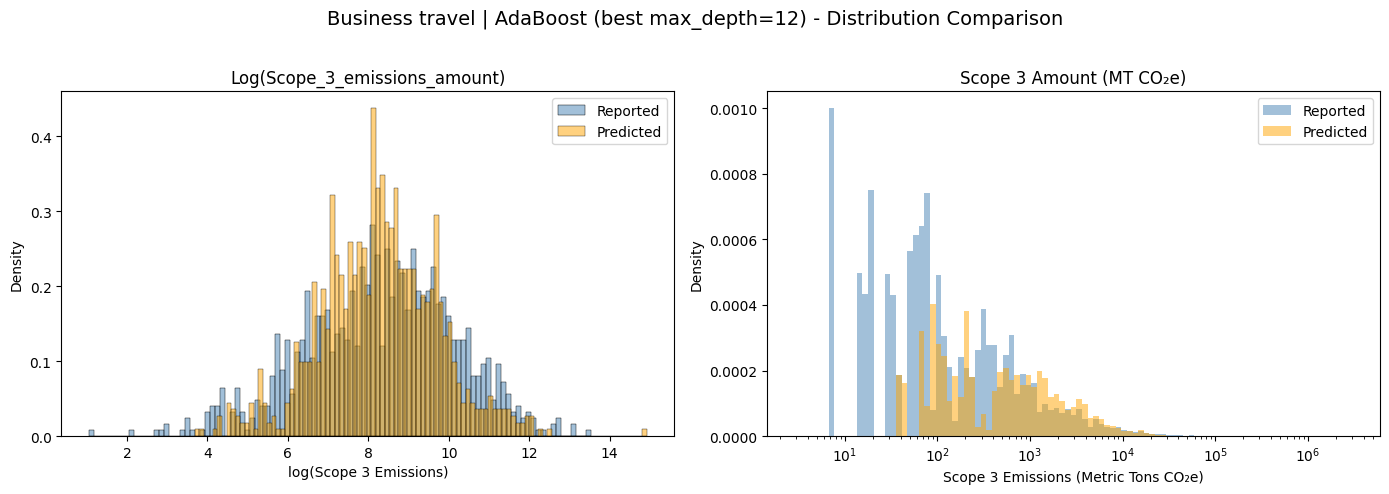

Business travel - RMSLE: 1.1594, R²: 0.6219
Processing group: Capital goods
Best max_depth for Capital goods: 14 (R² = 0.6355)


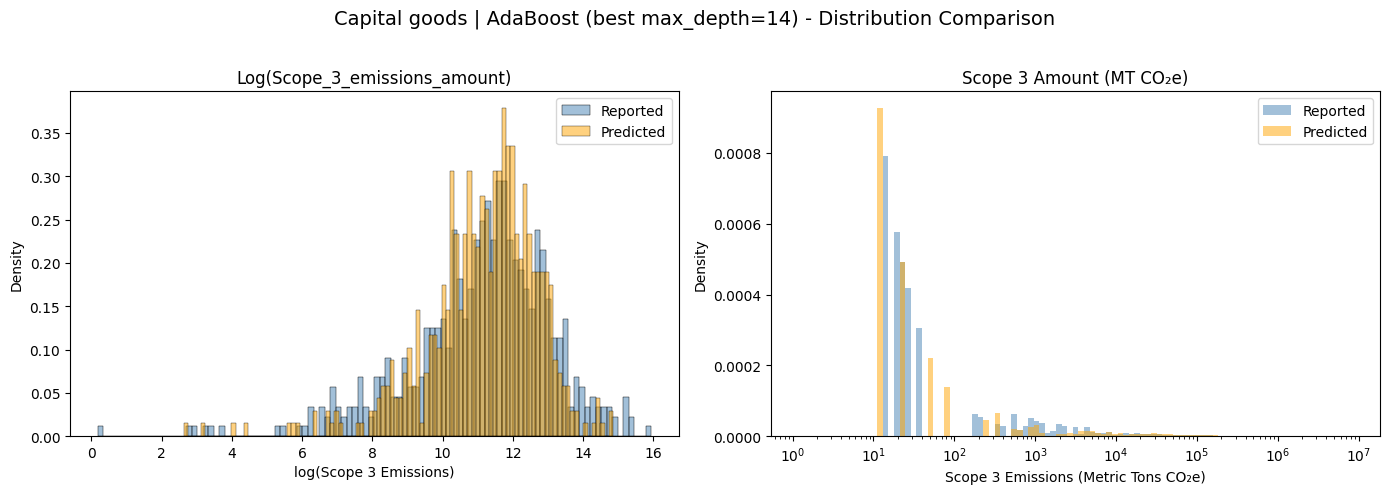

Capital goods - RMSLE: 1.2446, R²: 0.6355
Processing group: Downstream leased assets
Best max_depth for Downstream leased assets: 14 (R² = 0.7197)


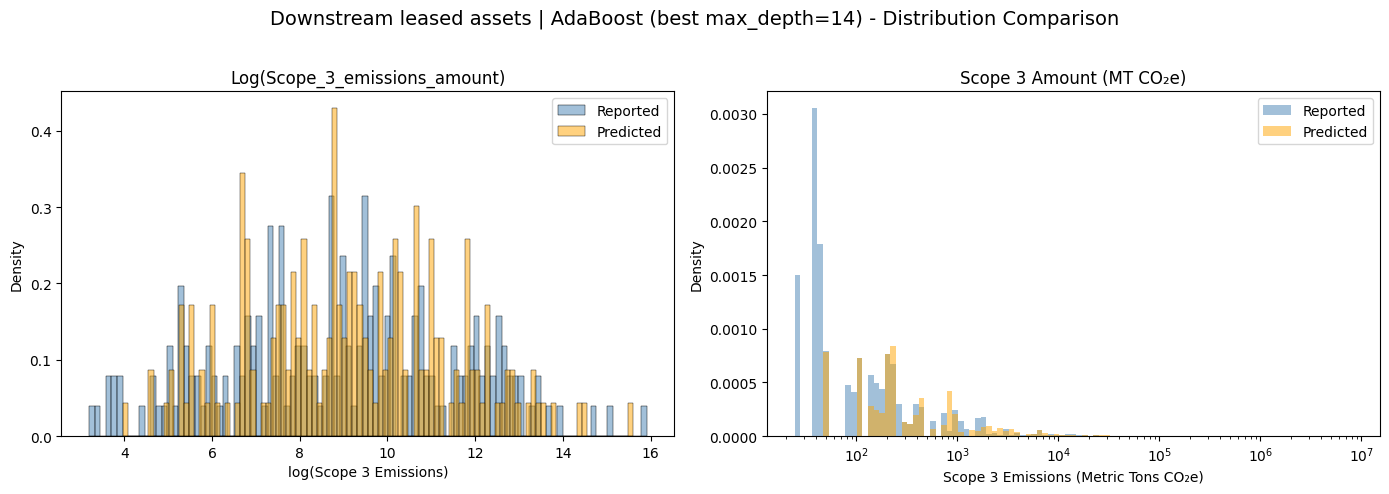

Downstream leased assets - RMSLE: 1.4097, R²: 0.7197
Processing group: Downstream transportation and distribution
Best max_depth for Downstream transportation and distribution: 12 (R² = 0.7356)


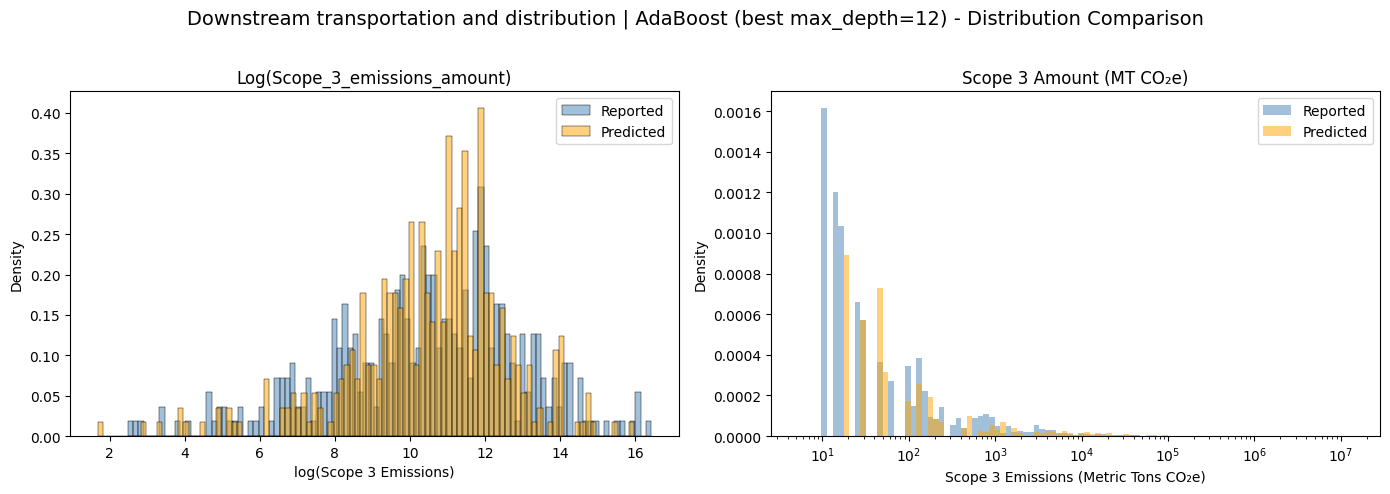

Downstream transportation and distribution - RMSLE: 1.3087, R²: 0.7356
Processing group: Employee commuting
Best max_depth for Employee commuting: 16 (R² = 0.7727)


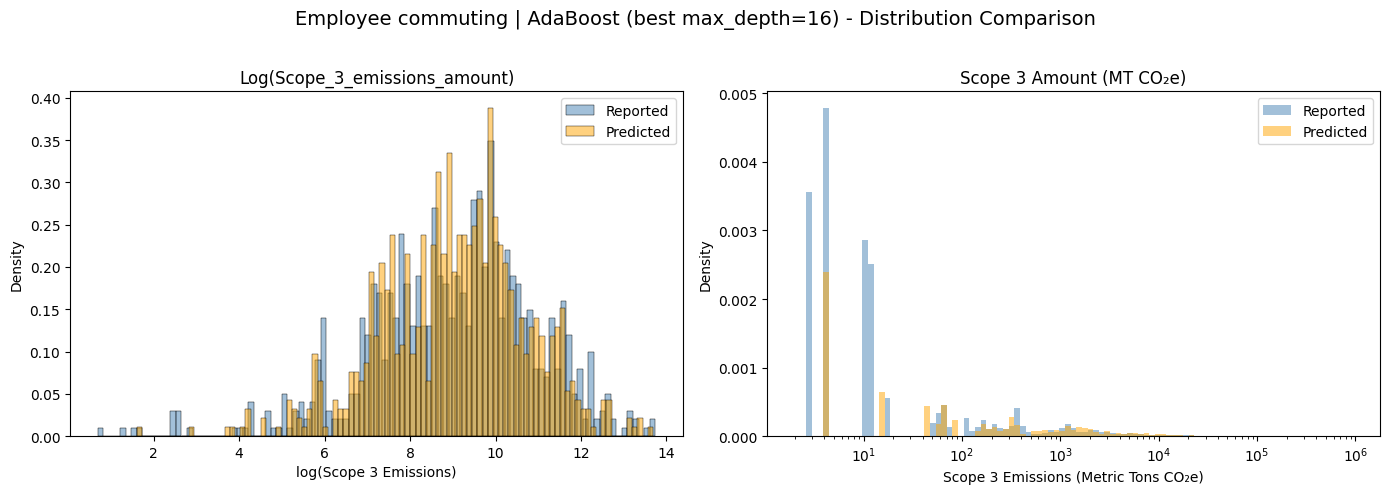

Employee commuting - RMSLE: 0.9496, R²: 0.7727
Processing group: End of life treatment of sold products
Best max_depth for End of life treatment of sold products: 14 (R² = 0.7884)


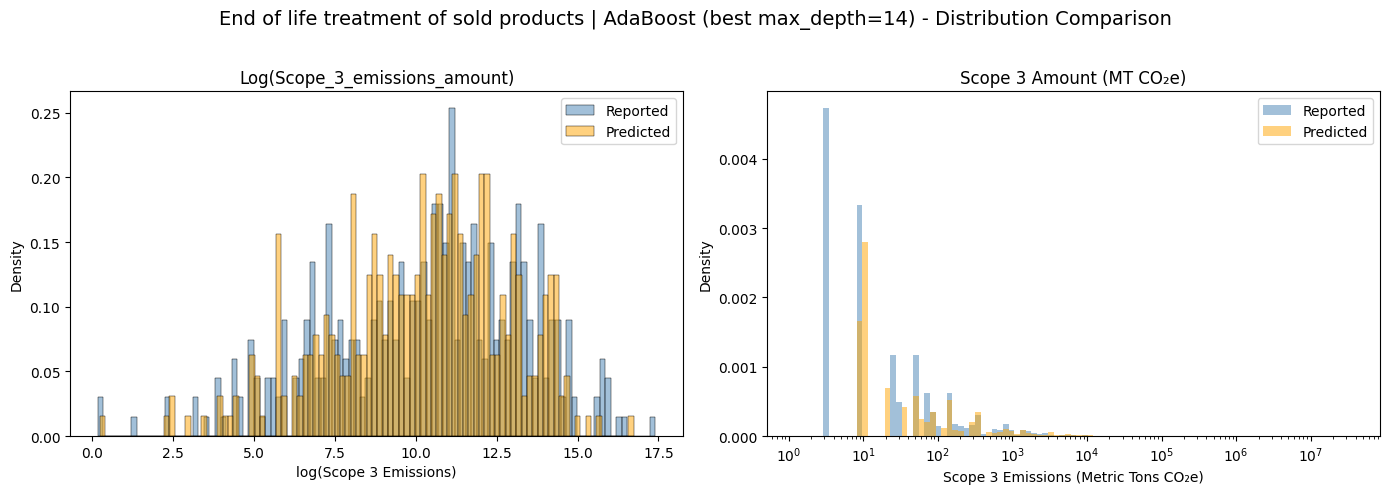

End of life treatment of sold products - RMSLE: 1.4177, R²: 0.7884
Processing group: Franchises
Best max_depth for Franchises: 8 (R² = 0.8703)


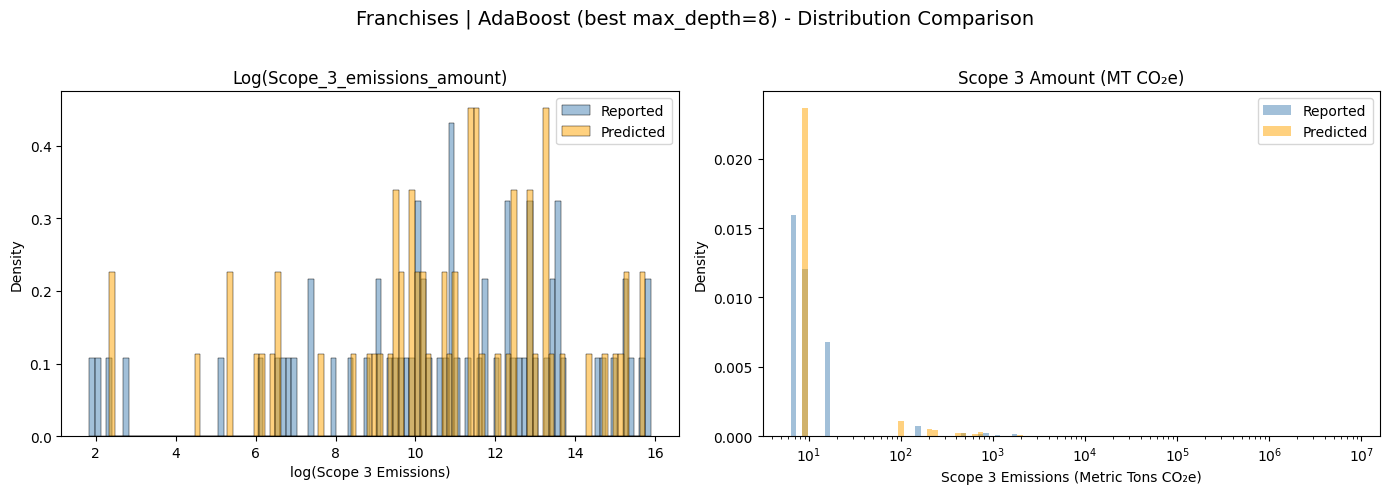

Franchises - RMSLE: 1.2044, R²: 0.8703
Processing group: Fuel-and-energy-related activities (not included in Scope 1 or 2)
Best max_depth for Fuel-and-energy-related activities (not included in Scope 1 or 2): 16 (R² = 0.8038)


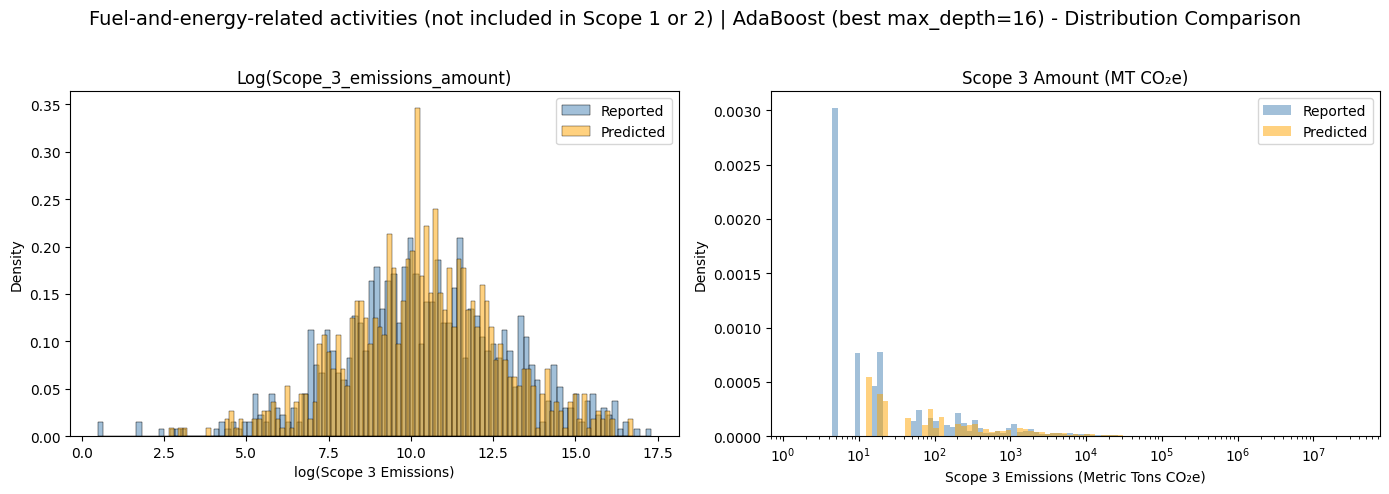

Fuel-and-energy-related activities (not included in Scope 1 or 2) - RMSLE: 1.1684, R²: 0.8038
Processing group: Investments
Best max_depth for Investments: 12 (R² = 0.5508)


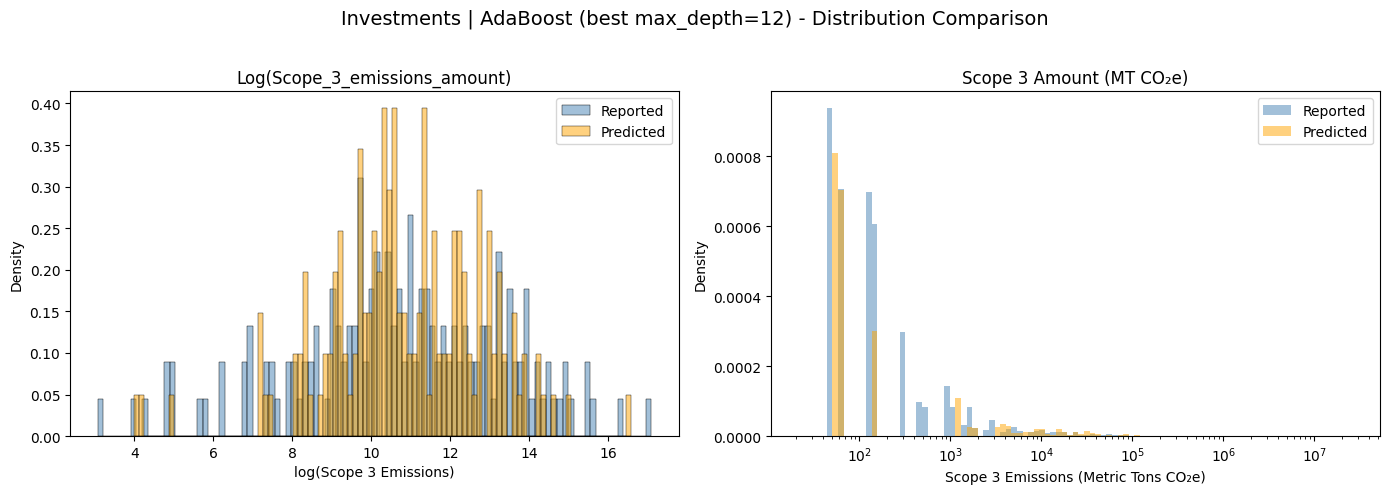

Investments - RMSLE: 1.7982, R²: 0.5508
Processing group: Other (downstream)
Best max_depth for Other (downstream): 6 (R² = 0.5601)


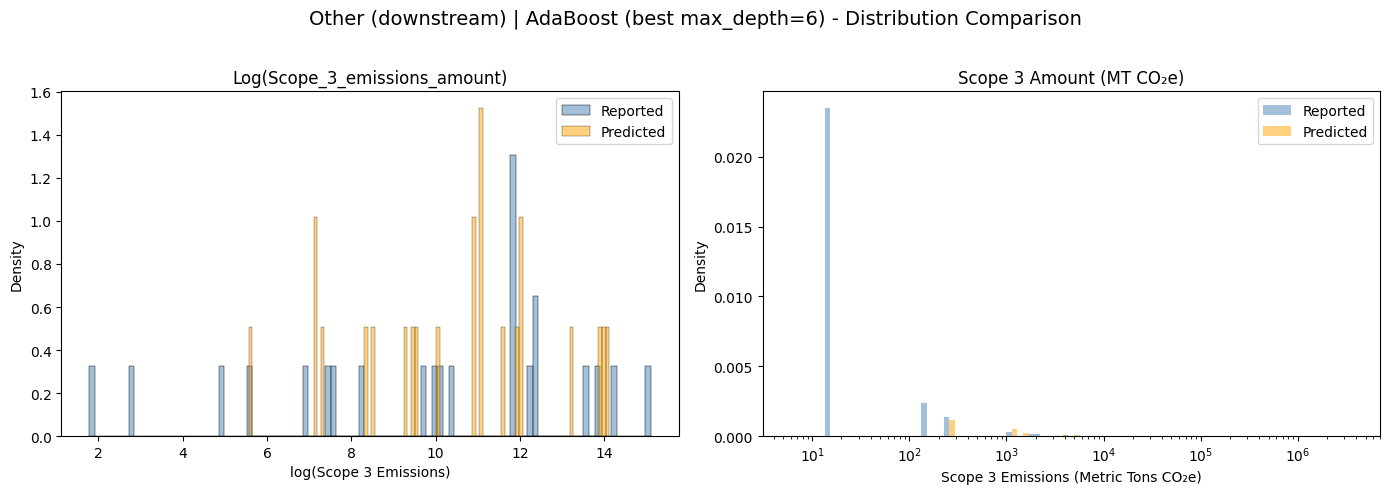

Other (downstream) - RMSLE: 2.3625, R²: 0.5601
Processing group: Other (upstream)
Best max_depth for Other (upstream): 14 (R² = 0.5795)


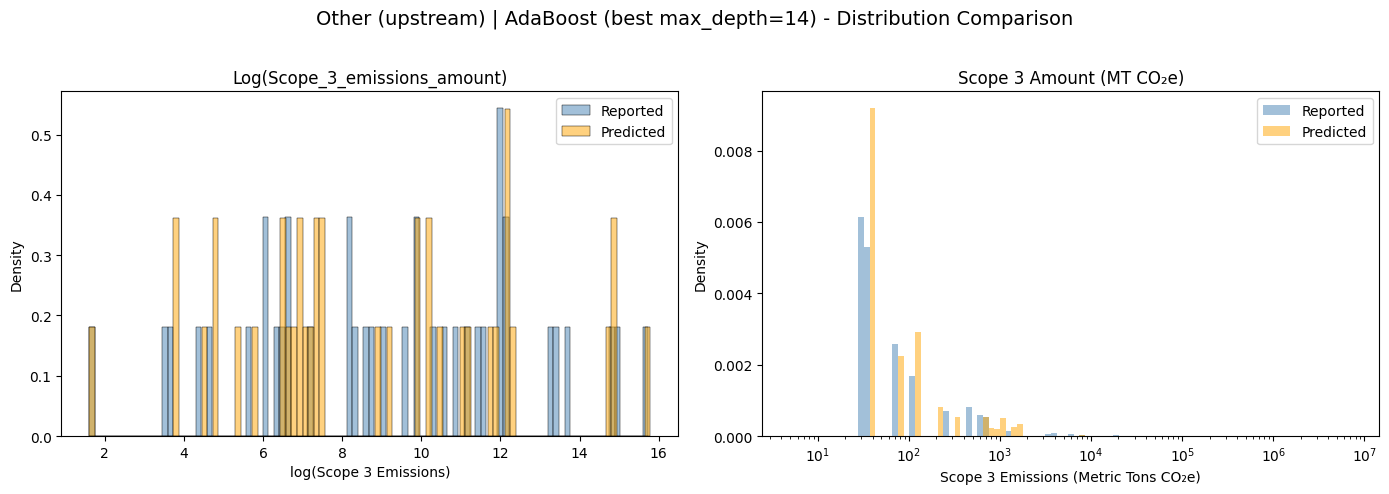

Other (upstream) - RMSLE: 2.2272, R²: 0.5795
Processing group: Processing of sold products
Best max_depth for Processing of sold products: 14 (R² = 0.7232)


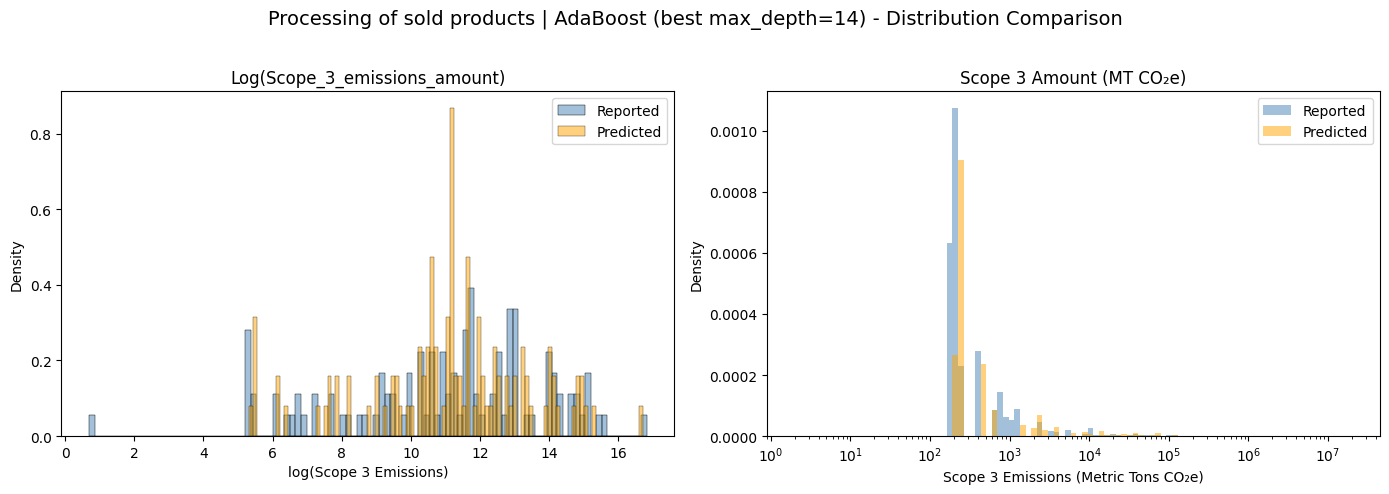

Processing of sold products - RMSLE: 1.5392, R²: 0.7232
Processing group: Purchased goods and services
Best max_depth for Purchased goods and services: 16 (R² = 0.8224)


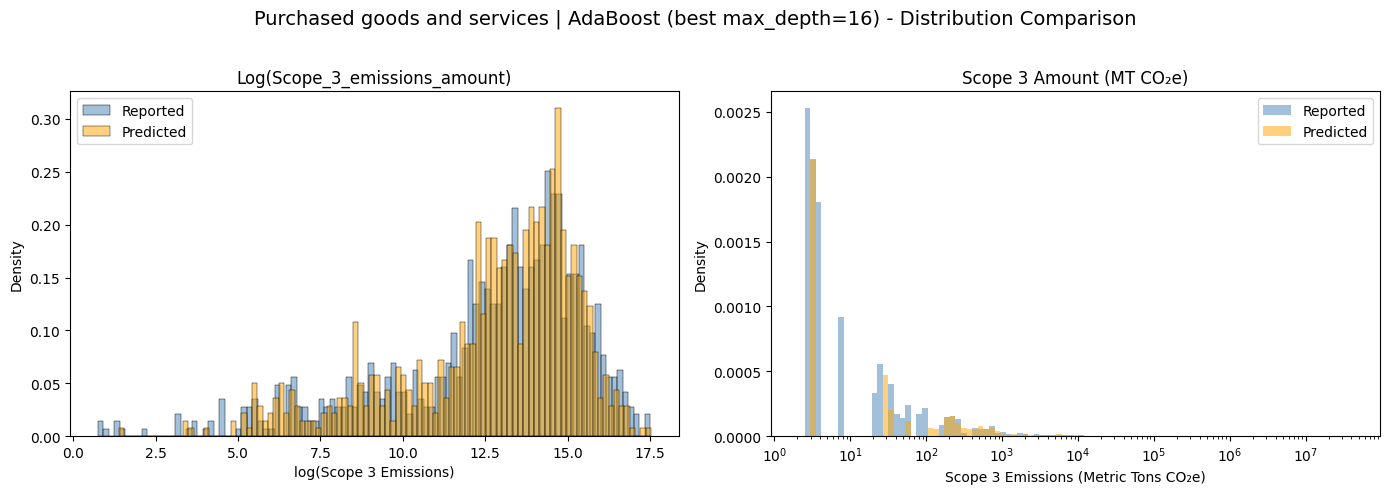

Purchased goods and services - RMSLE: 1.2985, R²: 0.8224
Processing group: Upstream leased assets
Best max_depth for Upstream leased assets: 14 (R² = 0.7220)


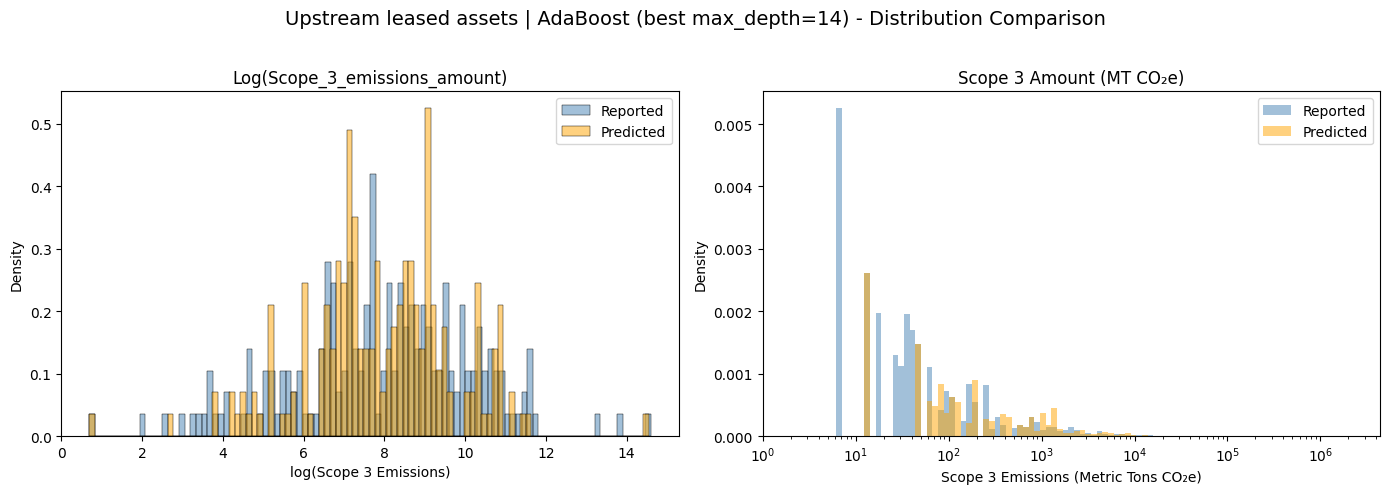

Upstream leased assets - RMSLE: 1.1784, R²: 0.7220
Processing group: Upstream transportation and distribution
Best max_depth for Upstream transportation and distribution: 14 (R² = 0.7771)


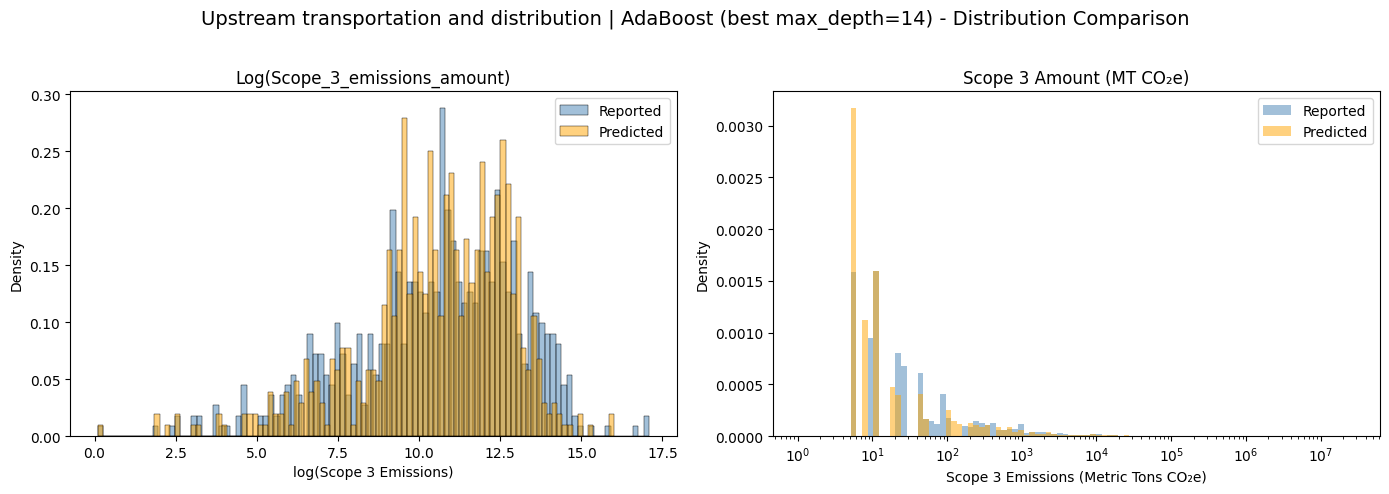

Upstream transportation and distribution - RMSLE: 1.2372, R²: 0.7771
Processing group: Use of sold products
Best max_depth for Use of sold products: 16 (R² = 0.7954)


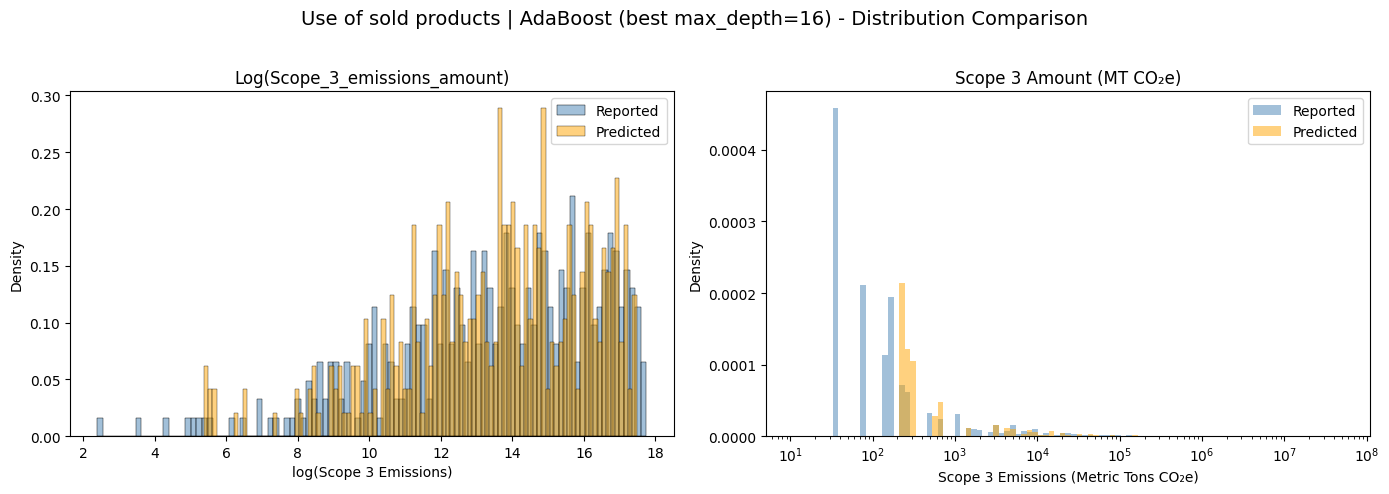

Use of sold products - RMSLE: 1.3249, R²: 0.7954
Processing group: Waste generated in operations
Best max_depth for Waste generated in operations: 16 (R² = 0.7476)


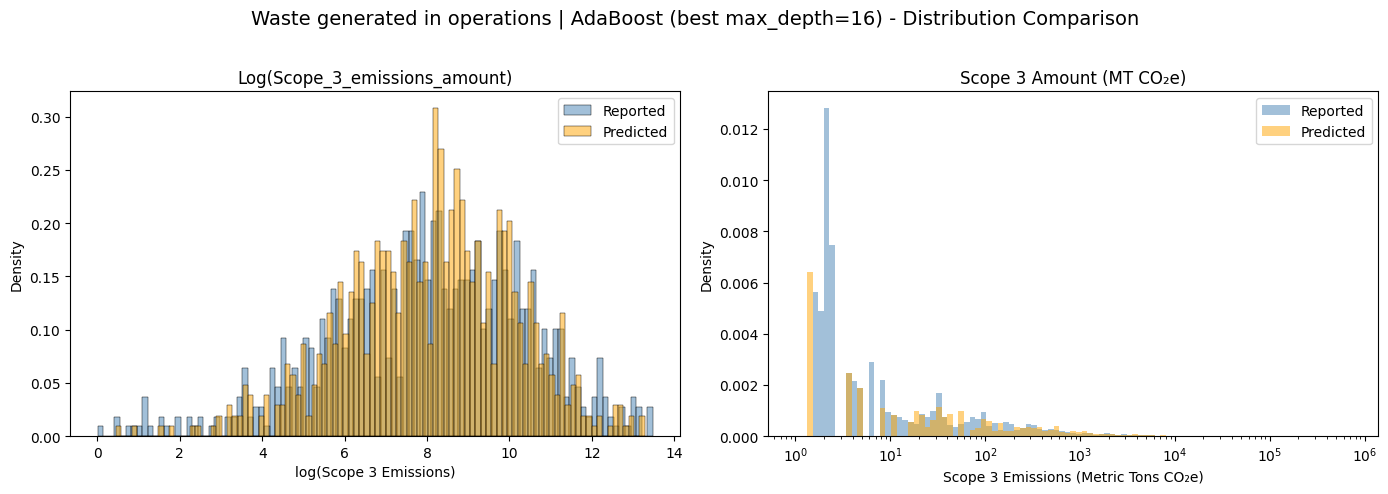

Waste generated in operations - RMSLE: 1.2241, R²: 0.7476

Summary of model performance across groups:
                                                                      rmsle  \
Employee commuting                                                 0.949608   
Business travel                                                    1.159436   
Fuel-and-energy-related activities (not included in Scope 1 or 2)  1.168400   
Upstream leased assets                                             1.178449   
Franchises                                                         1.204435   
Waste generated in operations                                      1.224096   
Upstream transportation and distribution                           1.237202   
Capital goods                                                      1.244602   
Purchased goods and services                                       1.298501   
Downstream transportation and distribution                         1.308704   
Use of sold products        

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_log_error,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# ----------------------
# Target Preprocessing
# ----------------------
# Remove rows where Scope_3_emissions_amount is 0 or missing
prepped_df = prepped_df[prepped_df["Scope_3_emissions_amount"] > 0].copy()

# Create log-transformed target (this remains unmodified later)
prepped_df["logged_Scope_3_emissions_amount"] = np.log1p(prepped_df["Scope_3_emissions_amount"])

# Group by Scope_3_emissions_type
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby("Scope_3_emissions_type")
}

# ----------------------
# Define Features and Target
# ----------------------
categorical_cols = [
    "Primary activity", "Primary sector",
    "incorporated_country", 
    "Third_party_verification"
]

numeric_cols = [
    "Revenue_USD", 
    "Market_Cap_USD", "ebitda_USD",
    "grossProfit_USD", "netIncome_USD",
    "cashAndCashEquivalents_USD", "longTermInvestments_USD",
    "totalAssets_USD", "totalLiabilities_USD",
    "totalInvestments_USD", "totalDebt_USD",
    "totalEquity_USD", "shortTermInvestments_USD",
    "country_ghg_avg", "country_population_avg", "country_gdp_avg"
]

target_col = "logged_Scope_3_emissions_amount"

# ----------------------
# Define a symmetric log transformer for numeric features
# ----------------------
def symmetric_log_transform(x):
    # Apply symmetric log transformation: sign(x)*log1p(|x|)
    return np.sign(x) * np.log1p(np.abs(x))

log_transformer = FunctionTransformer(symmetric_log_transform, validate=False)

# Build the numeric pipeline: log-transform then scale
numeric_pipeline = Pipeline(steps=[
    ('log_transform', log_transformer),
    ('scaler', StandardScaler())
])

# ----------------------
# Preprocessing pipeline
# ----------------------
preprocessor = ColumnTransformer(transformers=[
    ("cat", Pipeline([("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))]), categorical_cols),
    ("num", numeric_pipeline, numeric_cols)
])

# ----------------------
# Results storage
# ----------------------
group_results = {}

# ----------------------
# Loop through Groups
# ----------------------
for group_name, group_df in grouped_dfs.items():
    print(f"Processing group: {group_name}")

    required_cols = categorical_cols + numeric_cols + [target_col]
    df_clean = group_df[required_cols].dropna()

    if df_clean.shape[0] < 20:
        print(f"Skipping '{group_name}' (not enough data: {df_clean.shape[0]} rows)")
        continue

    # Split features and target; note: the target stays as is.
    X = df_clean[categorical_cols + numeric_cols].copy()
    y = df_clean[target_col].copy()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # ----------------------
    # Grid Search for Best max_depth
    # ----------------------
    depth_options = [2, 4, 6, 8, 10, 12, 14, 16]
    best_r2 = -np.inf
    best_model = None
    best_y_pred = None
    best_depth = None

    for depth in depth_options:
        base_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)

        model_pipeline = Pipeline(steps=[
            ("preprocessing", preprocessor),
            ("model", AdaBoostRegressor(estimator=base_tree, n_estimators=100, random_state=42))
        ])

        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        if r2 > best_r2:
            best_r2 = r2
            best_depth = depth
            best_model = model_pipeline
            best_y_pred = y_pred

    print(f"Best max_depth for {group_name}: {best_depth} (R² = {best_r2:.4f})")

    # Use the best model for prediction
    y_pred = best_y_pred
    model_pipeline = best_model

    # ----------------------
    # Metrics
    # ----------------------
    # Calculate RMSLE by applying expm1 to revert our log1p transformation on the target
    rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred)))

    # ----------------------
    # Dual Histogram Plots
    # ----------------------
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    bins = 100

    # Plot A: Log space
    sns.histplot(y_test, bins=bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[0])
    sns.histplot(y_pred, bins=bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[0])
    axes[0].set_title("Log(Scope_3_emissions_amount)")
    axes[0].set_xlabel("log(Scope 3 Emissions)")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    # Plot B: Real-world space (inverse transformation)
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(y_pred)
    min_val = min(y_test_exp.min(), y_pred_exp.min())
    max_val = max(y_test_exp.max(), y_pred_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

    sns.histplot(y_test_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])
    axes[1].set_xscale("log")
    axes[1].set_title("Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.suptitle(f"{group_name} | AdaBoost (best max_depth={best_depth}) - Distribution Comparison", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Store results
    group_results[group_name] = {
        "rmsle": rmsle,
        "r2_score": best_r2,
        "best_depth": best_depth,
        "n_train": X_train.shape[0],
        "n_test": X_test.shape[0]
    }

    print(f"{group_name} - RMSLE: {rmsle:.4f}, R²: {best_r2:.4f}")

# ----------------------
# Summary Table
# ----------------------
results_df = pd.DataFrame(group_results).T.sort_values("rmsle")
print("\nSummary of model performance across groups:")
print(results_df)


# save metrics to external file

These were the metrics reported for this dataset and modeling approach in the final presentation.

In [90]:
group_results_Final_GHG = group_results

import json

# Save the dictionary as JSON with UTF-8-SIG encoding
with open(r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\group_results_Final_GHG.json", "w", encoding="utf-8-sig") as f:
    json.dump(group_results_Final_GHG, f, indent=4, ensure_ascii=False)


# Additional visualizations

Below I tried a few different visualizations trying to find additional patterns or metric results for the modeling but did not make any significant findings.

Y Test Stats: count    1827.000000
mean        7.658879
std         2.732158
min         0.009950
25%         5.892329
50%         7.907652
75%         9.540268
max        15.585565
Name: log_Scope 3 Amount, dtype: float64
Y Pred Stats: count    1827.000000
mean        7.171154
std         1.324584
min         3.617068
25%         6.456243
50%         7.288971
75%         7.970649
max        12.208766
dtype: float64
Unique Preds: [ 3.62  3.75  3.77  3.85  3.98  4.03  4.06  4.17  4.18  4.2   4.21  4.29
  4.3   4.39  4.41  4.48  4.55  4.56  4.6   4.61  4.65  4.67  4.71  4.89
  4.92  4.95  5.07  5.08  5.09  5.13  5.17  5.21  5.22  5.26  5.27  5.3
  5.31  5.32  5.33  5.4   5.41  5.43  5.48  5.53  5.58  5.62  5.64  5.65
  5.66  5.71  5.73  5.8   5.85  5.86  5.88  5.9   6.1   6.15  6.16  6.18
  6.22  6.23  6.24  6.25  6.28  6.31  6.33  6.41  6.46  6.48  6.55  6.56
  6.59  6.64  6.65  6.7   6.71  6.72  6.77  6.82  6.85  6.86  6.87  6.92
  6.93  6.96  6.97  6.98  6.99  7.04  7.07  7.09  7.1   

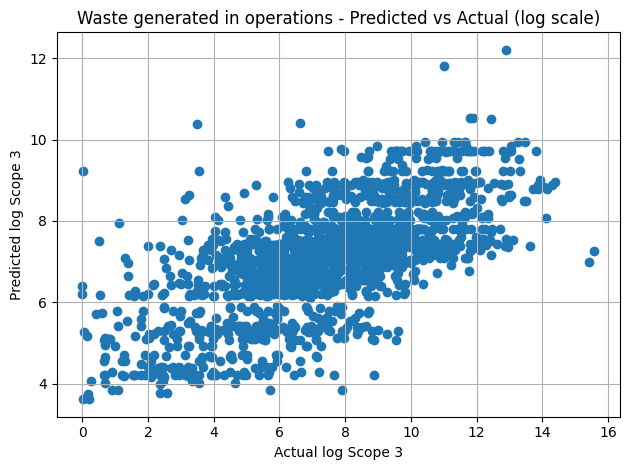

In [27]:
print("Y Test Stats:", y_test.describe())
print("Y Pred Stats:", pd.Series(y_pred).describe())
print("Unique Preds:", np.unique(np.round(y_pred, 2)))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual log Scope 3")
plt.ylabel("Predicted log Scope 3")
plt.title(f"{group_name} - Predicted vs Actual (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Use the same numeric columns as in your pipeline
numeric_cols = [
    "log_Scope 1 2 total emission", "log_Revenue_USD",
    "log_Market_Cap_USD", "log_ebitda_USD",
    "log_grossProfit_USD", "log_netIncome_USD",
    "log_cashAndCashEquivalents_USD", "log_longTermInvestments_USD",
    "log_totalAssets_USD", "log_totalLiabilities_USD",
    "log_totalInvestments_USD", "log_totalDebt_USD",
    "log_totalEquity_USD", "Perc emissions calculated w primary data"
]

# Assuming df_clean is your full preprocessed DataFrame after dropping nulls
numeric_data = df_clean[numeric_cols]

# Print means and stds BEFORE scaling
print("\nBEFORE SCALING:")
for col in numeric_cols:
    mean = numeric_data[col].mean()
    std = numeric_data[col].std()
    print(f"{col:<40} Mean: {mean:.4f} | Std: {std:.4f}")

# Apply StandardScaler manually for analysis
scaler = StandardScaler()
scaled_numeric_data = pd.DataFrame(
    scaler.fit_transform(numeric_data),
    columns=numeric_cols
)

# Print means and stds AFTER scaling
print("\nAFTER SCALING:")
for col in numeric_cols:
    mean = scaled_numeric_data[col].mean()
    std = scaled_numeric_data[col].std()
    print(f"{col:<40} Mean: {mean:.4f} | Std: {std:.4f}")



BEFORE SCALING:
log_Scope 1 2 total emission             Mean: 11.9059 | Std: 2.5625
log_Revenue_USD                          Mean: 22.3650 | Std: 1.5162
log_Market_Cap_USD                       Mean: 22.5105 | Std: 1.7336
log_ebitda_USD                           Mean: 19.1001 | Std: 7.5808
log_grossProfit_USD                      Mean: 21.0203 | Std: 3.7285
log_netIncome_USD                        Mean: 15.5500 | Std: 12.1957
log_cashAndCashEquivalents_USD           Mean: 20.4553 | Std: 1.9061
log_longTermInvestments_USD              Mean: 19.8766 | Std: 2.8299
log_totalAssets_USD                      Mean: 23.1436 | Std: 1.7993
log_totalLiabilities_USD                 Mean: 22.5481 | Std: 1.9821
log_totalInvestments_USD                 Mean: 20.0046 | Std: 2.8598
log_totalDebt_USD                        Mean: 21.4194 | Std: 2.1327
log_totalEquity_USD                      Mean: 21.4349 | Std: 5.1653
Perc emissions calculated w primary data Mean: 40.3867 | Std: 47.0421

AFTER SCALING:

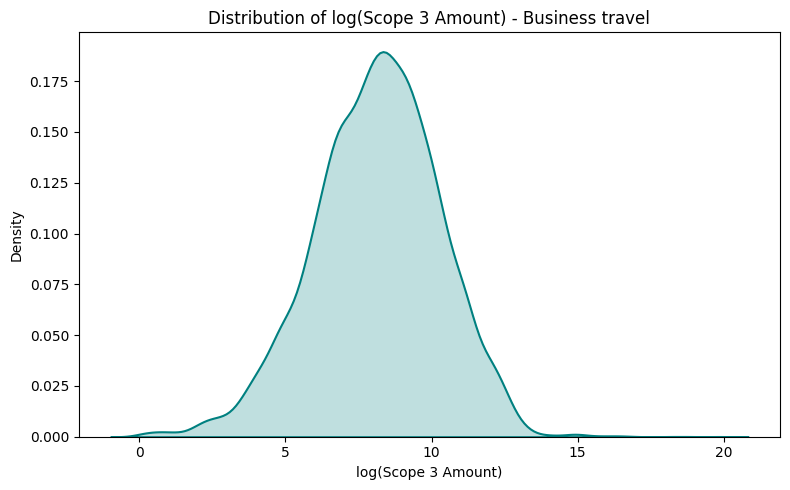

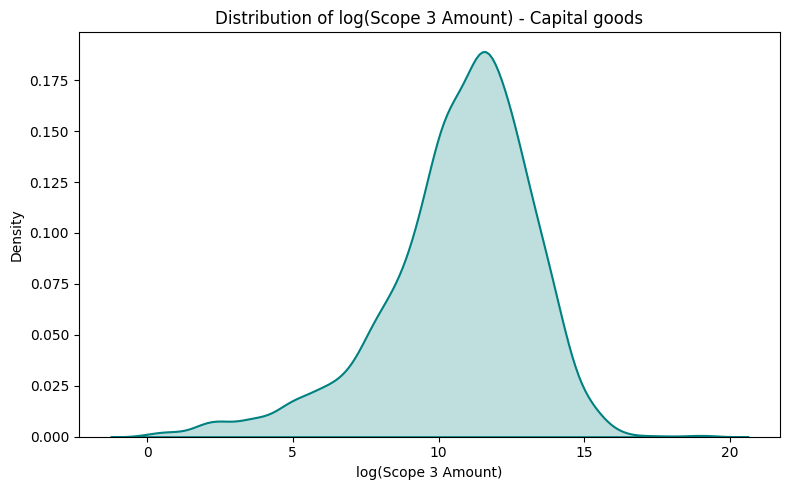

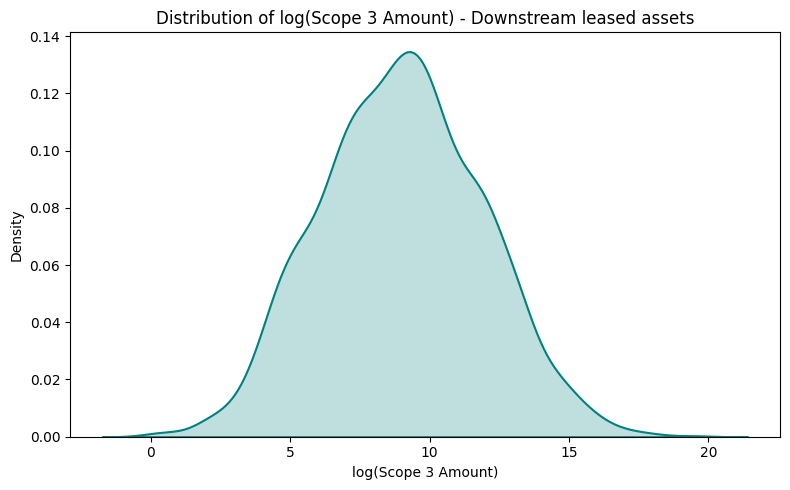

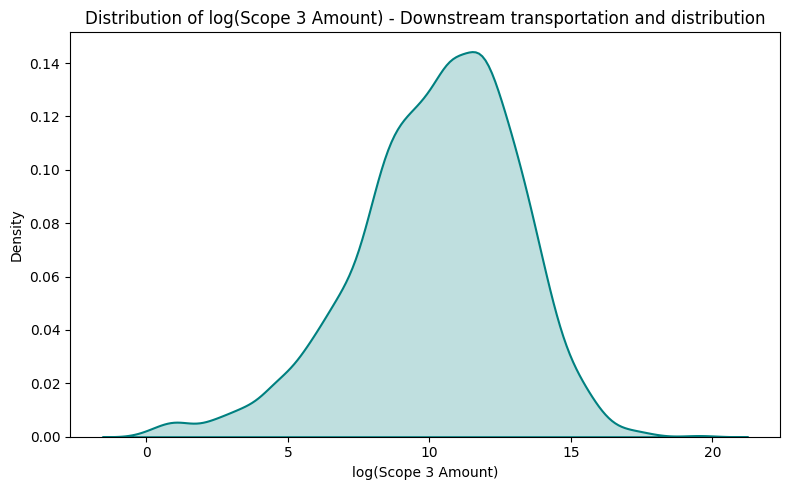

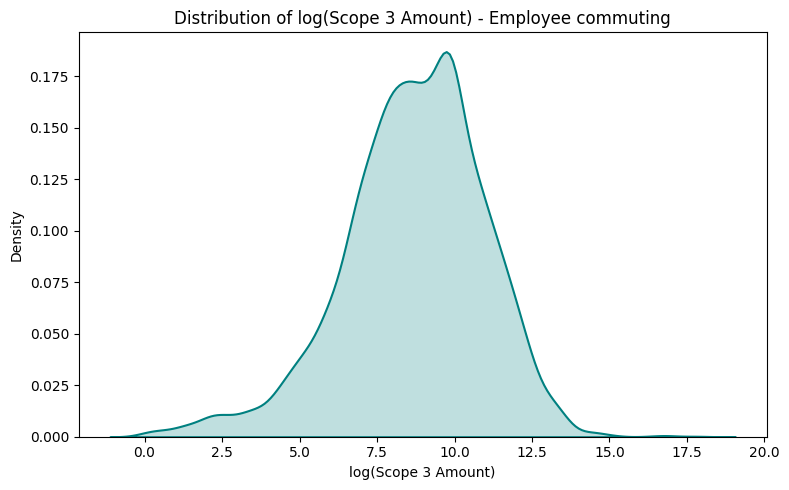

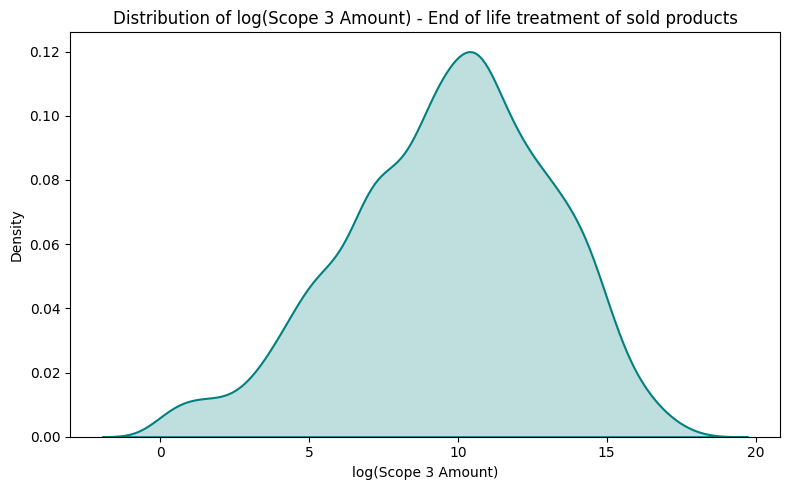

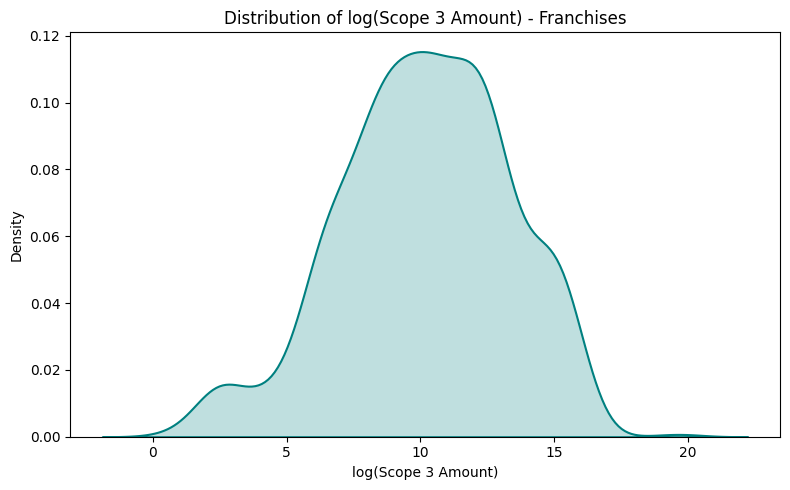

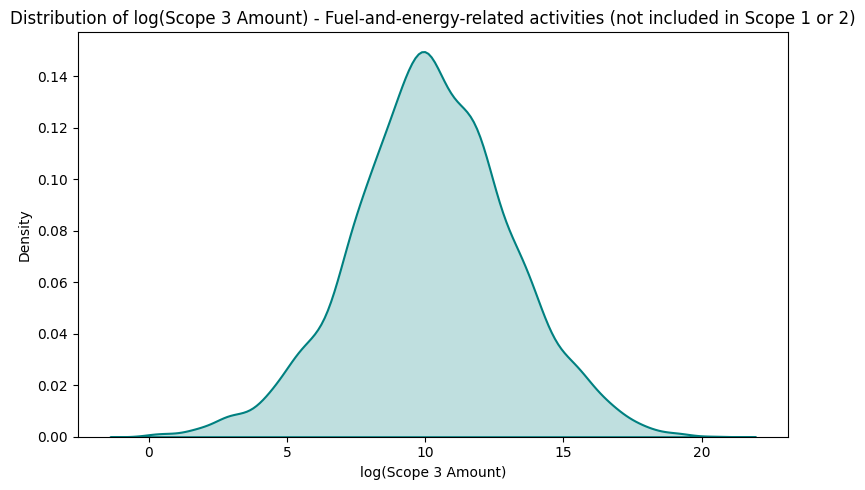

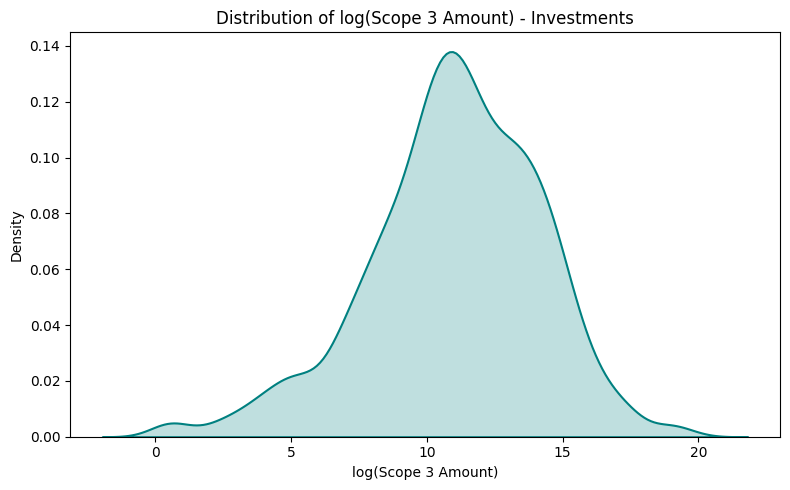

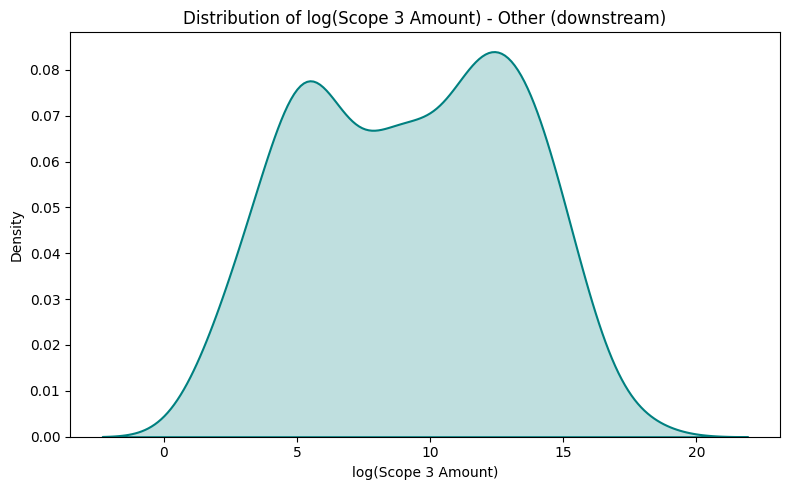

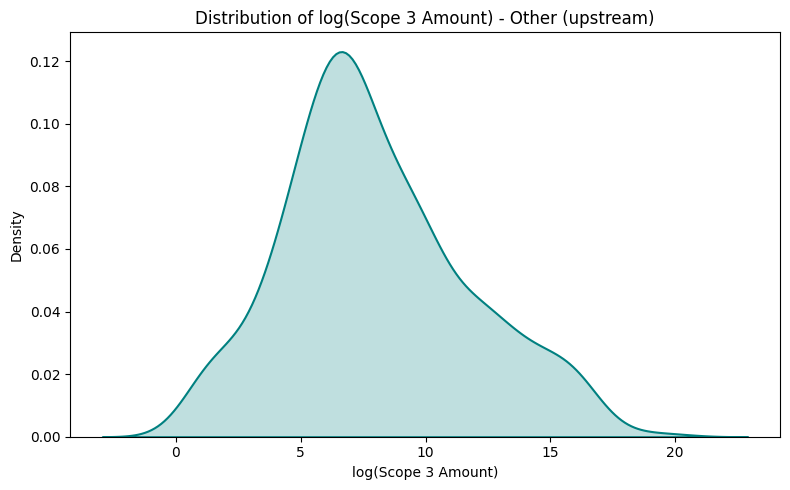

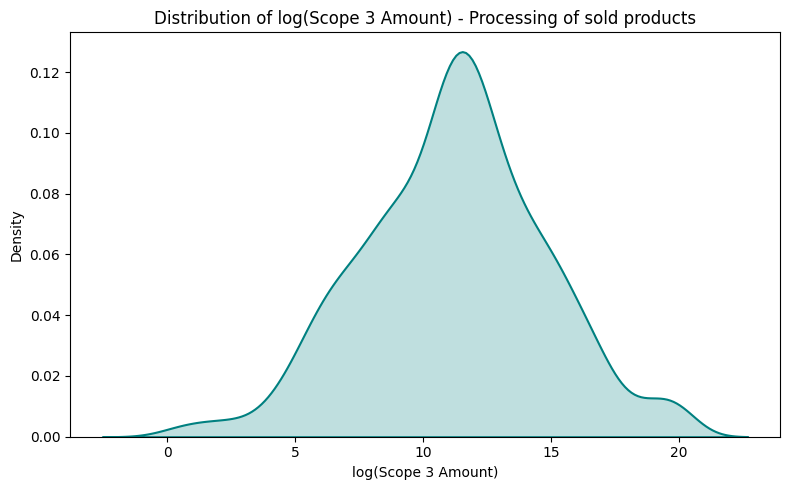

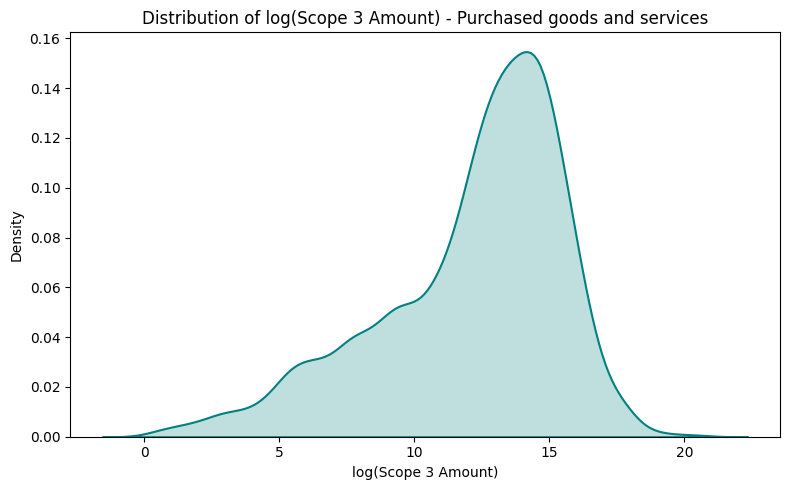

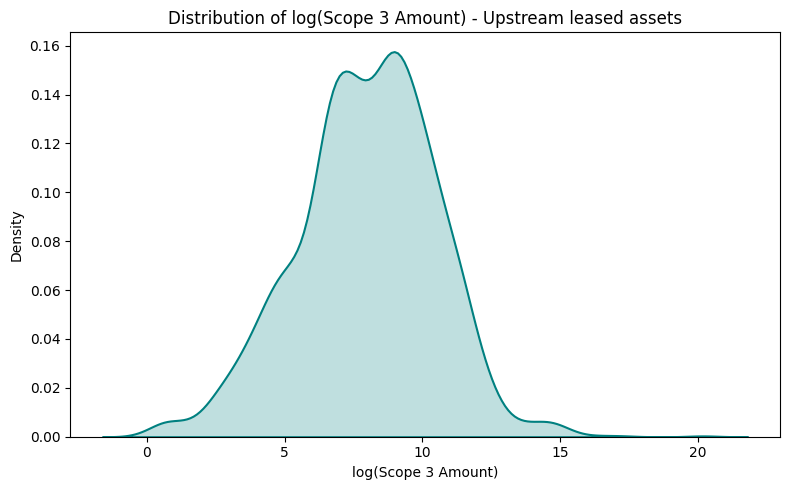

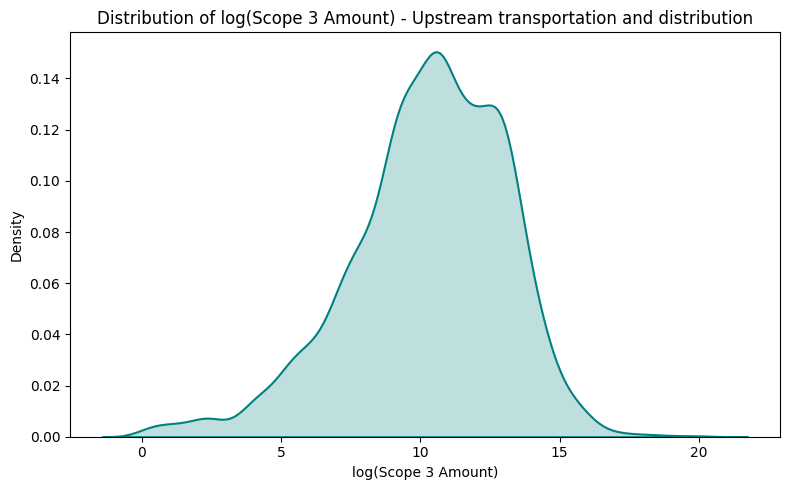

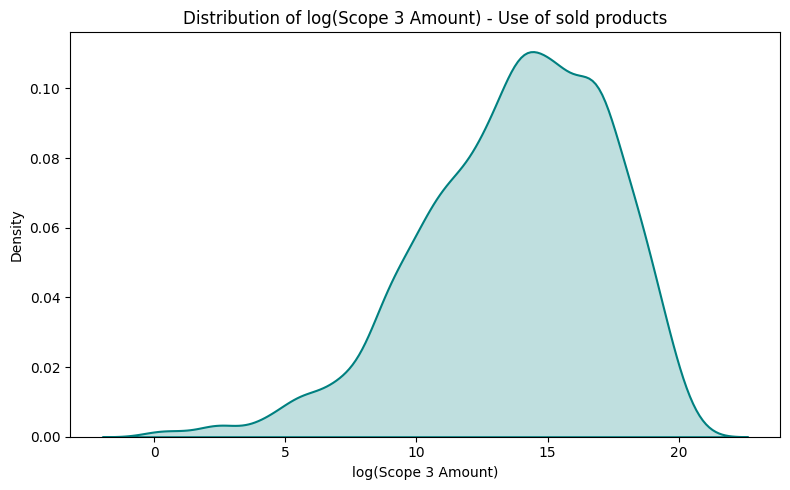

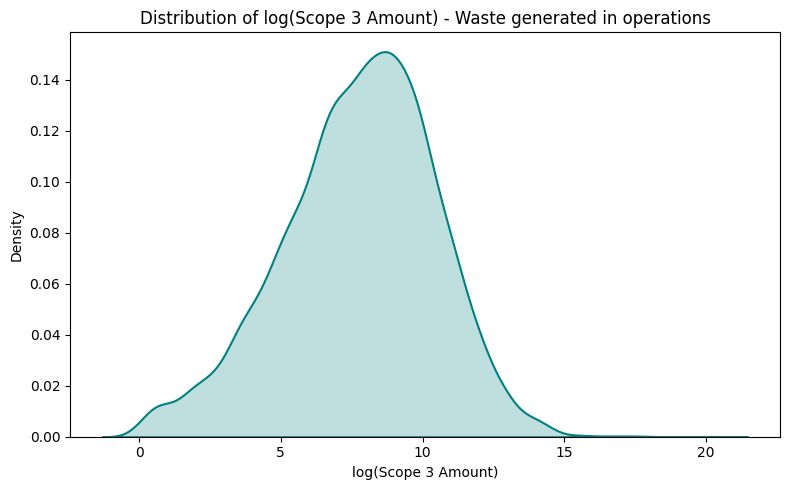

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each group and plot the distribution
for group_name, group_df in grouped_dfs.items():
    # Filter out nulls in the log_Scope 3 Amount column
    if "log_Scope 3 Amount" not in group_df.columns:
        print(f"Skipping group '{group_name}' - column missing")
        continue

    valid_data = group_df["log_Scope 3 Amount"].dropna()

    # Skip if too few points to plot
    if valid_data.shape[0] < 5:
        print(f"Skipping group '{group_name}' - too few valid points ({valid_data.shape[0]})")
        continue

    # Create the plot
    plt.figure(figsize=(8, 5))
    sns.kdeplot(valid_data, fill=True, color='teal', linewidth=1.5)
    plt.title(f"Distribution of log(Scope 3 Amount) - {group_name}")
    plt.xlabel("log(Scope 3 Amount)")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


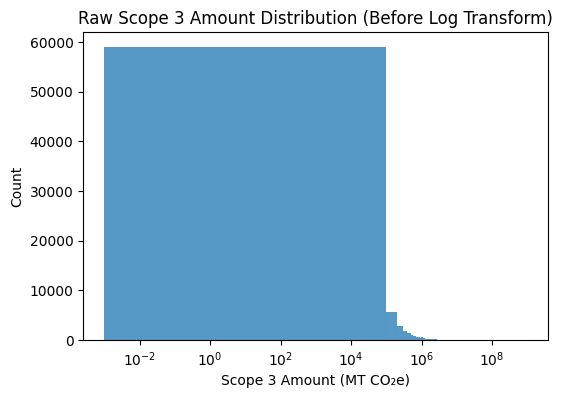

In [76]:
plt.figure(figsize=(6, 4))
sns.histplot(prepped_df["Scope 3 Amount"], bins=10000)
plt.xscale("log")
plt.title("Raw Scope 3 Amount Distribution (Before Log Transform)")
plt.xlabel("Scope 3 Amount (MT CO₂e)")
plt.show()


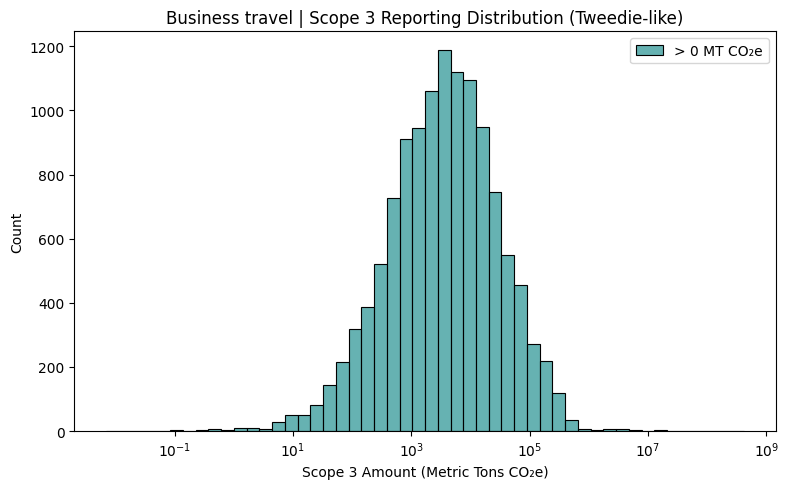

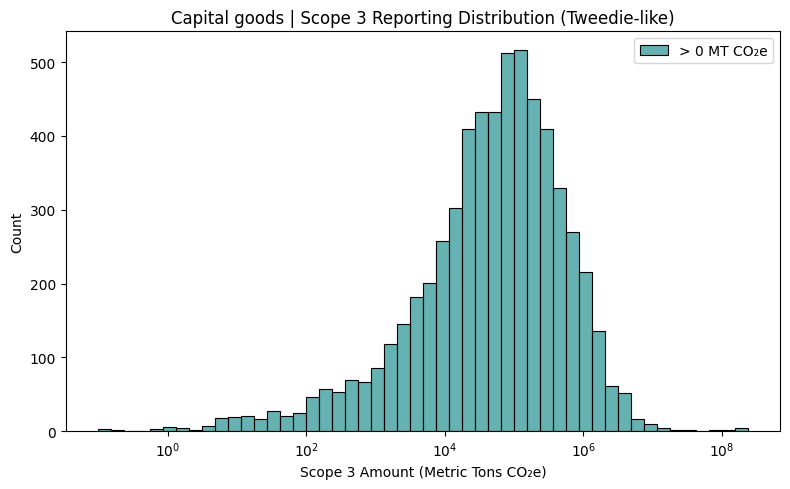

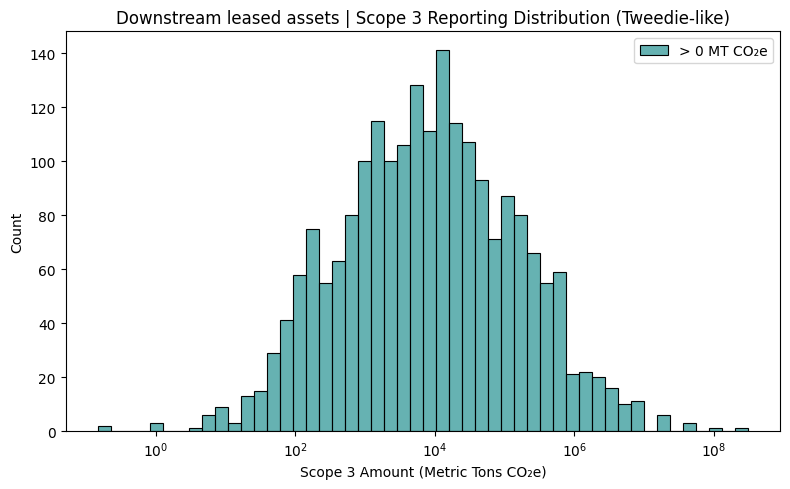

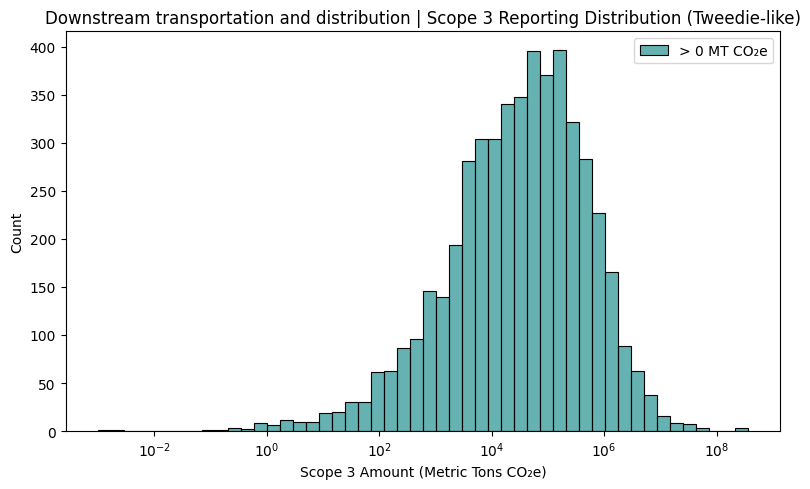

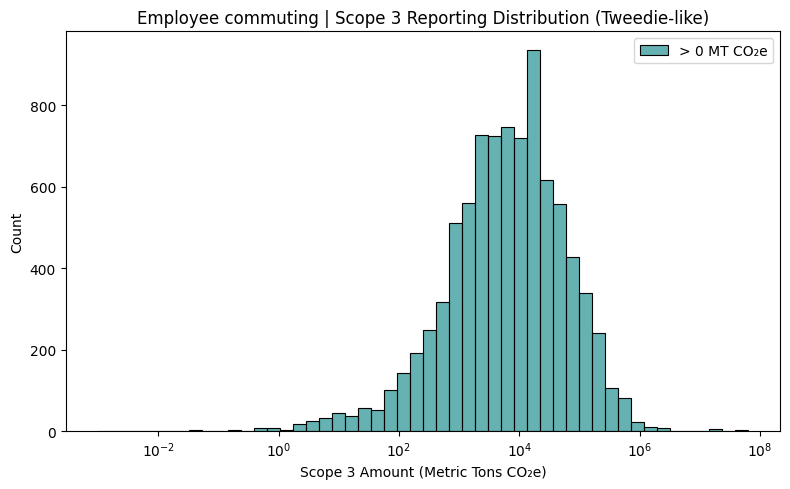

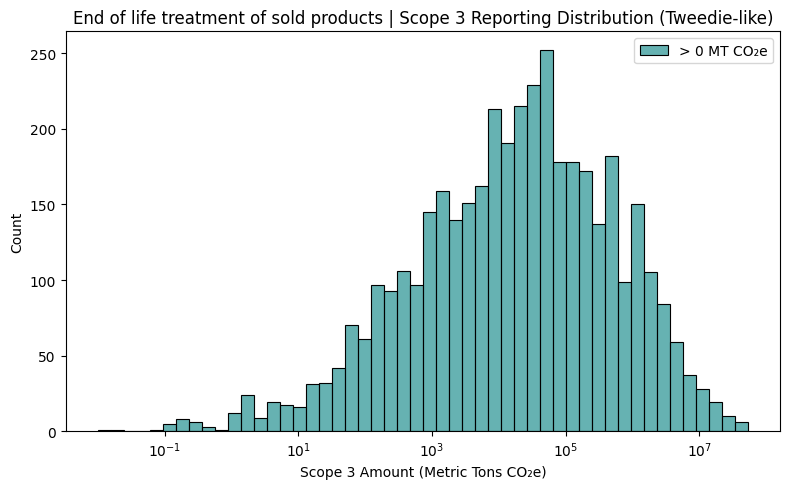

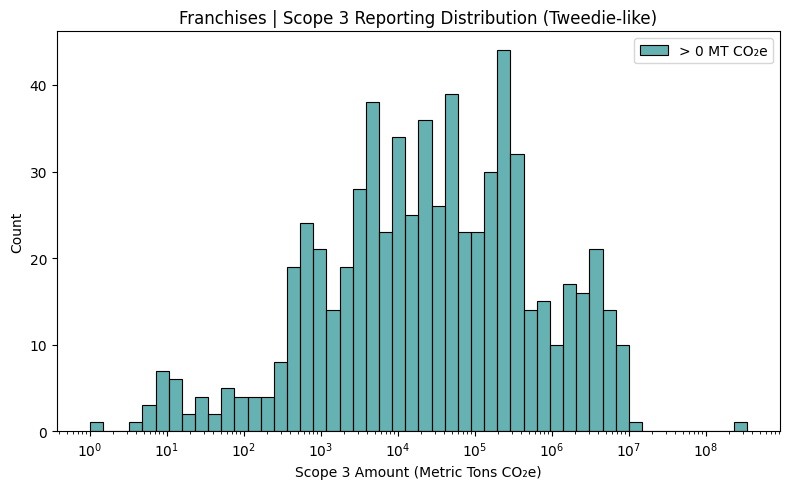

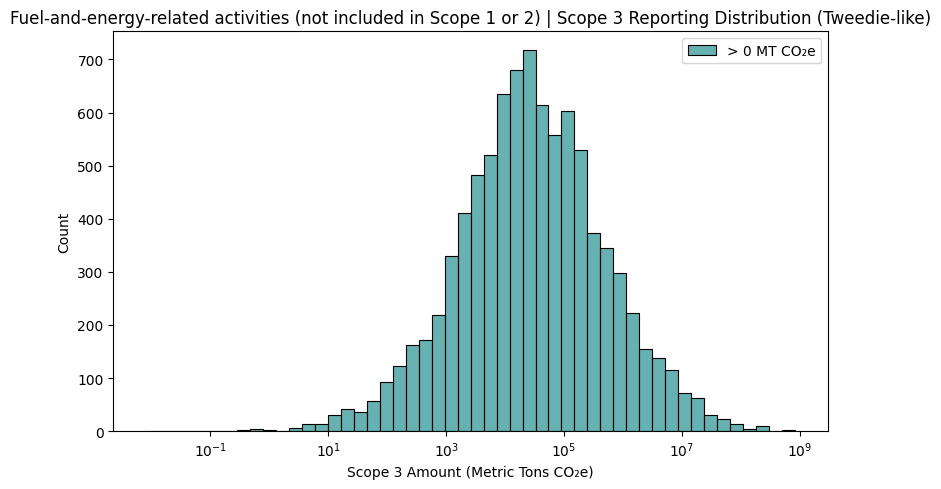

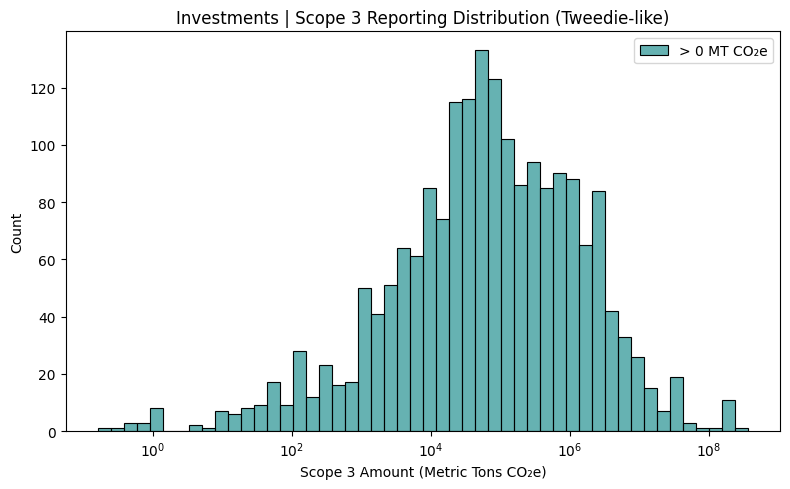

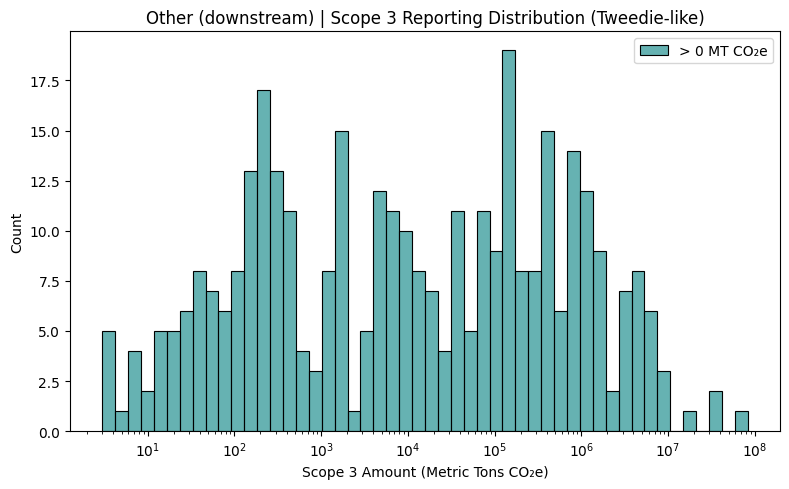

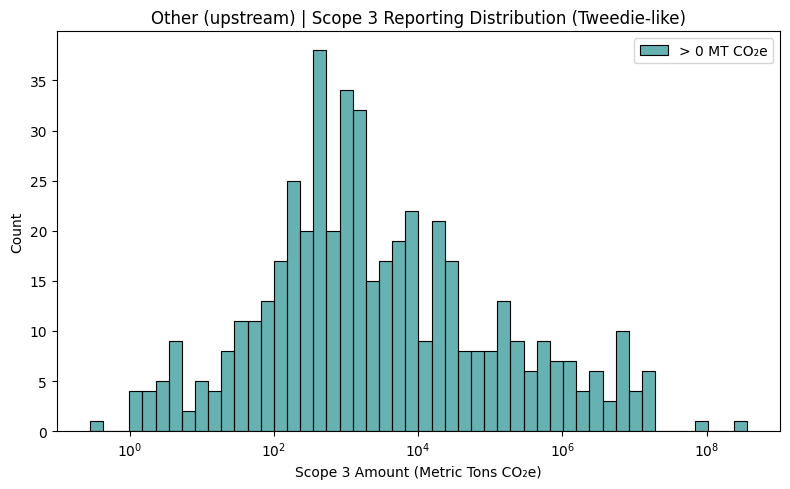

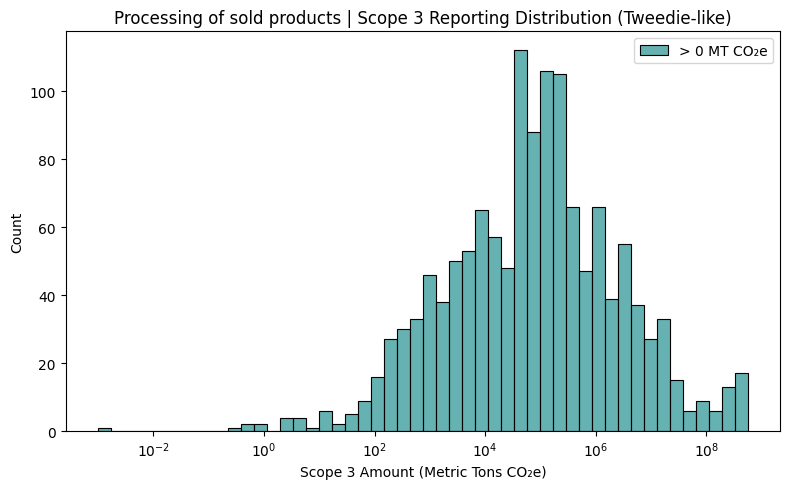

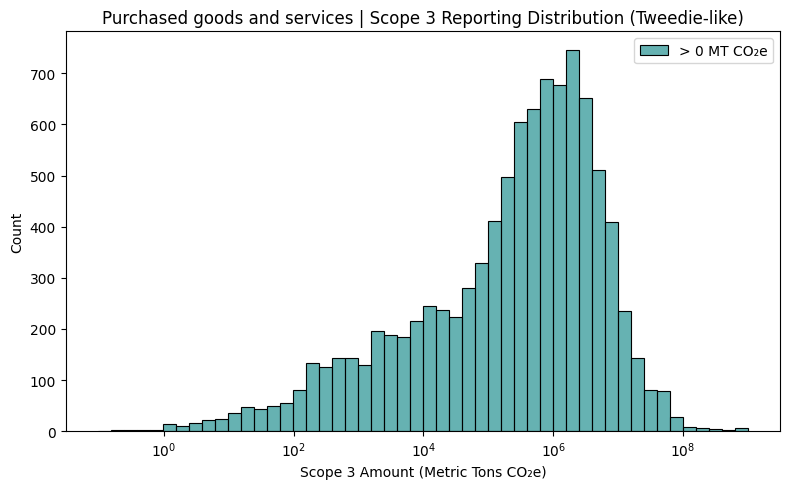

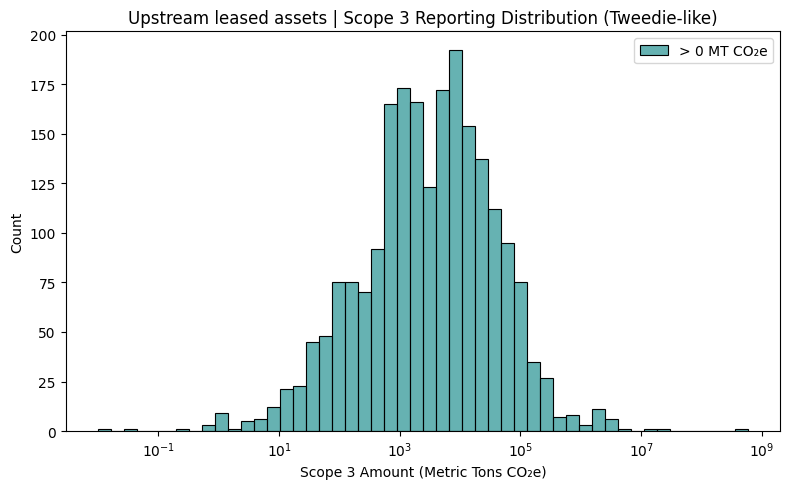

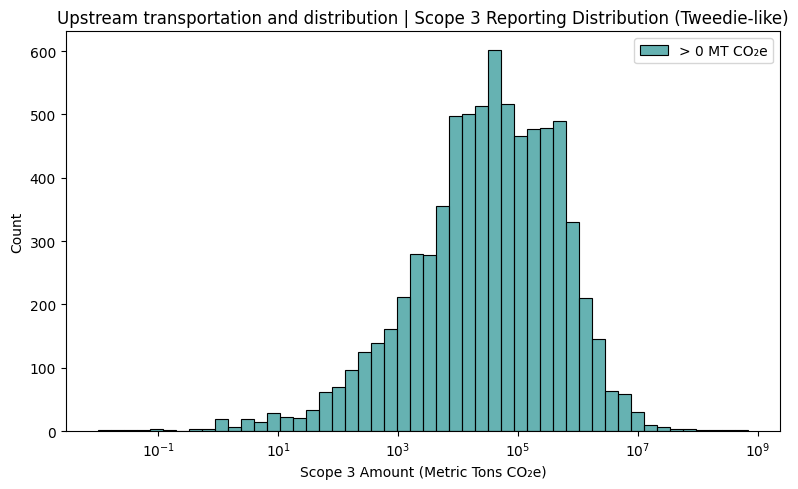

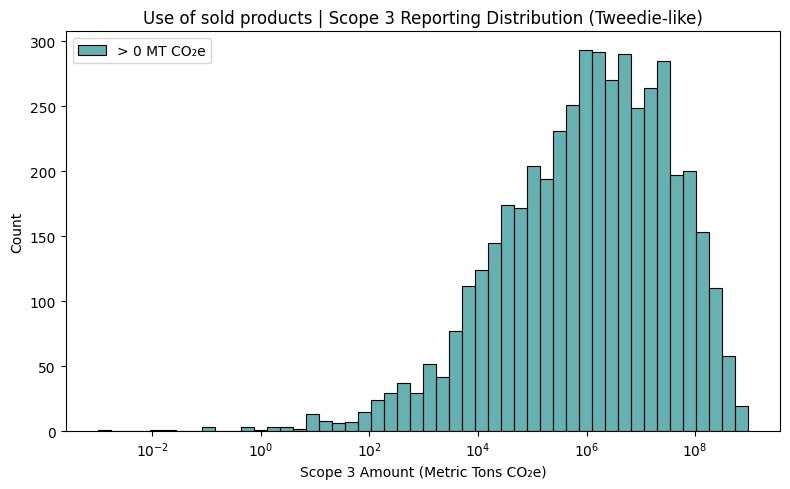

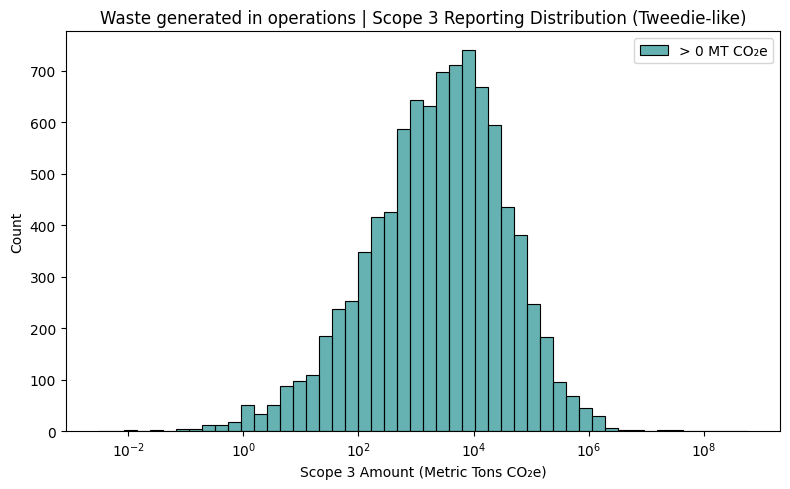

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loop through each group and plot the full raw Scope 3 Amount distribution
for group_name, group_df in grouped_dfs.items():
    if "Scope 3 Amount" not in group_df.columns:
        print(f"Skipping group '{group_name}' - column missing")
        continue

    values = group_df["Scope 3 Amount"].dropna()

    if values.shape[0] < 10:
        print(f"Skipping group '{group_name}' - not enough values")
        continue

    # Create mask for zero and non-zero
    zero_count = (values == 0).sum()
    nonzero_values = values[values > 0]

    # Plot
    plt.figure(figsize=(8, 5))

    # Plot histogram with zeros separately shown as a spike
    sns.histplot(nonzero_values, bins=50, log_scale=True, color='teal', alpha=0.6, label='> 0 MT CO₂e')

    # # Add bar for zero-mass (simulate a bar at x=1 for display)
    # plt.bar(x=1, height=zero_count, width=0.1, color='orange', label='0 MT CO₂e')

    plt.xscale('log')
    plt.xlabel("Scope 3 Amount (Metric Tons CO₂e)")
    plt.ylabel("Count")
    plt.title(f"{group_name} | Scope 3 Reporting Distribution (Tweedie-like)")
    plt.legend()
    plt.tight_layout()
    plt.show()
